# A. DSCVR DATA

## A1. IMPORT DSCVR YEARLY DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
list_dscvr_files = [
                    "Raw_data/dsc_fc_summed_spectra_2016_v01.csv",
                    "Raw_data/dsc_fc_summed_spectra_2017_v01.csv",
                    "Raw_data/dsc_fc_summed_spectra_2018_v01.csv",
                    "Raw_data/dsc_fc_summed_spectra_2019_v01.csv",
                    "Raw_data/dsc_fc_summed_spectra_2020_v01.csv",
                    "Raw_data/dsc_fc_summed_spectra_2021_v01.csv",
                    "Raw_data/dsc_fc_summed_spectra_2022_v01.csv",
                    "Raw_data/dsc_fc_summed_spectra_2023_v01.csv"
                    ]


In [3]:
count = 0

for data_file in list_dscvr_files:
    
    if count == 0:
        data_all_init = pd.read_csv(data_file, \
                    delimiter = ',', parse_dates=[0], \
                    infer_datetime_format=True, na_values='0', \
                    header = None)
    
    else:
        data_all_init = pd.concat([data_all_init, pd.read_csv(data_file, \
                    delimiter = ',', parse_dates=[0], \
                    infer_datetime_format=True, na_values='0', \
                    header = None)])
        
    count += 1
    
data_all_init.reset_index(inplace=True, drop=True)

In [4]:
# Removal of initial period up to continuous incoming data from 1st July 2016
data_all = data_all_init[18720:]
data_all

0         1        2         3         4         5   \
18720   2016-07-01 00:00:00 -0.259678  6.80223 -2.862570       NaN       NaN   
18721   2016-07-01 00:01:00  0.602154  7.10539 -2.184250       NaN       NaN   
18722   2016-07-01 00:02:00  0.517461  6.96508 -2.235470       NaN       NaN   
18723   2016-07-01 00:03:00  0.809703  6.71474 -2.563130       NaN       NaN   
18724   2016-07-01 00:04:00  1.148630  6.99785 -1.576800       NaN       NaN   
...                     ...       ...      ...       ...       ...       ...   
3277435 2023-05-02 23:55:00  4.336650  2.80127  0.954633  1.004790  0.231726   
3277436 2023-05-02 23:56:00  4.667780  2.10582  1.260660  0.781621  0.231726   
3277437 2023-05-02 23:57:00  4.283220  3.02154  0.927773  0.854185  0.231726   
3277438 2023-05-02 23:58:00  4.313760  2.67727  1.723270  0.801559  0.231726   
3277439 2023-05-02 23:59:00  4.515420  2.30317  1.832570  2.265740  0.231726   

               6         7        8           9   ...  44  45  46  47  48  49  \
18720         NaN       NaN      NaN  329.849000  ... NaN NaN NaN NaN NaN NaN   
18721         NaN       NaN      NaN  329.560000  ... NaN NaN NaN NaN NaN NaN   
18722         NaN       NaN      NaN  329.845000  ... NaN NaN NaN NaN NaN NaN   
18723         NaN       NaN      NaN  325.738000  ... NaN NaN NaN NaN NaN NaN   
18724         NaN       NaN      NaN         NaN  ... NaN NaN NaN NaN NaN NaN   
...           ...       ...      ...         ...  ...  ..  ..  ..  ..  ..  ..   
3277435   4.64757  0.626576  3.54595    0.231726  ... NaN NaN NaN NaN NaN NaN   
3277436   5.97222  0.360648  3.39143    0.231726  ... NaN NaN NaN NaN NaN NaN   
3277437   8.10454  2.025800  4.22000    0.231726  ... NaN NaN NaN NaN NaN NaN   
3277438  12.76210  2.818550  4.82242    0.301864  ... NaN NaN NaN NaN NaN NaN   
3277439  11.68700  1.892900  2.39384    0.231726  ... NaN NaN NaN NaN NaN NaN   

         50  51  52  53  
18720   NaN NaN NaN NaN  
18721   NaN NaN NaN NaN  
18722   NaN NaN NaN NaN  
18723   NaN NaN NaN NaN  
18724   NaN NaN NaN NaN  
...      ..  ..  ..  ..  
3277435 NaN NaN NaN NaN  
3277436 NaN NaN NaN NaN  
3277437 NaN NaN NaN NaN  
3277438 NaN NaN NaN NaN  
3277439 NaN NaN NaN NaN  

[3258720 rows x 54 columns]

## A2. CHANGE DSCVR COLUMN NAMES

In [5]:
dict_mag_field = {0: "datetime_DSCVR", 
                  1: "MagFieldVect_Comp1", 2: "MagFieldVect_Comp2", 3: "MagFieldVect_Comp3"}

In [6]:
key_list = list(range(4,54))
val_list = ["FarCup"+str(i+1) for i in list(range(51))]
iterable = zip(key_list, val_list)
dict_far_cup = {key_list: val_list for key_list,val_list in iterable }

In [7]:
new_dict_DSCVR = {**dict_mag_field, **dict_far_cup}
new_dict_DSCVR

{0: 'datetime_DSCVR',
 1: 'MagFieldVect_Comp1',
 2: 'MagFieldVect_Comp2',
 3: 'MagFieldVect_Comp3',
 4: 'FarCup1',
 5: 'FarCup2',
 6: 'FarCup3',
 7: 'FarCup4',
 8: 'FarCup5',
 9: 'FarCup6',
 10: 'FarCup7',
 11: 'FarCup8',
 12: 'FarCup9',
 13: 'FarCup10',
 14: 'FarCup11',
 15: 'FarCup12',
 16: 'FarCup13',
 17: 'FarCup14',
 18: 'FarCup15',
 19: 'FarCup16',
 20: 'FarCup17',
 21: 'FarCup18',
 22: 'FarCup19',
 23: 'FarCup20',
 24: 'FarCup21',
 25: 'FarCup22',
 26: 'FarCup23',
 27: 'FarCup24',
 28: 'FarCup25',
 29: 'FarCup26',
 30: 'FarCup27',
 31: 'FarCup28',
 32: 'FarCup29',
 33: 'FarCup30',
 34: 'FarCup31',
 35: 'FarCup32',
 36: 'FarCup33',
 37: 'FarCup34',
 38: 'FarCup35',
 39: 'FarCup36',
 40: 'FarCup37',
 41: 'FarCup38',
 42: 'FarCup39',
 43: 'FarCup40',
 44: 'FarCup41',
 45: 'FarCup42',
 46: 'FarCup43',
 47: 'FarCup44',
 48: 'FarCup45',
 49: 'FarCup46',
 50: 'FarCup47',
 51: 'FarCup48',
 52: 'FarCup49',
 53: 'FarCup50'}

In [8]:
DSCVR_data_all = data_all.rename(columns=new_dict_DSCVR)
DSCVR_data_all

datetime_DSCVR  MagFieldVect_Comp1  MagFieldVect_Comp2  \
18720   2016-07-01 00:00:00           -0.259678             6.80223   
18721   2016-07-01 00:01:00            0.602154             7.10539   
18722   2016-07-01 00:02:00            0.517461             6.96508   
18723   2016-07-01 00:03:00            0.809703             6.71474   
18724   2016-07-01 00:04:00            1.148630             6.99785   
...                     ...                 ...                 ...   
3277435 2023-05-02 23:55:00            4.336650             2.80127   
3277436 2023-05-02 23:56:00            4.667780             2.10582   
3277437 2023-05-02 23:57:00            4.283220             3.02154   
3277438 2023-05-02 23:58:00            4.313760             2.67727   
3277439 2023-05-02 23:59:00            4.515420             2.30317   

         MagFieldVect_Comp3   FarCup1   FarCup2   FarCup3   FarCup4  FarCup5  \
18720             -2.862570       NaN       NaN       NaN       NaN      NaN   
18721             -2.184250       NaN       NaN       NaN       NaN      NaN   
18722             -2.235470       NaN       NaN       NaN       NaN      NaN   
18723             -2.563130       NaN       NaN       NaN       NaN      NaN   
18724             -1.576800       NaN       NaN       NaN       NaN      NaN   
...                     ...       ...       ...       ...       ...      ...   
3277435            0.954633  1.004790  0.231726   4.64757  0.626576  3.54595   
3277436            1.260660  0.781621  0.231726   5.97222  0.360648  3.39143   
3277437            0.927773  0.854185  0.231726   8.10454  2.025800  4.22000   
3277438            1.723270  0.801559  0.231726  12.76210  2.818550  4.82242   
3277439            1.832570  2.265740  0.231726  11.68700  1.892900  2.39384   

            FarCup6  ...  FarCup41  FarCup42  FarCup43  FarCup44  FarCup45  \
18720    329.849000  ...       NaN       NaN       NaN       NaN       NaN   
18721    329.560000  ...       NaN       NaN       NaN       NaN       NaN   
18722    329.845000  ...       NaN       NaN       NaN       NaN       NaN   
18723    325.738000  ...       NaN       NaN       NaN       NaN       NaN   
18724           NaN  ...       NaN       NaN       NaN       NaN       NaN   
...             ...  ...       ...       ...       ...       ...       ...   
3277435    0.231726  ...       NaN       NaN       NaN       NaN       NaN   
3277436    0.231726  ...       NaN       NaN       NaN       NaN       NaN   
3277437    0.231726  ...       NaN       NaN       NaN       NaN       NaN   
3277438    0.301864  ...       NaN       NaN       NaN       NaN       NaN   
3277439    0.231726  ...       NaN       NaN       NaN       NaN       NaN   

         FarCup46  FarCup47  FarCup48  FarCup49  FarCup50  
18720         NaN       NaN       NaN       NaN       NaN  
18721         NaN       NaN       NaN       NaN       NaN  
18722         NaN       NaN       NaN       NaN       NaN  
18723         NaN       NaN       NaN       NaN       NaN  
18724         NaN       NaN       NaN       NaN       NaN  
...           ...       ...       ...       ...       ...  
3277435       NaN       NaN       NaN       NaN       NaN  
3277436       NaN       NaN       NaN       NaN       NaN  
3277437       NaN       NaN       NaN       NaN       NaN  
3277438       NaN       NaN       NaN       NaN       NaN  
3277439       NaN       NaN       NaN       NaN       NaN  

[3258720 rows x 54 columns]

## A3. AGGREGATE BASED ON TIME

In [9]:
DSCVR_data_all = DSCVR_data_all.set_index('datetime_DSCVR')
DSCVR_data_all

MagFieldVect_Comp1  MagFieldVect_Comp2  \
datetime_DSCVR                                                
2016-07-01 00:00:00           -0.259678             6.80223   
2016-07-01 00:01:00            0.602154             7.10539   
2016-07-01 00:02:00            0.517461             6.96508   
2016-07-01 00:03:00            0.809703             6.71474   
2016-07-01 00:04:00            1.148630             6.99785   
...                                 ...                 ...   
2023-05-02 23:55:00            4.336650             2.80127   
2023-05-02 23:56:00            4.667780             2.10582   
2023-05-02 23:57:00            4.283220             3.02154   
2023-05-02 23:58:00            4.313760             2.67727   
2023-05-02 23:59:00            4.515420             2.30317   

                     MagFieldVect_Comp3   FarCup1   FarCup2   FarCup3  \
datetime_DSCVR                                                          
2016-07-01 00:00:00           -2.862570       NaN       NaN       NaN   
2016-07-01 00:01:00           -2.184250       NaN       NaN       NaN   
2016-07-01 00:02:00           -2.235470       NaN       NaN       NaN   
2016-07-01 00:03:00           -2.563130       NaN       NaN       NaN   
2016-07-01 00:04:00           -1.576800       NaN       NaN       NaN   
...                                 ...       ...       ...       ...   
2023-05-02 23:55:00            0.954633  1.004790  0.231726   4.64757   
2023-05-02 23:56:00            1.260660  0.781621  0.231726   5.97222   
2023-05-02 23:57:00            0.927773  0.854185  0.231726   8.10454   
2023-05-02 23:58:00            1.723270  0.801559  0.231726  12.76210   
2023-05-02 23:59:00            1.832570  2.265740  0.231726  11.68700   

                      FarCup4  FarCup5     FarCup6     FarCup7  ...  FarCup41  \
datetime_DSCVR                                                  ...             
2016-07-01 00:00:00       NaN      NaN  329.849000  340.556000  ...       NaN   
2016-07-01 00:01:00       NaN      NaN  329.560000  343.157000  ...       NaN   
2016-07-01 00:02:00       NaN      NaN  329.845000  344.199000  ...       NaN   
2016-07-01 00:03:00       NaN      NaN  325.738000  349.640000  ...       NaN   
2016-07-01 00:04:00       NaN      NaN         NaN  345.681000  ...       NaN   
...                       ...      ...         ...         ...  ...       ...   
2023-05-02 23:55:00  0.626576  3.54595    0.231726    1.795390  ...       NaN   
2023-05-02 23:56:00  0.360648  3.39143    0.231726    0.506513  ...       NaN   
2023-05-02 23:57:00  2.025800  4.22000    0.231726    2.344650  ...       NaN   
2023-05-02 23:58:00  2.818550  4.82242    0.301864    0.355221  ...       NaN   
2023-05-02 23:59:00  1.892900  2.39384    0.231726    2.772970  ...       NaN   

                     FarCup42  FarCup43  FarCup44  FarCup45  FarCup46  \
datetime_DSCVR                                                          
2016-07-01 00:00:00       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:01:00       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:02:00       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:03:00       NaN       NaN       NaN       NaN       NaN   
2016-07-01 00:04:00       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
2023-05-02 23:55:00       NaN       NaN       NaN       NaN       NaN   
2023-05-02 23:56:00       NaN       NaN       NaN       NaN       NaN   
2023-05-02 23:57:00       NaN       NaN       NaN       NaN       NaN   
2023-05-02 23:58:00       NaN       NaN       NaN       NaN       NaN   
2023-05-02 23:59:00       NaN       NaN       NaN       NaN       NaN   

                     FarCup47  FarCup48  FarCup49  FarCup50  
datetime_DSCVR                                               
2016-07-01 00:00:00       NaN       NaN       NaN       NaN  
2016-07-01 00:01:00       NaN       NaN       NaN       NaN  

#### A3.1 Mean

In [10]:
DSCVR_data_all_resampled_mean = DSCVR_data_all.resample('3H', origin='end', offset='1min').mean()
DSCVR_data_all_resampled_mean = DSCVR_data_all_resampled_mean.add_suffix("_mean")
DSCVR_data_all_resampled_mean.head(3)

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           NaN           NaN   
2016-07-01 06:00:00                -0.228962           NaN           NaN   
2016-07-01 09:00:00                -1.294382           NaN           NaN   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           NaN           NaN       356.221    333.408857   
2016-07-01 06:00:00           NaN           NaN           NaN           NaN   
2016-07-01 09:00:00           NaN           NaN           NaN           NaN   

                     FarCup7_mean  ...  FarCup41_mean  FarCup42_mean  \
datetime_DSCVR                     ...                                 
2016-07-01 03:00:00    349.227408  ...            NaN            NaN   
2016-07-01 06:00:00    351.975857  ...            NaN            NaN   
2016-07-01 09:00:00    356.851500  ...            NaN            NaN   

                     FarCup43_mean  FarCup44_mean  FarCup45_mean  \
datetime_DSCVR                                                     
2016-07-01 03:00:00            NaN            NaN            NaN   
2016-07-01 06:00:00            NaN            NaN            NaN   
2016-07-01 09:00:00            NaN            NaN            NaN   

                     FarCup46_mean  FarCup47_mean  FarCup48_mean  \
datetime_DSCVR                                                     
2016-07-01 03:00:00            NaN            NaN            NaN   
2016-07-01 06:00:00            NaN            NaN            NaN   
2016-07-01 09:00:00            NaN            NaN            NaN   

                     FarCup49_mean  FarCup50_mean  
datetime_DSCVR                                     
2016-07-01 03:00:00            NaN            NaN  
2016-07-01 06:00:00            NaN            NaN  
2016-07-01 09:00:00            NaN            NaN  

[3 rows x 53 columns]

In [11]:
DSCVR_data_all_resampled_mean

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   
2016-07-01 12:00:00                 1.719482                 3.512640   
2016-07-01 15:00:00                -1.733990                 1.799461   
...                                      ...                      ...   
2023-05-02 12:00:00                 4.525159                -0.303902   
2023-05-02 15:00:00                 3.567366                 1.580780   
2023-05-02 18:00:00                 4.230931                 0.167467   
2023-05-02 21:00:00                 3.440782                 3.238269   
2023-05-03 00:00:00                 4.234609                 3.294242   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           NaN           NaN   
2016-07-01 06:00:00                -0.228962           NaN           NaN   
2016-07-01 09:00:00                -1.294382           NaN           NaN   
2016-07-01 12:00:00                -0.144519           NaN           NaN   
2016-07-01 15:00:00                -0.555546           NaN           NaN   
...                                      ...           ...           ...   
2023-05-02 12:00:00                 0.267391      1.263438      0.231726   
2023-05-02 15:00:00                 1.438682      1.263416      0.231726   
2023-05-02 18:00:00                -0.925729      1.117462      0.231726   
2023-05-02 21:00:00                -1.601845      0.375699      0.231726   
2023-05-03 00:00:00                -0.042956      0.741283      0.231726   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           NaN           NaN    356.221000    333.408857   
2016-07-01 06:00:00           NaN           NaN           NaN           NaN   
2016-07-01 09:00:00           NaN           NaN           NaN           NaN   
2016-07-01 12:00:00           NaN           NaN    360.279000    340.138000   
2016-07-01 15:00:00           NaN           NaN    354.486000    335.147222   
...                           ...           ...           ...           ...   
2023-05-02 12:00:00      0.390526      0.231726      0.232078      0.231726   
2023-05-02 15:00:00      0.353727      0.231726      0.231726      0.231726   
2023-05-02 18:00:00      0.887621      0.382773      0.446299      0.231726   
2023-05-02 21:00:00      3.624081     20.392764     12.782806      0.239769   
2023-05-03 00:00:00     11.992781     12.568496      5.641754      0.299559   

                     FarCup7_mean  ...  FarCup41_mean  FarCup42_mean  \
datetime_DSCVR                     ...                                 
2016-07-01 03:00:00    349.227408  ...            NaN            NaN   
2016-07-01 06:00:00    351.975857  ...            NaN            NaN   
2016-07-01 09:00:00    356.851500  ...            NaN            NaN   
2016-07-01 12:00:00    355.934667  ...            NaN            NaN   
2016-07-01 15:00:00    348.999882  ...            NaN            NaN   
...                           ...  ...            ...            ...   
2023-05-02 12:00:00      0.231726  ...            NaN            NaN   
2023-05-02 15:00:00      0.231726  ...            NaN            NaN   
2023-05-02 18:00:00      0.232609  ...            NaN            NaN   
2023-05-02 21:00:00      0.331157  ...            NaN            NaN   
2023-05-03 00:00:00      0.585979  ...            NaN            NaN   

                     FarCup43_mean  FarCup44_mean  FarCup45_mean  \
datetime_DSCVR                                   

#### A3.2 Range

In [12]:
DSCVR_data_all_resampled_range = DSCVR_data_all.resample('3H', origin='end', offset='1min').max() - DSCVR_data_all.resample('3H', origin='end', offset='1min').min()
DSCVR_data_all_resampled_range = DSCVR_data_all_resampled_range.add_suffix("_range")
DSCVR_data_all_resampled_range.head(3)

MagFieldVect_Comp1_range  MagFieldVect_Comp2_range  \
datetime_DSCVR                                                            
2016-07-01 03:00:00                   9.90025                  11.85823   
2016-07-01 06:00:00                  10.31375                  14.81710   
2016-07-01 09:00:00                   6.40133                  10.49359   

                     MagFieldVect_Comp3_range  FarCup1_range  FarCup2_range  \
datetime_DSCVR                                                                
2016-07-01 03:00:00                  10.29297            NaN            NaN   
2016-07-01 06:00:00                  11.27526            NaN            NaN   
2016-07-01 09:00:00                  10.50931            NaN            NaN   

                     FarCup3_range  FarCup4_range  FarCup5_range  \
datetime_DSCVR                                                     
2016-07-01 03:00:00            NaN            NaN            0.0   
2016-07-01 06:00:00            NaN            NaN            NaN   
2016-07-01 09:00:00            NaN            NaN            NaN   

                     FarCup6_range  FarCup7_range  ...  FarCup41_range  \
datetime_DSCVR                                     ...                   
2016-07-01 03:00:00         27.581         27.507  ...             NaN   
2016-07-01 06:00:00            NaN         18.328  ...             NaN   
2016-07-01 09:00:00            NaN         11.028  ...             NaN   

                     FarCup42_range  FarCup43_range  FarCup44_range  \
datetime_DSCVR                                                        
2016-07-01 03:00:00             NaN             NaN             NaN   
2016-07-01 06:00:00             NaN             NaN             NaN   
2016-07-01 09:00:00             NaN             NaN             NaN   

                     FarCup45_range  FarCup46_range  FarCup47_range  \
datetime_DSCVR                                                        
2016-07-01 03:00:00             NaN             NaN             NaN   
2016-07-01 06:00:00             NaN             NaN             NaN   
2016-07-01 09:00:00             NaN             NaN             NaN   

                     FarCup48_range  FarCup49_range  FarCup50_range  
datetime_DSCVR                                                       
2016-07-01 03:00:00             NaN             NaN             NaN  
2016-07-01 06:00:00             NaN             NaN             NaN  
2016-07-01 09:00:00             NaN             NaN             NaN  

[3 rows x 53 columns]

#### A3.3 Minimum

In [13]:
DSCVR_data_all_resampled_min = DSCVR_data_all.resample('3H', origin='end', offset='1min').min()
DSCVR_data_all_resampled_min = DSCVR_data_all_resampled_min.add_suffix("_min")
DSCVR_data_all_resampled_min.head(3)

MagFieldVect_Comp1_min  MagFieldVect_Comp2_min  \
datetime_DSCVR                                                        
2016-07-01 03:00:00                -5.06615                -4.47834   
2016-07-01 06:00:00                -3.83255                -6.29812   
2016-07-01 09:00:00                -4.19661                -4.68640   

                     MagFieldVect_Comp3_min  FarCup1_min  FarCup2_min  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                -6.34188          NaN          NaN   
2016-07-01 06:00:00                -4.58207          NaN          NaN   
2016-07-01 09:00:00                -5.97934          NaN          NaN   

                     FarCup3_min  FarCup4_min  FarCup5_min  FarCup6_min  \
datetime_DSCVR                                                            
2016-07-01 03:00:00          NaN          NaN      356.221      325.738   
2016-07-01 06:00:00          NaN          NaN          NaN          NaN   
2016-07-01 09:00:00          NaN          NaN          NaN          NaN   

                     FarCup7_min  ...  FarCup41_min  FarCup42_min  \
datetime_DSCVR                    ...                               
2016-07-01 03:00:00      340.556  ...           NaN           NaN   
2016-07-01 06:00:00      347.105  ...           NaN           NaN   
2016-07-01 09:00:00      352.290  ...           NaN           NaN   

                     FarCup43_min  FarCup44_min  FarCup45_min  FarCup46_min  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           NaN           NaN           NaN           NaN   
2016-07-01 06:00:00           NaN           NaN           NaN           NaN   
2016-07-01 09:00:00           NaN           NaN           NaN           NaN   

                     FarCup47_min  FarCup48_min  FarCup49_min  FarCup50_min  
datetime_DSCVR                                                               
2016-07-01 03:00:00           NaN           NaN           NaN           NaN  
2016-07-01 06:00:00           NaN           NaN           NaN           NaN  
2016-07-01 09:00:00           NaN           NaN           NaN           NaN  

[3 rows x 53 columns]

#### A3.4 Maximum

In [14]:
DSCVR_data_all_resampled_max = DSCVR_data_all.resample('3H', origin='end', offset='1min').max()
DSCVR_data_all_resampled_max = DSCVR_data_all_resampled_max.add_suffix("_max")
DSCVR_data_all_resampled_max.head(3)

MagFieldVect_Comp1_max  MagFieldVect_Comp2_max  \
datetime_DSCVR                                                        
2016-07-01 03:00:00                 4.83410                 7.37989   
2016-07-01 06:00:00                 6.48120                 8.51898   
2016-07-01 09:00:00                 2.20472                 5.80719   

                     MagFieldVect_Comp3_max  FarCup1_max  FarCup2_max  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 3.95109          NaN          NaN   
2016-07-01 06:00:00                 6.69319          NaN          NaN   
2016-07-01 09:00:00                 4.52997          NaN          NaN   

                     FarCup3_max  FarCup4_max  FarCup5_max  FarCup6_max  \
datetime_DSCVR                                                            
2016-07-01 03:00:00          NaN          NaN      356.221      353.319   
2016-07-01 06:00:00          NaN          NaN          NaN          NaN   
2016-07-01 09:00:00          NaN          NaN          NaN          NaN   

                     FarCup7_max  ...  FarCup41_max  FarCup42_max  \
datetime_DSCVR                    ...                               
2016-07-01 03:00:00      368.063  ...           NaN           NaN   
2016-07-01 06:00:00      365.433  ...           NaN           NaN   
2016-07-01 09:00:00      363.318  ...           NaN           NaN   

                     FarCup43_max  FarCup44_max  FarCup45_max  FarCup46_max  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           NaN           NaN           NaN           NaN   
2016-07-01 06:00:00           NaN           NaN           NaN           NaN   
2016-07-01 09:00:00           NaN           NaN           NaN           NaN   

                     FarCup47_max  FarCup48_max  FarCup49_max  FarCup50_max  
datetime_DSCVR                                                               
2016-07-01 03:00:00           NaN           NaN           NaN           NaN  
2016-07-01 06:00:00           NaN           NaN           NaN           NaN  
2016-07-01 09:00:00           NaN           NaN           NaN           NaN  

[3 rows x 53 columns]

#### A3.5 Median

In [15]:
DSCVR_data_all_resampled_median = DSCVR_data_all.resample('3H', origin='end', offset='1min').median()
DSCVR_data_all_resampled_median = DSCVR_data_all_resampled_median.add_suffix("_median")
DSCVR_data_all_resampled_median.head(3)

MagFieldVect_Comp1_median  MagFieldVect_Comp2_median  \
datetime_DSCVR                                                              
2016-07-01 03:00:00                   0.173771                    5.75964   
2016-07-01 06:00:00                   0.778440                    2.24117   
2016-07-01 09:00:00                  -0.562646                    3.33477   

                     MagFieldVect_Comp3_median  FarCup1_median  \
datetime_DSCVR                                                   
2016-07-01 03:00:00                   0.416581             NaN   
2016-07-01 06:00:00                  -1.765580             NaN   
2016-07-01 09:00:00                  -1.125145             NaN   

                     FarCup2_median  FarCup3_median  FarCup4_median  \
datetime_DSCVR                                                        
2016-07-01 03:00:00             NaN             NaN             NaN   
2016-07-01 06:00:00             NaN             NaN             NaN   
2016-07-01 09:00:00             NaN             NaN             NaN   

                     FarCup5_median  FarCup6_median  FarCup7_median  ...  \
datetime_DSCVR                                                       ...   
2016-07-01 03:00:00         356.221         329.849         348.632  ...   
2016-07-01 06:00:00             NaN             NaN         348.164  ...   
2016-07-01 09:00:00             NaN             NaN         355.899  ...   

                     FarCup41_median  FarCup42_median  FarCup43_median  \
datetime_DSCVR                                                           
2016-07-01 03:00:00              NaN              NaN              NaN   
2016-07-01 06:00:00              NaN              NaN              NaN   
2016-07-01 09:00:00              NaN              NaN              NaN   

                     FarCup44_median  FarCup45_median  FarCup46_median  \
datetime_DSCVR                                                           
2016-07-01 03:00:00              NaN              NaN              NaN   
2016-07-01 06:00:00              NaN              NaN              NaN   
2016-07-01 09:00:00              NaN              NaN              NaN   

                     FarCup47_median  FarCup48_median  FarCup49_median  \
datetime_DSCVR                                                           
2016-07-01 03:00:00              NaN              NaN              NaN   
2016-07-01 06:00:00              NaN              NaN              NaN   
2016-07-01 09:00:00              NaN              NaN              NaN   

                     FarCup50_median  
datetime_DSCVR                        
2016-07-01 03:00:00              NaN  
2016-07-01 06:00:00              NaN  
2016-07-01 09:00:00              NaN  

[3 rows x 53 columns]

#### A3.6 Percent Change (PEDNING TO DO)

#### A3.6 Proportion of NaN

In [16]:
DSCVR_data_all_resampled_nan = DSCVR_data_all.resample('3H', origin='end', offset='1min').apply(lambda x: x.isna().sum() / (x.isna().sum()+x.notna().sum()))
DSCVR_data_all_resampled_nan = DSCVR_data_all_resampled_nan.add_suffix("_nan")
DSCVR_data_all_resampled_nan.head(3)

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2476297788.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  DSCVR_data_all_resampled_nan = DSCVR_data_all.resample('3H', origin='end', offset='1min').apply(lambda x: x.isna().sum() / (x.isna().sum()+x.notna().sum()))


MagFieldVect_Comp1_nan  MagFieldVect_Comp2_nan  \
datetime_DSCVR                                                        
2016-07-01 03:00:00                     0.0                     0.0   
2016-07-01 06:00:00                     0.0                     0.0   
2016-07-01 09:00:00                     0.0                     0.0   

                     MagFieldVect_Comp3_nan  FarCup1_nan  FarCup2_nan  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                     0.0          1.0          1.0   
2016-07-01 06:00:00                     0.0          1.0          1.0   
2016-07-01 09:00:00                     0.0          1.0          1.0   

                     FarCup3_nan  FarCup4_nan  FarCup5_nan  FarCup6_nan  \
datetime_DSCVR                                                            
2016-07-01 03:00:00          1.0          1.0     0.994475     0.961326   
2016-07-01 06:00:00          1.0          1.0     1.000000     1.000000   
2016-07-01 09:00:00          1.0          1.0     1.000000     1.000000   

                     FarCup7_nan  ...  FarCup41_nan  FarCup42_nan  \
datetime_DSCVR                    ...                               
2016-07-01 03:00:00     0.580110  ...           1.0           1.0   
2016-07-01 06:00:00     0.961111  ...           1.0           1.0   
2016-07-01 09:00:00     0.977778  ...           1.0           1.0   

                     FarCup43_nan  FarCup44_nan  FarCup45_nan  FarCup46_nan  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           1.0           1.0           1.0           1.0   
2016-07-01 06:00:00           1.0           1.0           1.0           1.0   
2016-07-01 09:00:00           1.0           1.0           1.0           1.0   

                     FarCup47_nan  FarCup48_nan  FarCup49_nan  FarCup50_nan  
datetime_DSCVR                                                               
2016-07-01 03:00:00           1.0           1.0           1.0           1.0  
2016-07-01 06:00:00           1.0           1.0           1.0           1.0  
2016-07-01 09:00:00           1.0           1.0           1.0           1.0  

[3 rows x 53 columns]

#### A3.7 Aggregate back together all grouped data

In [17]:
DSCVR_data_all_resampled = pd.concat([
                                        DSCVR_data_all_resampled_mean, 
                                        DSCVR_data_all_resampled_range, 
                                        DSCVR_data_all_resampled_min,
                                        DSCVR_data_all_resampled_max,
                                        DSCVR_data_all_resampled_median,
                                        DSCVR_data_all_resampled_nan], axis=1)
DSCVR_data_all_resampled

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   
2016-07-01 12:00:00                 1.719482                 3.512640   
2016-07-01 15:00:00                -1.733990                 1.799461   
...                                      ...                      ...   
2023-05-02 12:00:00                 4.525159                -0.303902   
2023-05-02 15:00:00                 3.567366                 1.580780   
2023-05-02 18:00:00                 4.230931                 0.167467   
2023-05-02 21:00:00                 3.440782                 3.238269   
2023-05-03 00:00:00                 4.234609                 3.294242   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           NaN           NaN   
2016-07-01 06:00:00                -0.228962           NaN           NaN   
2016-07-01 09:00:00                -1.294382           NaN           NaN   
2016-07-01 12:00:00                -0.144519           NaN           NaN   
2016-07-01 15:00:00                -0.555546           NaN           NaN   
...                                      ...           ...           ...   
2023-05-02 12:00:00                 0.267391      1.263438      0.231726   
2023-05-02 15:00:00                 1.438682      1.263416      0.231726   
2023-05-02 18:00:00                -0.925729      1.117462      0.231726   
2023-05-02 21:00:00                -1.601845      0.375699      0.231726   
2023-05-03 00:00:00                -0.042956      0.741283      0.231726   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           NaN           NaN    356.221000    333.408857   
2016-07-01 06:00:00           NaN           NaN           NaN           NaN   
2016-07-01 09:00:00           NaN           NaN           NaN           NaN   
2016-07-01 12:00:00           NaN           NaN    360.279000    340.138000   
2016-07-01 15:00:00           NaN           NaN    354.486000    335.147222   
...                           ...           ...           ...           ...   
2023-05-02 12:00:00      0.390526      0.231726      0.232078      0.231726   
2023-05-02 15:00:00      0.353727      0.231726      0.231726      0.231726   
2023-05-02 18:00:00      0.887621      0.382773      0.446299      0.231726   
2023-05-02 21:00:00      3.624081     20.392764     12.782806      0.239769   
2023-05-03 00:00:00     11.992781     12.568496      5.641754      0.299559   

                     FarCup7_mean  ...  FarCup41_nan  FarCup42_nan  \
datetime_DSCVR                     ...                               
2016-07-01 03:00:00    349.227408  ...           1.0           1.0   
2016-07-01 06:00:00    351.975857  ...           1.0           1.0   
2016-07-01 09:00:00    356.851500  ...           1.0           1.0   
2016-07-01 12:00:00    355.934667  ...           1.0           1.0   
2016-07-01 15:00:00    348.999882  ...           1.0           1.0   
...                           ...  ...           ...           ...   
2023-05-02 12:00:00      0.231726  ...           1.0           1.0   
2023-05-02 15:00:00      0.231726  ...           1.0           1.0   
2023-05-02 18:00:00      0.232609  ...           1.0           1.0   
2023-05-02 21:00:00      0.331157  ...           1.0           1.0   
2023-05-03 00:00:00      0.585979  ...           1.0           1.0   

                     FarCup43_nan  FarCup44_nan  FarCup45_nan  FarCup46_nan  \
datetime_DSCVR                                                  

#### A3.8 Remove rows that have all NaN (indicating do not have any data)

In [18]:
DSCVR_data_all_res_cleaned = DSCVR_data_all_resampled.dropna(axis=0, how='all')
DSCVR_data_all_res_cleaned

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   
2016-07-01 12:00:00                 1.719482                 3.512640   
2016-07-01 15:00:00                -1.733990                 1.799461   
...                                      ...                      ...   
2023-05-02 12:00:00                 4.525159                -0.303902   
2023-05-02 15:00:00                 3.567366                 1.580780   
2023-05-02 18:00:00                 4.230931                 0.167467   
2023-05-02 21:00:00                 3.440782                 3.238269   
2023-05-03 00:00:00                 4.234609                 3.294242   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           NaN           NaN   
2016-07-01 06:00:00                -0.228962           NaN           NaN   
2016-07-01 09:00:00                -1.294382           NaN           NaN   
2016-07-01 12:00:00                -0.144519           NaN           NaN   
2016-07-01 15:00:00                -0.555546           NaN           NaN   
...                                      ...           ...           ...   
2023-05-02 12:00:00                 0.267391      1.263438      0.231726   
2023-05-02 15:00:00                 1.438682      1.263416      0.231726   
2023-05-02 18:00:00                -0.925729      1.117462      0.231726   
2023-05-02 21:00:00                -1.601845      0.375699      0.231726   
2023-05-03 00:00:00                -0.042956      0.741283      0.231726   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           NaN           NaN    356.221000    333.408857   
2016-07-01 06:00:00           NaN           NaN           NaN           NaN   
2016-07-01 09:00:00           NaN           NaN           NaN           NaN   
2016-07-01 12:00:00           NaN           NaN    360.279000    340.138000   
2016-07-01 15:00:00           NaN           NaN    354.486000    335.147222   
...                           ...           ...           ...           ...   
2023-05-02 12:00:00      0.390526      0.231726      0.232078      0.231726   
2023-05-02 15:00:00      0.353727      0.231726      0.231726      0.231726   
2023-05-02 18:00:00      0.887621      0.382773      0.446299      0.231726   
2023-05-02 21:00:00      3.624081     20.392764     12.782806      0.239769   
2023-05-03 00:00:00     11.992781     12.568496      5.641754      0.299559   

                     FarCup7_mean  ...  FarCup41_nan  FarCup42_nan  \
datetime_DSCVR                     ...                               
2016-07-01 03:00:00    349.227408  ...           1.0           1.0   
2016-07-01 06:00:00    351.975857  ...           1.0           1.0   
2016-07-01 09:00:00    356.851500  ...           1.0           1.0   
2016-07-01 12:00:00    355.934667  ...           1.0           1.0   
2016-07-01 15:00:00    348.999882  ...           1.0           1.0   
...                           ...  ...           ...           ...   
2023-05-02 12:00:00      0.231726  ...           1.0           1.0   
2023-05-02 15:00:00      0.231726  ...           1.0           1.0   
2023-05-02 18:00:00      0.232609  ...           1.0           1.0   
2023-05-02 21:00:00      0.331157  ...           1.0           1.0   
2023-05-03 00:00:00      0.585979  ...           1.0           1.0   

                     FarCup43_nan  FarCup44_nan  FarCup45_nan  FarCup46_nan  \
datetime_DSCVR                                                  

In [19]:
DSCVR_data_all_res_cleaned[8750:8760]

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2020-02-26 18:00:00                 0.057532                -0.254038   
2020-02-26 21:00:00                -0.377548                 1.416979   
2020-02-27 00:00:00                 1.418748                -2.473019   
2020-02-27 03:00:00                 1.721849                -0.542375   
2020-02-27 06:00:00                 2.871883                 0.586231   
2020-02-27 09:00:00                -0.726109                -1.769797   
2020-02-27 12:00:00                 0.523189                -1.327535   
2020-02-27 15:00:00                 2.105137                 0.074594   
2020-02-27 18:00:00                 1.726170                -1.047209   
2020-02-27 21:00:00                 0.404719                -2.024655   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2020-02-26 18:00:00                -0.497597    629.222667    628.467333   
2020-02-26 21:00:00                -0.805026     55.118700     14.820400   
2020-02-27 00:00:00                 0.831546           NaN           NaN   
2020-02-27 03:00:00                 1.198122           NaN           NaN   
2020-02-27 06:00:00                 1.402700           NaN           NaN   
2020-02-27 09:00:00                -1.479757           NaN           NaN   
2020-02-27 12:00:00                -0.338364           NaN           NaN   
2020-02-27 15:00:00                 0.288201           NaN           NaN   
2020-02-27 18:00:00                 0.546321    231.310500     74.559850   
2020-02-27 21:00:00                 0.218914           NaN           NaN   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2020-02-26 18:00:00    630.909667    628.948667    627.969333    629.806333   
2020-02-26 21:00:00     80.550700     64.755821     93.396817     85.100179   
2020-02-27 00:00:00           NaN     65.510865     99.196142     89.068237   
2020-02-27 03:00:00           NaN     66.093919     97.388297     87.058325   
2020-02-27 06:00:00           NaN           NaN           NaN           NaN   
2020-02-27 09:00:00           NaN           NaN           NaN           NaN   
2020-02-27 12:00:00           NaN           NaN           NaN     84.677300   
2020-02-27 15:00:00           NaN           NaN     89.801118     77.993980   
2020-02-27 18:00:00    149.872000     90.908060     92.943830     78.970268   
2020-02-27 21:00:00           NaN           NaN     90.100350     78.484765   

                     FarCup7_mean  ...  FarCup41_nan  FarCup42_nan  \
datetime_DSCVR                     ...                               
2020-02-26 18:00:00    629.279000  ...      1.000000      1.000000   
2020-02-26 21:00:00    123.354110  ...      0.994444      0.994444   
2020-02-27 00:00:00    122.627489  ...      1.000000      1.000000   
2020-02-27 03:00:00    122.635833  ...      1.000000      1.000000   
2020-02-27 06:00:00           NaN  ...      1.000000      1.000000   
2020-02-27 09:00:00           NaN  ...      1.000000      1.000000   
2020-02-27 12:00:00    117.233000  ...      1.000000      1.000000   
2020-02-27 15:00:00    113.084152  ...      1.000000      1.000000   
2020-02-27 18:00:00    112.915143  ...      0.994444      0.994444   
2020-02-27 21:00:00    113.816303  ...      1.000000      1.000000   

                     FarCup43_nan  FarCup44_nan  FarCup45_nan  FarCup46_nan  \
datetime_DSCVR                                                                
2020-02-26 18:00:00      1.000000      1.000000      1.000000      1.000000   
2020-02-26 21:00:00      0.994444      0.994444      0.994444      0.994444   
2020-02-27 00:00:00      1.000000      1.000000      1.000000      1.000000   
2020-02-27 03:00:00      1.000000      1.00000

## Export DSCVR cleaned and grouped data to CSV 

In [20]:
DSCVR_data_all_res_cleaned.to_csv("DSCVR_data_all_res_cleaned.csv")

In [21]:
DSCVR_data_all_res_cleaned.isna().sum(axis=0)

MagFieldVect_Comp1_mean      36
MagFieldVect_Comp2_mean      36
MagFieldVect_Comp3_mean      36
FarCup1_mean               8796
FarCup2_mean               8267
                           ... 
FarCup46_nan                  0
FarCup47_nan                  0
FarCup48_nan                  0
FarCup49_nan                  0
FarCup50_nan                  0
Length: 318, dtype: int64

# B. K-P DATA

## B1. IMPORT K-P YEARLY DATASETS

In [22]:

'''
list_Kp_SN_files = [
                    "Kp_ap_Ap_SN_F107_2016.txt",
                    "Kp_ap_Ap_SN_F107_2017.txt",
                    "Kp_ap_Ap_SN_F107_2018.txt",
                    "Kp_ap_Ap_SN_F107_2019.txt",
                    "Kp_ap_Ap_SN_F107_2020.txt",
                    "Kp_ap_Ap_SN_F107_2021.txt",
                    "Kp_ap_Ap_SN_F107_2022.txt",
                    "Kp_ap_Ap_SN_F107_2023.txt"
                    ]
'''
list_Kp_files = [
                    "Raw_data/Kp_ap_2016.txt",
                    "Raw_data/Kp_ap_2017.txt",
                    "Raw_data/Kp_ap_2018.txt",
                    "Raw_data/Kp_ap_2019.txt",
                    "Raw_data/Kp_ap_2020.txt",
                    "Raw_data/Kp_ap_2021.txt",
                    "Raw_data/Kp_ap_2022.txt",
                    "Raw_data/Kp_ap_2023.txt"
                    ]


In [23]:
header_Kp_files = ["YYY", "MM", "DD", "hh.h", "hh._m", "days", "days_m", 
                   "Kp", "ap", "D"]

In [24]:
header_Kp_SN_files = ["YYY", "MM", "DD", "days", "days_m", "Bsr", "dB", 
                   "Kp1", "Kp2", "Kp3","Kp4","Kp5","Kp6","Kp7","Kp8",
                   "ap1","ap2","ap3","ap4","ap5","ap6","ap7","ap8",
                   "Ap","SN","F10.7obs","F10.7adj","D"]

In [25]:
# Initialize empty lists to store text content and data separately
text_content = []
data_content = []

def read_txt_file(name_file):

    with open(name_file, 'r') as file:
        lines = file.readlines()
        text_content = lines[:30] # 30 to remove text that is only content, no data
        data_content = lines[30:]

    # Process and print the text content
    text_content = "".join(text_content) # Collect content, but not used below

    # Process the data content
    data = []
    for line in data_content:
        split_line = [float(i) if i.replace('.','',1).isdigit() else i for i in line.split()]
        data.append(split_line)

    df_data = pd.DataFrame(data)

    return df_data

In [26]:
count = 0

for KP_data_file in list_Kp_files:
    
    if count == 0:
        KP_data_all = read_txt_file(KP_data_file) 
    
    else:
        KP_data_all = pd.concat([KP_data_all, read_txt_file(KP_data_file) ])
        
    count += 1
    
KP_data_all.reset_index(inplace=True, drop=True)

In [27]:
KP_data_all

0     1    2     3     4          5           6      7     8    9
0      2016.0   1.0  1.0   0.0   1.5  30681.000  30681.0625  6.000  80.0  1.0
1      2016.0   1.0  1.0   3.0   4.5  30681.125  30681.1875  5.333  56.0  1.0
2      2016.0   1.0  1.0   6.0   7.5  30681.250  30681.3125  5.000  48.0  1.0
3      2016.0   1.0  1.0   9.0  10.5  30681.375  30681.4375  3.333  18.0  1.0
4      2016.0   1.0  1.0  12.0  13.5  30681.500  30681.5625  1.667   6.0  1.0
...       ...   ...  ...   ...   ...        ...         ...    ...   ...  ...
22683  2023.0  10.0  6.0   9.0  10.5  33516.375  33516.4375  1.333   5.0  0.0
22684  2023.0  10.0  6.0  12.0  13.5  33516.500  33516.5625  1.000   4.0  0.0
22685  2023.0  10.0  6.0  15.0  16.5  33516.625  33516.6875  1.333   5.0  0.0
22686  2023.0  10.0  6.0  18.0  19.5  33516.750  33516.8125  0.667   3.0  0.0
22687  2023.0  10.0  6.0  21.0  22.5  33516.875  33516.9375  3.000  15.0  0.0

[22688 rows x 10 columns]

In [28]:
key_list = list(range(0,10))
val_list = header_Kp_files
iterable = zip(key_list, val_list)
dict_Kp = {key_list: val_list for key_list,val_list in iterable }
KP_data_all = KP_data_all.rename(columns=dict_Kp)
KP_data_all.head(3)

YYY   MM   DD  hh.h  hh._m       days      days_m     Kp    ap    D
0  2016.0  1.0  1.0   0.0    1.5  30681.000  30681.0625  6.000  80.0  1.0
1  2016.0  1.0  1.0   3.0    4.5  30681.125  30681.1875  5.333  56.0  1.0
2  2016.0  1.0  1.0   6.0    7.5  30681.250  30681.3125  5.000  48.0  1.0

In [29]:
KP_data_all['hh.h'] = KP_data_all.apply(lambda x: "0"+str(int(x["hh.h"])) if len(str(int(x["hh.h"])))==1 else str(int(x["hh.h"])), axis=1)
KP_data_all['MM'] = KP_data_all.apply(lambda x: "0"+str(int(x["MM"])) if len(str(int(x["MM"])))==1 else str(int(x["MM"])), axis=1)
KP_data_all['DD'] = KP_data_all.apply(lambda x: "0"+str(int(x["DD"])) if len(str(int(x["DD"])))==1 else str(int(x["DD"])), axis=1)
KP_data_all['KP_datetime_init'] = KP_data_all.apply(lambda x: str(int(x['YYY'])) +'-'+ x['MM']+'-'+ x['DD'] +" "+ x['hh.h'] +":"+"00"+":"+"00", axis=1)
KP_data_all['KP_datetime_init'] = pd.to_datetime(KP_data_all['KP_datetime_init'], format="%Y-%m-%d %H:%M:%S")
KP_data_all = KP_data_all[['KP_datetime_init','Kp','ap']]
KP_data_all = KP_data_all.replace(-1, np.nan).copy()
KP_data_all = KP_data_all.replace(-1.000, np.nan).copy()
KP_data_all.reset_index(inplace=True, drop=True)
KP_data_all.head(3)

KP_datetime_init     Kp    ap
0 2016-01-01 00:00:00  6.000  80.0
1 2016-01-01 03:00:00  5.333  56.0
2 2016-01-01 06:00:00  5.000  48.0

In [30]:
KP_data_all.tail(5)

KP_datetime_init     Kp    ap
22683 2023-10-06 09:00:00  1.333   5.0
22684 2023-10-06 12:00:00  1.000   4.0
22685 2023-10-06 15:00:00  1.333   5.0
22686 2023-10-06 18:00:00  0.667   3.0
22687 2023-10-06 21:00:00  3.000  15.0

In [31]:
KP_data_all = KP_data_all.set_index('KP_datetime_init')
KP_data_all

Kp    ap
KP_datetime_init                
2016-01-01 00:00:00  6.000  80.0
2016-01-01 03:00:00  5.333  56.0
2016-01-01 06:00:00  5.000  48.0
2016-01-01 09:00:00  3.333  18.0
2016-01-01 12:00:00  1.667   6.0
...                    ...   ...
2023-10-06 09:00:00  1.333   5.0
2023-10-06 12:00:00  1.000   4.0
2023-10-06 15:00:00  1.333   5.0
2023-10-06 18:00:00  0.667   3.0
2023-10-06 21:00:00  3.000  15.0

[22688 rows x 2 columns]

In [32]:
KP_data_all.isna().sum(axis=0)

Kp    0
ap    0
dtype: int64

### Create binned Kp variable for classification

<AxesSubplot:>

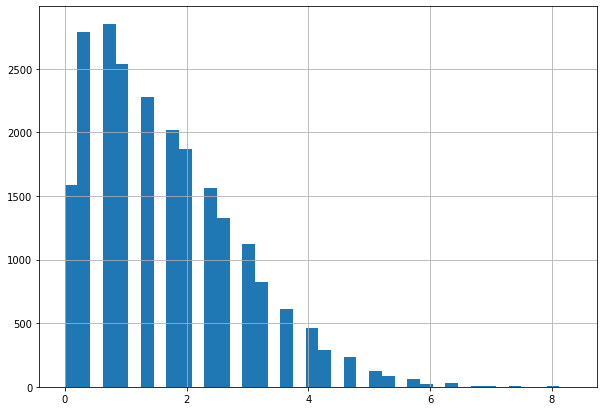

In [33]:
plt.figure(figsize=(10,7))
KP_data_all['Kp'].hist(bins=40)

In [44]:
int(max(KP_data_all['Kp']))

8

In [34]:
KP_data_all['Kp_class'] = KP_data_all.apply(lambda x: int(x['Kp']), axis=1)

In [35]:
KP_data_all['Kp_class'] 

KP_datetime_init
2016-01-01 00:00:00    6
2016-01-01 03:00:00    5
2016-01-01 06:00:00    5
2016-01-01 09:00:00    3
2016-01-01 12:00:00    1
                      ..
2023-10-06 09:00:00    1
2023-10-06 12:00:00    1
2023-10-06 15:00:00    1
2023-10-06 18:00:00    0
2023-10-06 21:00:00    3
Name: Kp_class, Length: 22688, dtype: int64

<AxesSubplot:>

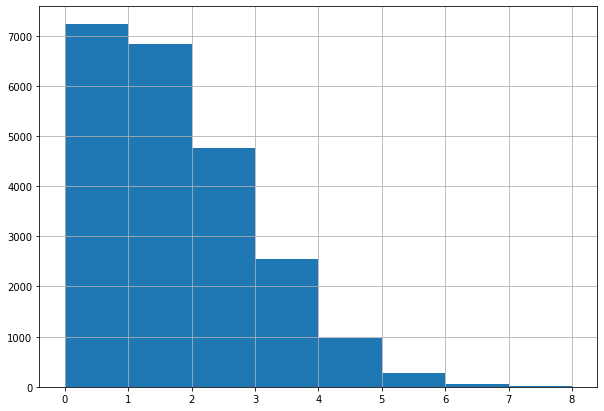

In [38]:
plt.figure(figsize=(10,7))
KP_data_all['Kp_class'].hist(bins=8)

# C. MERGE BOTH DATAFRAMES

In [39]:
DSCVR_KP_all_cleaned = DSCVR_data_all_res_cleaned.join(KP_data_all)
DSCVR_KP_all_cleaned

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   
2016-07-01 12:00:00                 1.719482                 3.512640   
2016-07-01 15:00:00                -1.733990                 1.799461   
...                                      ...                      ...   
2023-05-02 12:00:00                 4.525159                -0.303902   
2023-05-02 15:00:00                 3.567366                 1.580780   
2023-05-02 18:00:00                 4.230931                 0.167467   
2023-05-02 21:00:00                 3.440782                 3.238269   
2023-05-03 00:00:00                 4.234609                 3.294242   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           NaN           NaN   
2016-07-01 06:00:00                -0.228962           NaN           NaN   
2016-07-01 09:00:00                -1.294382           NaN           NaN   
2016-07-01 12:00:00                -0.144519           NaN           NaN   
2016-07-01 15:00:00                -0.555546           NaN           NaN   
...                                      ...           ...           ...   
2023-05-02 12:00:00                 0.267391      1.263438      0.231726   
2023-05-02 15:00:00                 1.438682      1.263416      0.231726   
2023-05-02 18:00:00                -0.925729      1.117462      0.231726   
2023-05-02 21:00:00                -1.601845      0.375699      0.231726   
2023-05-03 00:00:00                -0.042956      0.741283      0.231726   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           NaN           NaN    356.221000    333.408857   
2016-07-01 06:00:00           NaN           NaN           NaN           NaN   
2016-07-01 09:00:00           NaN           NaN           NaN           NaN   
2016-07-01 12:00:00           NaN           NaN    360.279000    340.138000   
2016-07-01 15:00:00           NaN           NaN    354.486000    335.147222   
...                           ...           ...           ...           ...   
2023-05-02 12:00:00      0.390526      0.231726      0.232078      0.231726   
2023-05-02 15:00:00      0.353727      0.231726      0.231726      0.231726   
2023-05-02 18:00:00      0.887621      0.382773      0.446299      0.231726   
2023-05-02 21:00:00      3.624081     20.392764     12.782806      0.239769   
2023-05-03 00:00:00     11.992781     12.568496      5.641754      0.299559   

                     FarCup7_mean  ...  FarCup44_nan  FarCup45_nan  \
datetime_DSCVR                     ...                               
2016-07-01 03:00:00    349.227408  ...           1.0           1.0   
2016-07-01 06:00:00    351.975857  ...           1.0           1.0   
2016-07-01 09:00:00    356.851500  ...           1.0           1.0   
2016-07-01 12:00:00    355.934667  ...           1.0           1.0   
2016-07-01 15:00:00    348.999882  ...           1.0           1.0   
...                           ...  ...           ...           ...   
2023-05-02 12:00:00      0.231726  ...           1.0           1.0   
2023-05-02 15:00:00      0.231726  ...           1.0           1.0   
2023-05-02 18:00:00      0.232609  ...           1.0           1.0   
2023-05-02 21:00:00      0.331157  ...           1.0           1.0   
2023-05-03 00:00:00      0.585979  ...           1.0           1.0   

                     FarCup46_nan  FarCup47_nan  FarCup48_nan  FarCup49_nan  \
datetime_DSCVR                                                  

### Merged DSCVR + KP Export to CSV

In [40]:
DSCVR_KP_all_cleaned.to_csv("DSCVR_KP_all_cleaned.csv")

### Analysis of NaN in each column

In [41]:
for columni in list(DSCVR_KP_all_cleaned.columns):
    
    print(columni + " :" + str(DSCVR_KP_all_cleaned[columni].isna().sum()))

MagFieldVect_Comp1_mean :36
MagFieldVect_Comp2_mean :36
MagFieldVect_Comp3_mean :36
FarCup1_mean :8796
FarCup2_mean :8267
FarCup3_mean :7409
FarCup4_mean :6775
FarCup5_mean :6106
FarCup6_mean :5474
FarCup7_mean :4843
FarCup8_mean :4264
FarCup9_mean :3672
FarCup10_mean :3240
FarCup11_mean :2777
FarCup12_mean :2467
FarCup13_mean :2158
FarCup14_mean :1868
FarCup15_mean :1632
FarCup16_mean :1419
FarCup17_mean :1167
FarCup18_mean :1053
FarCup19_mean :990
FarCup20_mean :1268
FarCup21_mean :1477
FarCup22_mean :2231
FarCup23_mean :2637
FarCup24_mean :3404
FarCup25_mean :4036
FarCup26_mean :4999
FarCup27_mean :5778
FarCup28_mean :7037
FarCup29_mean :7559
FarCup30_mean :9006
FarCup31_mean :9520
FarCup32_mean :10192
FarCup33_mean :11197
FarCup34_mean :11796
FarCup35_mean :12264
FarCup36_mean :13207
FarCup37_mean :13560
FarCup38_mean :14686
FarCup39_mean :15034
FarCup40_mean :15447
FarCup41_mean :15915
FarCup42_mean :16258
FarCup43_mean :16470
FarCup44_mean :16879
FarCup45_mean :16955
FarCup46_mea

(array([  2.,   1.,   2.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   1.,   2.,   1.,   1.,   2.,   2.,   0.,
          1.,   2.,   1.,   1.,   3.,   3.,   1.,   3.,   6.,   3.,   2.,
          1.,   1.,   2.,   3.,   5.,   4.,   2.,   7.,   6.,   5.,   5.,
          3.,   6.,   8.,   5.,   8.,   5.,   6.,   7.,   5.,  10.,  10.,
         10.,  10.,  10.,  12.,   8.,   5.,   9.,   7.,   7.,  11.,   8.,
         16.,   5.,  11.,  11.,  21.,   9.,  11.,  19.,  17.,  25.,  29.,
         23.,  33.,  28.,  32.,  16.,  30.,  45.,  30.,  39.,  44.,  50.,
         46.,  64.,  57.,  48.,  58.,  67.,  54.,  77.,  85.,  91.,  99.,
        116., 119., 118., 119., 138., 

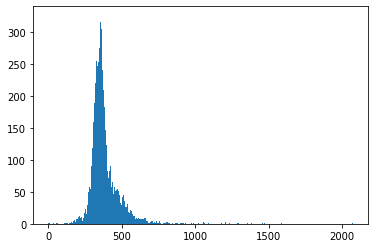

In [45]:
plt.hist(DSCVR_KP_all_cleaned["FarCup18_mean"], bins=1000)

# D. DEALING WITH MISSING VALUES - 2 OPTIONS
- It is the purpose of creating a missing value column (yes=1, no=0) for each variable (vF1, vF2)
- Once the above is done a value of 0 is imputed for the missing value (vF1, vF2)
- Finally, and optionally (vF2) new interaction columns between each of the binary missing value with the rest of the columns is created.
- Note this expands exponentially the number of variables (vF2), that's why we are keeping a version without interactions (vF1) 

In [84]:
DSCVR_KP_all_cleaned_extended = DSCVR_KP_all_cleaned.copy()
DSCVR_KP_all_cleaned_extended_vF1 = DSCVR_KP_all_cleaned.copy()  # only binary missing value columns
DSCVR_KP_all_cleaned_extended_vF2 = DSCVR_KP_all_cleaned.copy()  # binary missing value columns + interactions

In [85]:
np.isnan(DSCVR_KP_all_cleaned_extended['FarCup1_mean'][0])

True

In [86]:
total_iter = len(list(DSCVR_KP_all_cleaned_extended.columns[0:53]))*(-1+len(list(DSCVR_KP_all_cleaned_extended.columns.difference(['Kp','ap','Kp_class']))))
total_iter

16801

In [87]:
count = 0
for columnx in list(DSCVR_KP_all_cleaned_extended.columns[0:53]):
    DSCVR_KP_all_cleaned_extended_vF1[columnx + "_MISSING"] = DSCVR_KP_all_cleaned_extended_vF1.apply(lambda x: 1 if np.isnan(x[columnx]) else 0, axis=1)
    DSCVR_KP_all_cleaned_extended_vF1.fillna(0, inplace=True)
    DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] = DSCVR_KP_all_cleaned_extended_vF2.apply(lambda x: 1 if np.isnan(x[columnx]) else 0, axis=1)
    DSCVR_KP_all_cleaned_extended_vF2.fillna(0, inplace=True)
    countx=0
    for columny in list(DSCVR_KP_all_cleaned_extended.columns.difference(['Kp','ap','Kp_class', columnx])):
        DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
        count +=1
        countx +=1
        print("column X:", columnx, "column Y: ", columny, "Count X: ", countx, "TOTAL COUNT: ", count)
# DSCVR_KP_all_cleaned_extended

column X: MagFieldVect_Comp1_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  1
column X: MagFieldVect_Comp1_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  2
column X: MagFieldVect_Comp1_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  3
column X: MagFieldVect_Comp1_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  4
column X: MagFieldVect_Comp1_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  5
column X: MagFieldVect_Comp1_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  6
column X: MagFieldVect_Comp1_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  7
column X: MagFieldVect_Comp1_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  8
column X: MagFieldVect_Comp1_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  9
column X: MagFieldVect_Comp1_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  10
column X: MagFieldVect_Comp1_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  11
column X: MagFieldVect_Comp1_mean column

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: MagFieldVect_Comp1_mean column Y:  FarCup32_max Count X:  145 TOTAL COUNT:  145
column X: MagFieldVect_Comp1_mean column Y:  FarCup32_mean Count X:  146 TOTAL COUNT:  146
column X: MagFieldVect_Comp1_mean column Y:  FarCup32_median Count X:  147 TOTAL COUNT:  147
column X: MagFieldVect_Comp1_mean column Y:  FarCup32_min Count X:  148 TOTAL COUNT:  148
column X: MagFieldVect_Comp1_mean column Y:  FarCup32_nan Count X:  149 TOTAL COUNT:  149
column X: MagFieldVect_Comp1_mean column Y:  FarCup32_range Count X:  150 TOTAL COUNT:  150
column X: MagFieldVect_Comp1_mean column Y:  FarCup33_max Count X:  151 TOTAL COUNT:  151
column X: MagFieldVect_Comp1_mean column Y:  FarCup33_mean Count X:  152 TOTAL COUNT:  152
column X: MagFieldVect_Comp1_mean column Y:  FarCup33_median Count X:  153 TOTAL COUNT:  153
column X: MagFieldVect_Comp1_mean column Y:  FarCup33_min Count X:  154 TOTAL COUNT:  154
column X: MagFieldVect_Comp1_mean column Y:  FarCup33_nan Count X:  155 TOTAL COUNT:  155


C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: MagFieldVect_Comp1_mean column Y:  FarCup50_max Count X:  265 TOTAL COUNT:  265
column X: MagFieldVect_Comp1_mean column Y:  FarCup50_mean Count X:  266 TOTAL COUNT:  266
column X: MagFieldVect_Comp1_mean column Y:  FarCup50_median Count X:  267 TOTAL COUNT:  267
column X: MagFieldVect_Comp1_mean column Y:  FarCup50_min Count X:  268 TOTAL COUNT:  268
column X: MagFieldVect_Comp1_mean column Y:  FarCup50_nan Count X:  269 TOTAL COUNT:  269
column X: MagFieldVect_Comp1_mean column Y:  FarCup50_range Count X:  270 TOTAL COUNT:  270
column X: MagFieldVect_Comp1_mean column Y:  FarCup5_max Count X:  271 TOTAL COUNT:  271
column X: MagFieldVect_Comp1_mean column Y:  FarCup5_mean Count X:  272 TOTAL COUNT:  272
column X: MagFieldVect_Comp1_mean column Y:  FarCup5_median Count X:  273 TOTAL COUNT:  273
column X: MagFieldVect_Comp1_mean column Y:  FarCup5_min Count X:  274 TOTAL COUNT:  274
column X: MagFieldVect_Comp1_mean column Y:  FarCup5_nan Count X:  275 TOTAL COUNT:  275
colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: MagFieldVect_Comp2_mean column Y:  FarCup32_nan Count X:  149 TOTAL COUNT:  466
column X: MagFieldVect_Comp2_mean column Y:  FarCup32_range Count X:  150 TOTAL COUNT:  467
column X: MagFieldVect_Comp2_mean column Y:  FarCup33_max Count X:  151 TOTAL COUNT:  468
column X: MagFieldVect_Comp2_mean column Y:  FarCup33_mean Count X:  152 TOTAL COUNT:  469
column X: MagFieldVect_Comp2_mean column Y:  FarCup33_median Count X:  153 TOTAL COUNT:  470
column X: MagFieldVect_Comp2_mean column Y:  FarCup33_min Count X:  154 TOTAL COUNT:  471
column X: MagFieldVect_Comp2_mean column Y:  FarCup33_nan Count X:  155 TOTAL COUNT:  472
column X: MagFieldVect_Comp2_mean column Y:  FarCup33_range Count X:  156 TOTAL COUNT:  473
column X: MagFieldVect_Comp2_mean column Y:  FarCup34_max Count X:  157 TOTAL COUNT:  474
column X: MagFieldVect_Comp2_mean column Y:  FarCup34_mean Count X:  158 TOTAL COUNT:  475
column X: MagFieldVect_Comp2_mean column Y:  FarCup34_median Count X:  159 TOTAL COUNT:  47

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: MagFieldVect_Comp2_mean column Y:  FarCup7_range Count X:  288 TOTAL COUNT:  605
column X: MagFieldVect_Comp2_mean column Y:  FarCup8_max Count X:  289 TOTAL COUNT:  606
column X: MagFieldVect_Comp2_mean column Y:  FarCup8_mean Count X:  290 TOTAL COUNT:  607
column X: MagFieldVect_Comp2_mean column Y:  FarCup8_median Count X:  291 TOTAL COUNT:  608
column X: MagFieldVect_Comp2_mean column Y:  FarCup8_min Count X:  292 TOTAL COUNT:  609
column X: MagFieldVect_Comp2_mean column Y:  FarCup8_nan Count X:  293 TOTAL COUNT:  610
column X: MagFieldVect_Comp2_mean column Y:  FarCup8_range Count X:  294 TOTAL COUNT:  611
column X: MagFieldVect_Comp2_mean column Y:  FarCup9_max Count X:  295 TOTAL COUNT:  612
column X: MagFieldVect_Comp2_mean column Y:  FarCup9_mean Count X:  296 TOTAL COUNT:  613
column X: MagFieldVect_Comp2_mean column Y:  FarCup9_median Count X:  297 TOTAL COUNT:  614
column X: MagFieldVect_Comp2_mean column Y:  FarCup9_min Count X:  298 TOTAL COUNT:  615
column X:

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: MagFieldVect_Comp3_mean column Y:  FarCup36_min Count X:  172 TOTAL COUNT:  806
column X: MagFieldVect_Comp3_mean column Y:  FarCup36_nan Count X:  173 TOTAL COUNT:  807
column X: MagFieldVect_Comp3_mean column Y:  FarCup36_range Count X:  174 TOTAL COUNT:  808
column X: MagFieldVect_Comp3_mean column Y:  FarCup37_max Count X:  175 TOTAL COUNT:  809
column X: MagFieldVect_Comp3_mean column Y:  FarCup37_mean Count X:  176 TOTAL COUNT:  810
column X: MagFieldVect_Comp3_mean column Y:  FarCup37_median Count X:  177 TOTAL COUNT:  811
column X: MagFieldVect_Comp3_mean column Y:  FarCup37_min Count X:  178 TOTAL COUNT:  812
column X: MagFieldVect_Comp3_mean column Y:  FarCup37_nan Count X:  179 TOTAL COUNT:  813
column X: MagFieldVect_Comp3_mean column Y:  FarCup37_range Count X:  180 TOTAL COUNT:  814
column X: MagFieldVect_Comp3_mean column Y:  FarCup38_max Count X:  181 TOTAL COUNT:  815
column X: MagFieldVect_Comp3_mean column Y:  FarCup38_mean Count X:  182 TOTAL COUNT:  816
c

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp1_range Count X:  306 TOTAL COUNT:  940
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp2_max Count X:  307 TOTAL COUNT:  941
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp2_mean Count X:  308 TOTAL COUNT:  942
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp2_median Count X:  309 TOTAL COUNT:  943
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp2_min Count X:  310 TOTAL COUNT:  944
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp2_nan Count X:  311 TOTAL COUNT:  945
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp2_range Count X:  312 TOTAL COUNT:  946
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp3_max Count X:  313 TOTAL COUNT:  947
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp3_median Count X:  314 TOTAL COUNT:  948
column X: MagFieldVect_Comp3_mean column Y:  MagFieldVect_Comp3_min Count X:  315 TOTAL C

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup1_mean column Y:  FarCup35_max Count X:  162 TOTAL COUNT:  1113
column X: FarCup1_mean column Y:  FarCup35_mean Count X:  163 TOTAL COUNT:  1114
column X: FarCup1_mean column Y:  FarCup35_median Count X:  164 TOTAL COUNT:  1115
column X: FarCup1_mean column Y:  FarCup35_min Count X:  165 TOTAL COUNT:  1116
column X: FarCup1_mean column Y:  FarCup35_nan Count X:  166 TOTAL COUNT:  1117
column X: FarCup1_mean column Y:  FarCup35_range Count X:  167 TOTAL COUNT:  1118
column X: FarCup1_mean column Y:  FarCup36_max Count X:  168 TOTAL COUNT:  1119
column X: FarCup1_mean column Y:  FarCup36_mean Count X:  169 TOTAL COUNT:  1120
column X: FarCup1_mean column Y:  FarCup36_median Count X:  170 TOTAL COUNT:  1121
column X: FarCup1_mean column Y:  FarCup36_min Count X:  171 TOTAL COUNT:  1122
column X: FarCup1_mean column Y:  FarCup36_nan Count X:  172 TOTAL COUNT:  1123
column X: FarCup1_mean column Y:  FarCup36_range Count X:  173 TOTAL COUNT:  1124
column X: FarCup1_mean colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup1_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  1258
column X: FarCup1_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  1259
column X: FarCup1_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  1260
column X: FarCup1_mean column Y:  MagFieldVect_Comp2_nan Count X:  310 TOTAL COUNT:  1261
column X: FarCup1_mean column Y:  MagFieldVect_Comp2_range Count X:  311 TOTAL COUNT:  1262
column X: FarCup1_mean column Y:  MagFieldVect_Comp3_max Count X:  312 TOTAL COUNT:  1263
column X: FarCup1_mean column Y:  MagFieldVect_Comp3_mean Count X:  313 TOTAL COUNT:  1264
column X: FarCup1_mean column Y:  MagFieldVect_Comp3_median Count X:  314 TOTAL COUNT:  1265
column X: FarCup1_mean column Y:  MagFieldVect_Comp3_min Count X:  315 TOTAL COUNT:  1266
column X: FarCup1_mean column Y:  MagFieldVect_Comp3_nan Count X:  316 TOTAL COUNT:  1267
column X: FarCup1_mean column Y:  MagFieldVect_Comp3_range Count X:  317 TOTAL COUNT:  126

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup2_mean column Y:  FarCup37_mean Count X:  175 TOTAL COUNT:  1443
column X: FarCup2_mean column Y:  FarCup37_median Count X:  176 TOTAL COUNT:  1444
column X: FarCup2_mean column Y:  FarCup37_min Count X:  177 TOTAL COUNT:  1445
column X: FarCup2_mean column Y:  FarCup37_nan Count X:  178 TOTAL COUNT:  1446
column X: FarCup2_mean column Y:  FarCup37_range Count X:  179 TOTAL COUNT:  1447
column X: FarCup2_mean column Y:  FarCup38_max Count X:  180 TOTAL COUNT:  1448
column X: FarCup2_mean column Y:  FarCup38_mean Count X:  181 TOTAL COUNT:  1449
column X: FarCup2_mean column Y:  FarCup38_median Count X:  182 TOTAL COUNT:  1450
column X: FarCup2_mean column Y:  FarCup38_min Count X:  183 TOTAL COUNT:  1451
column X: FarCup2_mean column Y:  FarCup38_nan Count X:  184 TOTAL COUNT:  1452
column X: FarCup2_mean column Y:  FarCup38_range Count X:  185 TOTAL COUNT:  1453
column X: FarCup2_mean column Y:  FarCup39_max Count X:  186 TOTAL COUNT:  1454
column X: FarCup2_mean colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup2_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  1568
column X: FarCup2_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  1569
column X: FarCup2_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  1570
column X: FarCup2_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  1571
column X: FarCup2_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  1572
column X: FarCup2_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  1573
column X: FarCup2_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  1574
column X: FarCup2_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  1575
column X: FarCup2_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  1576
column X: FarCup2_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  1577
column X: FarCup2_mean column Y:  MagFieldVect_Comp2_nan Count X:  310 TOTAL COUNT:  1578


C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup3_mean column Y:  FarCup34_nan Count X:  161 TOTAL COUNT:  1746
column X: FarCup3_mean column Y:  FarCup34_range Count X:  162 TOTAL COUNT:  1747
column X: FarCup3_mean column Y:  FarCup35_max Count X:  163 TOTAL COUNT:  1748
column X: FarCup3_mean column Y:  FarCup35_mean Count X:  164 TOTAL COUNT:  1749
column X: FarCup3_mean column Y:  FarCup35_median Count X:  165 TOTAL COUNT:  1750
column X: FarCup3_mean column Y:  FarCup35_min Count X:  166 TOTAL COUNT:  1751
column X: FarCup3_mean column Y:  FarCup35_nan Count X:  167 TOTAL COUNT:  1752
column X: FarCup3_mean column Y:  FarCup35_range Count X:  168 TOTAL COUNT:  1753
column X: FarCup3_mean column Y:  FarCup36_max Count X:  169 TOTAL COUNT:  1754
column X: FarCup3_mean column Y:  FarCup36_mean Count X:  170 TOTAL COUNT:  1755
column X: FarCup3_mean column Y:  FarCup36_median Count X:  171 TOTAL COUNT:  1756
column X: FarCup3_mean column Y:  FarCup36_min Count X:  172 TOTAL COUNT:  1757
column X: FarCup3_mean colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup3_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  1882
column X: FarCup3_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  1883
column X: FarCup3_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  1884
column X: FarCup3_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  1885
column X: FarCup3_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  1886
column X: FarCup3_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  1887
column X: FarCup3_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  1888
column X: FarCup3_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  1889
column X: FarCup3_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  1890
column X: FarCup3_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  1891
column X: FarCup3_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  1892
column X: FarCup3_mean column Y:  

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup4_mean column Y:  FarCup35_median Count X:  165 TOTAL COUNT:  2067
column X: FarCup4_mean column Y:  FarCup35_min Count X:  166 TOTAL COUNT:  2068
column X: FarCup4_mean column Y:  FarCup35_nan Count X:  167 TOTAL COUNT:  2069
column X: FarCup4_mean column Y:  FarCup35_range Count X:  168 TOTAL COUNT:  2070
column X: FarCup4_mean column Y:  FarCup36_max Count X:  169 TOTAL COUNT:  2071
column X: FarCup4_mean column Y:  FarCup36_mean Count X:  170 TOTAL COUNT:  2072
column X: FarCup4_mean column Y:  FarCup36_median Count X:  171 TOTAL COUNT:  2073
column X: FarCup4_mean column Y:  FarCup36_min Count X:  172 TOTAL COUNT:  2074
column X: FarCup4_mean column Y:  FarCup36_nan Count X:  173 TOTAL COUNT:  2075
column X: FarCup4_mean column Y:  FarCup36_range Count X:  174 TOTAL COUNT:  2076
column X: FarCup4_mean column Y:  FarCup37_max Count X:  175 TOTAL COUNT:  2077
column X: FarCup4_mean column Y:  FarCup37_mean Count X:  176 TOTAL COUNT:  2078
column X: FarCup4_mean colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup4_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  2199
column X: FarCup4_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  2200
column X: FarCup4_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  2201
column X: FarCup4_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  2202
column X: FarCup4_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  2203
column X: FarCup4_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  2204
column X: FarCup4_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  2205
column X: FarCup4_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  2206
column X: FarCup4_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  2207
column X: FarCup4_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  2208
column X: FarCup4_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  2209
column X: FarCup4_mean column Y:  

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup5_mean column Y:  FarCup33_nan Count X:  155 TOTAL COUNT:  2374
column X: FarCup5_mean column Y:  FarCup33_range Count X:  156 TOTAL COUNT:  2375
column X: FarCup5_mean column Y:  FarCup34_max Count X:  157 TOTAL COUNT:  2376
column X: FarCup5_mean column Y:  FarCup34_mean Count X:  158 TOTAL COUNT:  2377
column X: FarCup5_mean column Y:  FarCup34_median Count X:  159 TOTAL COUNT:  2378
column X: FarCup5_mean column Y:  FarCup34_min Count X:  160 TOTAL COUNT:  2379
column X: FarCup5_mean column Y:  FarCup34_nan Count X:  161 TOTAL COUNT:  2380
column X: FarCup5_mean column Y:  FarCup34_range Count X:  162 TOTAL COUNT:  2381
column X: FarCup5_mean column Y:  FarCup35_max Count X:  163 TOTAL COUNT:  2382
column X: FarCup5_mean column Y:  FarCup35_mean Count X:  164 TOTAL COUNT:  2383
column X: FarCup5_mean column Y:  FarCup35_median Count X:  165 TOTAL COUNT:  2384
column X: FarCup5_mean column Y:  FarCup35_min Count X:  166 TOTAL COUNT:  2385
column X: FarCup5_mean colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup5_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  2509
column X: FarCup5_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  2510
column X: FarCup5_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  2511
column X: FarCup5_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  2512
column X: FarCup5_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  2513
column X: FarCup5_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  2514
column X: FarCup5_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  2515
column X: FarCup5_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  2516
column X: FarCup5_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  2517
column X: FarCup5_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  2518
column X: FarCup5_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  2519
column X: FarCup5_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  2520
column X: FarCup5_

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

 TOTAL COUNT:  2701
column X: FarCup6_mean column Y:  FarCup35_min Count X:  166 TOTAL COUNT:  2702
column X: FarCup6_mean column Y:  FarCup35_nan Count X:  167 TOTAL COUNT:  2703
column X: FarCup6_mean column Y:  FarCup35_range Count X:  168 TOTAL COUNT:  2704
column X: FarCup6_mean column Y:  FarCup36_max Count X:  169 TOTAL COUNT:  2705
column X: FarCup6_mean column Y:  FarCup36_mean Count X:  170 TOTAL COUNT:  2706
column X: FarCup6_mean column Y:  FarCup36_median Count X:  171 TOTAL COUNT:  2707
column X: FarCup6_mean column Y:  FarCup36_min Count X:  172 TOTAL COUNT:  2708
column X: FarCup6_mean column Y:  FarCup36_nan Count X:  173 TOTAL COUNT:  2709
column X: FarCup6_mean column Y:  FarCup36_range Count X:  174 TOTAL COUNT:  2710
column X: FarCup6_mean column Y:  FarCup37_max Count X:  175 TOTAL COUNT:  2711
column X: FarCup6_mean column Y:  FarCup37_mean Count X:  176 TOTAL COUNT:  2712
column X: FarCup6_mean column Y:  FarCup37_median Count X:  177 TOTAL COUNT:  2713
column X

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup6_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  2837
column X: FarCup6_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  2838
column X: FarCup6_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  2839
column X: FarCup6_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  2840
column X: FarCup6_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  2841
column X: FarCup6_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  2842
column X: FarCup6_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  2843
column X: FarCup6_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  2844
column X: FarCup6_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  2845
column X: FarCup6_mean column Y:  MagFieldVect_Comp2_nan Count X:  310 TOTAL COUNT:  2846
column X: FarCup6_mean column Y:  MagFieldVect_Comp2_range Count X:  311 TOTAL COUNT:  284

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column Y:  FarCup35_nan Count X:  167 TOTAL COUNT:  3020
column X: FarCup7_mean column Y:  FarCup35_range Count X:  168 TOTAL COUNT:  3021
column X: FarCup7_mean column Y:  FarCup36_max Count X:  169 TOTAL COUNT:  3022
column X: FarCup7_mean column Y:  FarCup36_mean Count X:  170 TOTAL COUNT:  3023
column X: FarCup7_mean column Y:  FarCup36_median Count X:  171 TOTAL COUNT:  3024
column X: FarCup7_mean column Y:  FarCup36_min Count X:  172 TOTAL COUNT:  3025
column X: FarCup7_mean column Y:  FarCup36_nan Count X:  173 TOTAL COUNT:  3026
column X: FarCup7_mean column Y:  FarCup36_range Count X:  174 TOTAL COUNT:  3027
column X: FarCup7_mean column Y:  FarCup37_max Count X:  175 TOTAL COUNT:  3028
column X: FarCup7_mean column Y:  FarCup37_mean Count X:  176 TOTAL COUNT:  3029
column X: FarCup7_mean column Y:  FarCup37_median Count X:  177 TOTAL COUNT:  3030
column X: FarCup7_mean column Y:  FarCup37_min Count X:  178 TOTAL COUNT:  3031
column X: FarCup7_mean column Y:  FarCup37_nan Coun

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup7_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  3157
column X: FarCup7_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  3158
column X: FarCup7_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  3159
column X: FarCup7_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  3160
column X: FarCup7_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  3161
column X: FarCup7_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  3162
column X: FarCup7_mean column Y:  MagFieldVect_Comp2_nan Count X:  310 TOTAL COUNT:  3163
column X: FarCup7_mean column Y:  MagFieldVect_Comp2_range Count X:  311 TOTAL COUNT:  3164
column X: FarCup7_mean column Y:  MagFieldVect_Comp3_max Count X:  312 TOTAL COUNT:  3165
column X: FarCup7_mean column Y:  MagFieldVect_Comp3_mean Count X:  313 TOTAL COUNT:  3166
column X: FarCup7_mean column Y:  MagFieldVect_Comp3_median Count X:  314 TOTAL COUNT:  316

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup8_mean column Y:  FarCup35_median Count X:  165 TOTAL COUNT:  3335
column X: FarCup8_mean column Y:  FarCup35_min Count X:  166 TOTAL COUNT:  3336
column X: FarCup8_mean column Y:  FarCup35_nan Count X:  167 TOTAL COUNT:  3337
column X: FarCup8_mean column Y:  FarCup35_range Count X:  168 TOTAL COUNT:  3338
column X: FarCup8_mean column Y:  FarCup36_max Count X:  169 TOTAL COUNT:  3339
column X: FarCup8_mean column Y:  FarCup36_mean Count X:  170 TOTAL COUNT:  3340
column X: FarCup8_mean column Y:  FarCup36_median Count X:  171 TOTAL COUNT:  3341
column X: FarCup8_mean column Y:  FarCup36_min Count X:  172 TOTAL COUNT:  3342
column X: FarCup8_mean column Y:  FarCup36_nan Count X:  173 TOTAL COUNT:  3343
column X: FarCup8_mean column Y:  FarCup36_range Count X:  174 TOTAL COUNT:  3344
column X: FarCup8_mean column Y:  FarCup37_max Count X:  175 TOTAL COUNT:  3345
column X: FarCup8_mean column Y:  FarCup37_mean Count X:  176 TOTAL COUNT:  3346
column X: FarCup8_mean colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup8_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  3463
column X: FarCup8_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  3464
column X: FarCup8_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  3465
column X: FarCup8_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  3466
column X: FarCup8_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  3467
column X: FarCup8_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  3468
column X: FarCup8_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  3469
column X: FarCup8_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  3470
column X: FarCup8_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  3471
column X: FarCup8_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  3472
column X: FarCup8_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  3473
column X: FarCup8_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTA

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup9_mean column Y:  FarCup35_nan Count X:  167 TOTAL COUNT:  3654
column X: FarCup9_mean column Y:  FarCup35_range Count X:  168 TOTAL COUNT:  3655
column X: FarCup9_mean column Y:  FarCup36_max Count X:  169 TOTAL COUNT:  3656
column X: FarCup9_mean column Y:  FarCup36_mean Count X:  170 TOTAL COUNT:  3657
column X: FarCup9_mean column Y:  FarCup36_median Count X:  171 TOTAL COUNT:  3658
column X: FarCup9_mean column Y:  FarCup36_min Count X:  172 TOTAL COUNT:  3659
column X: FarCup9_mean column Y:  FarCup36_nan Count X:  173 TOTAL COUNT:  3660
column X: FarCup9_mean column Y:  FarCup36_range Count X:  174 TOTAL COUNT:  3661
column X: FarCup9_mean column Y:  FarCup37_max Count X:  175 TOTAL COUNT:  3662
column X: FarCup9_mean column Y:  FarCup37_mean Count X:  176 TOTAL COUNT:  3663
column X: FarCup9_mean column Y:  FarCup37_median Count X:  177 TOTAL COUNT:  3664
column X: FarCup9_mean column Y:  FarCup37_min Count X:  178 TOTAL COUNT:  3665
column X: FarCup9_mean colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup9_mean column Y:  FarCup5_mean Count X:  272 TOTAL COUNT:  3759
column X: FarCup9_mean column Y:  FarCup5_median Count X:  273 TOTAL COUNT:  3760
column X: FarCup9_mean column Y:  FarCup5_min Count X:  274 TOTAL COUNT:  3761
column X: FarCup9_mean column Y:  FarCup5_nan Count X:  275 TOTAL COUNT:  3762
column X: FarCup9_mean column Y:  FarCup5_range Count X:  276 TOTAL COUNT:  3763
column X: FarCup9_mean column Y:  FarCup6_max Count X:  277 TOTAL COUNT:  3764
column X: FarCup9_mean column Y:  FarCup6_mean Count X:  278 TOTAL COUNT:  3765
column X: FarCup9_mean column Y:  FarCup6_median Count X:  279 TOTAL COUNT:  3766
column X: FarCup9_mean column Y:  FarCup6_min Count X:  280 TOTAL COUNT:  3767
column X: FarCup9_mean column Y:  FarCup6_nan Count X:  281 TOTAL COUNT:  3768
column X: FarCup9_mean column Y:  FarCup6_range Count X:  282 TOTAL COUNT:  3769
column X: FarCup9_mean column Y:  FarCup7_max Count X:  283 TOTAL COUNT:  3770
column X: FarCup9_mean column Y:  FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup10_mean column Y:  FarCup33_min Count X:  153 TOTAL COUNT:  3957
column X: FarCup10_mean column Y:  FarCup33_nan Count X:  154 TOTAL COUNT:  3958
column X: FarCup10_mean column Y:  FarCup33_range Count X:  155 TOTAL COUNT:  3959
column X: FarCup10_mean column Y:  FarCup34_max Count X:  156 TOTAL COUNT:  3960
column X: FarCup10_mean column Y:  FarCup34_mean Count X:  157 TOTAL COUNT:  3961
column X: FarCup10_mean column Y:  FarCup34_median Count X:  158 TOTAL COUNT:  3962
column X: FarCup10_mean column Y:  FarCup34_min Count X:  159 TOTAL COUNT:  3963
column X: FarCup10_mean column Y:  FarCup34_nan Count X:  160 TOTAL COUNT:  3964
column X: FarCup10_mean column Y:  FarCup34_range Count X:  161 TOTAL COUNT:  3965
column X: FarCup10_mean column Y:  FarCup35_max Count X:  162 TOTAL COUNT:  3966
column X: FarCup10_mean column Y:  FarCup35_mean Count X:  163 TOTAL COUNT:  3967
column X: FarCup10_mean column Y:  FarCup35_median Count X:  164 TOTAL COUNT:  3968
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup10_mean column Y:  FarCup5_nan Count X:  274 TOTAL COUNT:  4078
column X: FarCup10_mean column Y:  FarCup5_range Count X:  275 TOTAL COUNT:  4079
column X: FarCup10_mean column Y:  FarCup6_max Count X:  276 TOTAL COUNT:  4080
column X: FarCup10_mean column Y:  FarCup6_mean Count X:  277 TOTAL COUNT:  4081
column X: FarCup10_mean column Y:  FarCup6_median Count X:  278 TOTAL COUNT:  4082
column X: FarCup10_mean column Y:  FarCup6_min Count X:  279 TOTAL COUNT:  4083
column X: FarCup10_mean column Y:  FarCup6_nan Count X:  280 TOTAL COUNT:  4084
column X: FarCup10_mean column Y:  FarCup6_range Count X:  281 TOTAL COUNT:  4085
column X: FarCup10_mean column Y:  FarCup7_max Count X:  282 TOTAL COUNT:  4086
column X: FarCup10_mean column Y:  FarCup7_mean Count X:  283 TOTAL COUNT:  4087
column X: FarCup10_mean column Y:  FarCup7_median Count X:  284 TOTAL COUNT:  4088
column X: FarCup10_mean column Y:  FarCup7_min Count X:  285 TOTAL COUNT:  4089
column X: FarCup10_mean colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

 Count X:  156 TOTAL COUNT:  4277
column X: FarCup11_mean column Y:  FarCup34_mean Count X:  157 TOTAL COUNT:  4278
column X: FarCup11_mean column Y:  FarCup34_median Count X:  158 TOTAL COUNT:  4279
column X: FarCup11_mean column Y:  FarCup34_min Count X:  159 TOTAL COUNT:  4280
column X: FarCup11_mean column Y:  FarCup34_nan Count X:  160 TOTAL COUNT:  4281
column X: FarCup11_mean column Y:  FarCup34_range Count X:  161 TOTAL COUNT:  4282
column X: FarCup11_mean column Y:  FarCup35_max Count X:  162 TOTAL COUNT:  4283
column X: FarCup11_mean column Y:  FarCup35_mean Count X:  163 TOTAL COUNT:  4284
column X: FarCup11_mean column Y:  FarCup35_median Count X:  164 TOTAL COUNT:  4285
column X: FarCup11_mean column Y:  FarCup35_min Count X:  165 TOTAL COUNT:  4286
column X: FarCup11_mean column Y:  FarCup35_nan Count X:  166 TOTAL COUNT:  4287
column X: FarCup11_mean column Y:  FarCup35_range Count X:  167 TOTAL COUNT:  4288
column X: FarCup11_mean column Y:  FarCup36_max Count X:  168 T

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup11_mean column Y:  FarCup7_mean Count X:  283 TOTAL COUNT:  4404
column X: FarCup11_mean column Y:  FarCup7_median Count X:  284 TOTAL COUNT:  4405
column X: FarCup11_mean column Y:  FarCup7_min Count X:  285 TOTAL COUNT:  4406
column X: FarCup11_mean column Y:  FarCup7_nan Count X:  286 TOTAL COUNT:  4407
column X: FarCup11_mean column Y:  FarCup7_range Count X:  287 TOTAL COUNT:  4408
column X: FarCup11_mean column Y:  FarCup8_max Count X:  288 TOTAL COUNT:  4409
column X: FarCup11_mean column Y:  FarCup8_mean Count X:  289 TOTAL COUNT:  4410
column X: FarCup11_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  4411
column X: FarCup11_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  4412
column X: FarCup11_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  4413
column X: FarCup11_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  4414
column X: FarCup11_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  4415
column X: FarCup11_mean colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup12_mean column Y:  FarCup31_mean Count X:  139 TOTAL COUNT:  4577
column X: FarCup12_mean column Y:  FarCup31_median Count X:  140 TOTAL COUNT:  4578
column X: FarCup12_mean column Y:  FarCup31_min Count X:  141 TOTAL COUNT:  4579
column X: FarCup12_mean column Y:  FarCup31_nan Count X:  142 TOTAL COUNT:  4580
column X: FarCup12_mean column Y:  FarCup31_range Count X:  143 TOTAL COUNT:  4581
column X: FarCup12_mean column Y:  FarCup32_max Count X:  144 TOTAL COUNT:  4582
column X: FarCup12_mean column Y:  FarCup32_mean Count X:  145 TOTAL COUNT:  4583
column X: FarCup12_mean column Y:  FarCup32_median Count X:  146 TOTAL COUNT:  4584
column X: FarCup12_mean column Y:  FarCup32_min Count X:  147 TOTAL COUNT:  4585
column X: FarCup12_mean column Y:  FarCup32_nan Count X:  148 TOTAL COUNT:  4586
column X: FarCup12_mean column Y:  FarCup32_range Count X:  149 TOTAL COUNT:  4587
column X: FarCup12_mean column Y:  FarCup33_max Count X:  150 TOTAL COUNT:  4588
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup12_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  4700
column X: FarCup12_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  4701
column X: FarCup12_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  4702
column X: FarCup12_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  4703
column X: FarCup12_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  4704
column X: FarCup12_mean column Y:  FarCup50_min Count X:  267 TOTAL COUNT:  4705
column X: FarCup12_mean column Y:  FarCup50_nan Count X:  268 TOTAL COUNT:  4706
column X: FarCup12_mean column Y:  FarCup50_range Count X:  269 TOTAL COUNT:  4707
column X: FarCup12_mean column Y:  FarCup5_max Count X:  270 TOTAL COUNT:  4708
column X: FarCup12_mean column Y:  FarCup5_mean Count X:  271 TOTAL COUNT:  4709
column X: FarCup12_mean column Y:  FarCup5_median Count X:  272 TOTAL COUNT:  4710
column X: FarCup12_mean column Y:  FarCup5_min Count X:  273 TOTAL COUNT:  4711
column X: FarCup12_mea

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

 Count X:  169 TOTAL COUNT:  4924
column X: FarCup13_mean column Y:  FarCup36_median Count X:  170 TOTAL COUNT:  4925
column X: FarCup13_mean column Y:  FarCup36_min Count X:  171 TOTAL COUNT:  4926
column X: FarCup13_mean column Y:  FarCup36_nan Count X:  172 TOTAL COUNT:  4927
column X: FarCup13_mean column Y:  FarCup36_range Count X:  173 TOTAL COUNT:  4928
column X: FarCup13_mean column Y:  FarCup37_max Count X:  174 TOTAL COUNT:  4929
column X: FarCup13_mean column Y:  FarCup37_mean Count X:  175 TOTAL COUNT:  4930
column X: FarCup13_mean column Y:  FarCup37_median Count X:  176 TOTAL COUNT:  4931
column X: FarCup13_mean column Y:  FarCup37_min Count X:  177 TOTAL COUNT:  4932
column X: FarCup13_mean column Y:  FarCup37_nan Count X:  178 TOTAL COUNT:  4933
column X: FarCup13_mean column Y:  FarCup37_range Count X:  179 TOTAL COUNT:  4934
column X: FarCup13_mean column Y:  FarCup38_max Count X:  180 TOTAL COUNT:  4935
column X: FarCup13_mean column Y:  FarCup38_mean Count X:  181 T

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup13_mean column Y:  FarCup6_median Count X:  278 TOTAL COUNT:  5033
column X: FarCup13_mean column Y:  FarCup6_min Count X:  279 TOTAL COUNT:  5034
column X: FarCup13_mean column Y:  FarCup6_nan Count X:  280 TOTAL COUNT:  5035
column X: FarCup13_mean column Y:  FarCup6_range Count X:  281 TOTAL COUNT:  5036
column X: FarCup13_mean column Y:  FarCup7_max Count X:  282 TOTAL COUNT:  5037
column X: FarCup13_mean column Y:  FarCup7_mean Count X:  283 TOTAL COUNT:  5038
column X: FarCup13_mean column Y:  FarCup7_median Count X:  284 TOTAL COUNT:  5039
column X: FarCup13_mean column Y:  FarCup7_min Count X:  285 TOTAL COUNT:  5040
column X: FarCup13_mean column Y:  FarCup7_nan Count X:  286 TOTAL COUNT:  5041
column X: FarCup13_mean column Y:  FarCup7_range Count X:  287 TOTAL COUNT:  5042
column X: FarCup13_mean column Y:  FarCup8_max Count X:  288 TOTAL COUNT:  5043
column X: FarCup13_mean column Y:  FarCup8_mean Count X:  289 TOTAL COUNT:  5044
column X: FarCup13_mean colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup14_mean column Y:  FarCup32_mean Count X:  145 TOTAL COUNT:  5217
column X: FarCup14_mean column Y:  FarCup32_median Count X:  146 TOTAL COUNT:  5218
column X: FarCup14_mean column Y:  FarCup32_min Count X:  147 TOTAL COUNT:  5219
column X: FarCup14_mean column Y:  FarCup32_nan Count X:  148 TOTAL COUNT:  5220
column X: FarCup14_mean column Y:  FarCup32_range Count X:  149 TOTAL COUNT:  5221
column X: FarCup14_mean column Y:  FarCup33_max Count X:  150 TOTAL COUNT:  5222
column X: FarCup14_mean column Y:  FarCup33_mean Count X:  151 TOTAL COUNT:  5223
column X: FarCup14_mean column Y:  FarCup33_median Count X:  152 TOTAL COUNT:  5224
column X: FarCup14_mean column Y:  FarCup33_min Count X:  153 TOTAL COUNT:  5225
column X: FarCup14_mean column Y:  FarCup33_nan Count X:  154 TOTAL COUNT:  5226
column X: FarCup14_mean column Y:  FarCup33_range Count X:  155 TOTAL COUNT:  5227
column X: FarCup14_mean column Y:  FarCup34_max Count X:  156 TOTAL COUNT:  5228
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup14_mean column Y:  FarCup48_range Count X:  251 TOTAL COUNT:  5323
column X: FarCup14_mean column Y:  FarCup49_max Count X:  252 TOTAL COUNT:  5324
column X: FarCup14_mean column Y:  FarCup49_mean Count X:  253 TOTAL COUNT:  5325
column X: FarCup14_mean column Y:  FarCup49_median Count X:  254 TOTAL COUNT:  5326
column X: FarCup14_mean column Y:  FarCup49_min Count X:  255 TOTAL COUNT:  5327
column X: FarCup14_mean column Y:  FarCup49_nan Count X:  256 TOTAL COUNT:  5328
column X: FarCup14_mean column Y:  FarCup49_range Count X:  257 TOTAL COUNT:  5329
column X: FarCup14_mean column Y:  FarCup4_max Count X:  258 TOTAL COUNT:  5330
column X: FarCup14_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  5331
column X: FarCup14_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  5332
column X: FarCup14_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  5333
column X: FarCup14_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  5334
column X: FarCup14_me

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup14_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  5371
column X: FarCup14_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  5372
column X: FarCup14_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  5373
column X: FarCup14_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  5374
column X: FarCup14_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  5375
column X: FarCup14_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  5376
column X: FarCup14_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  5377
column X: FarCup14_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  5378
column X: FarCup14_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  5379
column X: FarCup14_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  5380
column X: FarCup14_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  538

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup15_mean column Y:  FarCup32_max Count X:  144 TOTAL COUNT:  5533
column X: FarCup15_mean column Y:  FarCup32_mean Count X:  145 TOTAL COUNT:  5534
column X: FarCup15_mean column Y:  FarCup32_median Count X:  146 TOTAL COUNT:  5535
column X: FarCup15_mean column Y:  FarCup32_min Count X:  147 TOTAL COUNT:  5536
column X: FarCup15_mean column Y:  FarCup32_nan Count X:  148 TOTAL COUNT:  5537
column X: FarCup15_mean column Y:  FarCup32_range Count X:  149 TOTAL COUNT:  5538
column X: FarCup15_mean column Y:  FarCup33_max Count X:  150 TOTAL COUNT:  5539
column X: FarCup15_mean column Y:  FarCup33_mean Count X:  151 TOTAL COUNT:  5540
column X: FarCup15_mean column Y:  FarCup33_median Count X:  152 TOTAL COUNT:  5541
column X: FarCup15_mean column Y:  FarCup33_min Count X:  153 TOTAL COUNT:  5542
column X: FarCup15_mean column Y:  FarCup33_nan Count X:  154 TOTAL COUNT:  5543
column X: FarCup15_mean column Y:  FarCup33_range Count X:  155 TOTAL COUNT:  5544
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup15_mean column Y:  FarCup49_mean Count X:  253 TOTAL COUNT:  5642
column X: FarCup15_mean column Y:  FarCup49_median Count X:  254 TOTAL COUNT:  5643
column X: FarCup15_mean column Y:  FarCup49_min Count X:  255 TOTAL COUNT:  5644
column X: FarCup15_mean column Y:  FarCup49_nan Count X:  256 TOTAL COUNT:  5645
column X: FarCup15_mean column Y:  FarCup49_range Count X:  257 TOTAL COUNT:  5646
column X: FarCup15_mean column Y:  FarCup4_max Count X:  258 TOTAL COUNT:  5647
column X: FarCup15_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  5648
column X: FarCup15_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  5649
column X: FarCup15_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  5650
column X: FarCup15_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  5651
column X: FarCup15_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  5652
column X: FarCup15_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  5653
column X: FarCup15_mea

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup16_mean column Y:  FarCup33_min Count X:  153 TOTAL COUNT:  5859
column X: FarCup16_mean column Y:  FarCup33_nan Count X:  154 TOTAL COUNT:  5860
column X: FarCup16_mean column Y:  FarCup33_range Count X:  155 TOTAL COUNT:  5861
column X: FarCup16_mean column Y:  FarCup34_max Count X:  156 TOTAL COUNT:  5862
column X: FarCup16_mean column Y:  FarCup34_mean Count X:  157 TOTAL COUNT:  5863
column X: FarCup16_mean column Y:  FarCup34_median Count X:  158 TOTAL COUNT:  5864
column X: FarCup16_mean column Y:  FarCup34_min Count X:  159 TOTAL COUNT:  5865
column X: FarCup16_mean column Y:  FarCup34_nan Count X:  160 TOTAL COUNT:  5866
column X: FarCup16_mean column Y:  FarCup34_range Count X:  161 TOTAL COUNT:  5867
column X: FarCup16_mean column Y:  FarCup35_max Count X:  162 TOTAL COUNT:  5868
column X: FarCup16_mean column Y:  FarCup35_mean Count X:  163 TOTAL COUNT:  5869
column X: FarCup16_mean column Y:  FarCup35_median Count X:  164 TOTAL COUNT:  5870
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup16_mean column Y:  FarCup47_nan Count X:  244 TOTAL COUNT:  5950
column X: FarCup16_mean column Y:  FarCup47_range Count X:  245 TOTAL COUNT:  5951
column X: FarCup16_mean column Y:  FarCup48_max Count X:  246 TOTAL COUNT:  5952
column X: FarCup16_mean column Y:  FarCup48_mean Count X:  247 TOTAL COUNT:  5953
column X: FarCup16_mean column Y:  FarCup48_median Count X:  248 TOTAL COUNT:  5954
column X: FarCup16_mean column Y:  FarCup48_min Count X:  249 TOTAL COUNT:  5955
column X: FarCup16_mean column Y:  FarCup48_nan Count X:  250 TOTAL COUNT:  5956
column X: FarCup16_mean column Y:  FarCup48_range Count X:  251 TOTAL COUNT:  5957
column X: FarCup16_mean column Y:  FarCup49_max Count X:  252 TOTAL COUNT:  5958
column X: FarCup16_mean column Y:  FarCup49_mean Count X:  253 TOTAL COUNT:  5959
column X: FarCup16_mean column Y:  FarCup49_median Count X:  254 TOTAL COUNT:  5960
column X: FarCup16_mean column Y:  FarCup49_min Count X:  255 TOTAL COUNT:  5961
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup17_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  6024
column X: FarCup17_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  6025
column X: FarCup17_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  6026
column X: FarCup17_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  6027
column X: FarCup17_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  6028
column X: FarCup17_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  6029
column X: FarCup17_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  6030
column X: FarCup17_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  6031
column X: FarCup17_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  6032
column X: FarCup17_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  6033
column X: FarCup17_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  6034
column X: FarCup17_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  6035
column X: FarCup17_mean column Y:  Fa

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup17_mean column Y:  FarCup2_mean Count X:  127 TOTAL COUNT:  6150
column X: FarCup17_mean column Y:  FarCup2_median Count X:  128 TOTAL COUNT:  6151
column X: FarCup17_mean column Y:  FarCup2_min Count X:  129 TOTAL COUNT:  6152
column X: FarCup17_mean column Y:  FarCup2_nan Count X:  130 TOTAL COUNT:  6153
column X: FarCup17_mean column Y:  FarCup2_range Count X:  131 TOTAL COUNT:  6154
column X: FarCup17_mean column Y:  FarCup30_max Count X:  132 TOTAL COUNT:  6155
column X: FarCup17_mean column Y:  FarCup30_mean Count X:  133 TOTAL COUNT:  6156
column X: FarCup17_mean column Y:  FarCup30_median Count X:  134 TOTAL COUNT:  6157
column X: FarCup17_mean column Y:  FarCup30_min Count X:  135 TOTAL COUNT:  6158
column X: FarCup17_mean column Y:  FarCup30_nan Count X:  136 TOTAL COUNT:  6159
column X: FarCup17_mean column Y:  FarCup30_range Count X:  137 TOTAL COUNT:  6160
column X: FarCup17_mean column Y:  FarCup31_max Count X:  138 TOTAL COUNT:  6161
column X: FarCup17_me

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup17_mean column Y:  FarCup45_nan Count X:  232 TOTAL COUNT:  6255
column X: FarCup17_mean column Y:  FarCup45_range Count X:  233 TOTAL COUNT:  6256
column X: FarCup17_mean column Y:  FarCup46_max Count X:  234 TOTAL COUNT:  6257
column X: FarCup17_mean column Y:  FarCup46_mean Count X:  235 TOTAL COUNT:  6258
column X: FarCup17_mean column Y:  FarCup46_median Count X:  236 TOTAL COUNT:  6259
column X: FarCup17_mean column Y:  FarCup46_min Count X:  237 TOTAL COUNT:  6260
column X: FarCup17_mean column Y:  FarCup46_nan Count X:  238 TOTAL COUNT:  6261
column X: FarCup17_mean column Y:  FarCup46_range Count X:  239 TOTAL COUNT:  6262
column X: FarCup17_mean column Y:  FarCup47_max Count X:  240 TOTAL COUNT:  6263
column X: FarCup17_mean column Y:  FarCup47_mean Count X:  241 TOTAL COUNT:  6264
column X: FarCup17_mean column Y:  FarCup47_median Count X:  242 TOTAL COUNT:  6265
column X: FarCup17_mean column Y:  FarCup47_min Count X:  243 TOTAL COUNT:  6266
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup18_mean column Y:  FarCup33_max Count X:  150 TOTAL COUNT:  6490
column X: FarCup18_mean column Y:  FarCup33_mean Count X:  151 TOTAL COUNT:  6491
column X: FarCup18_mean column Y:  FarCup33_median Count X:  152 TOTAL COUNT:  6492
column X: FarCup18_mean column Y:  FarCup33_min Count X:  153 TOTAL COUNT:  6493
column X: FarCup18_mean column Y:  FarCup33_nan Count X:  154 TOTAL COUNT:  6494
column X: FarCup18_mean column Y:  FarCup33_range Count X:  155 TOTAL COUNT:  6495
column X: FarCup18_mean column Y:  FarCup34_max Count X:  156 TOTAL COUNT:  6496
column X: FarCup18_mean column Y:  FarCup34_mean Count X:  157 TOTAL COUNT:  6497
column X: FarCup18_mean column Y:  FarCup34_median Count X:  158 TOTAL COUNT:  6498
column X: FarCup18_mean column Y:  FarCup34_min Count X:  159 TOTAL COUNT:  6499
column X: FarCup18_mean column Y:  FarCup34_nan Count X:  160 TOTAL COUNT:  6500
column X: FarCup18_mean column Y:  FarCup34_range Count X:  161 TOTAL COUNT:  6501
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup18_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  6599
column X: FarCup18_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  6600
column X: FarCup18_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  6601
column X: FarCup18_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  6602
column X: FarCup18_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  6603
column X: FarCup18_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  6604
column X: FarCup18_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  6605
column X: FarCup18_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  6606
column X: FarCup18_mean column Y:  FarCup50_min Count X:  267 TOTAL COUNT:  6607
column X: FarCup18_mean column Y:  FarCup50_nan Count X:  268 TOTAL COUNT:  6608
column X: FarCup18_mean column Y:  FarCup50_range Count X:  269 TOTAL COUNT:  6609
column X: FarCup18_mean column Y:  FarCup5_max Count X:  270 TOTAL COUNT:  6610
column X: FarCup18_mea

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup19_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  6658
column X: FarCup19_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  6659
column X: FarCup19_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  6660
column X: FarCup19_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  6661
column X: FarCup19_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  6662
column X: FarCup19_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  6663
column X: FarCup19_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  6664
column X: FarCup19_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  6665
column X: FarCup19_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  6666
column X: FarCup19_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  6667
column X: FarCup19_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  6668
column X: FarCup19_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  6669
column X: FarCup19_mean column Y:  Fa

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup19_mean column Y:  FarCup32_median Count X:  146 TOTAL COUNT:  6803
column X: FarCup19_mean column Y:  FarCup32_min Count X:  147 TOTAL COUNT:  6804
column X: FarCup19_mean column Y:  FarCup32_nan Count X:  148 TOTAL COUNT:  6805
column X: FarCup19_mean column Y:  FarCup32_range Count X:  149 TOTAL COUNT:  6806
column X: FarCup19_mean column Y:  FarCup33_max Count X:  150 TOTAL COUNT:  6807
column X: FarCup19_mean column Y:  FarCup33_mean Count X:  151 TOTAL COUNT:  6808
column X: FarCup19_mean column Y:  FarCup33_median Count X:  152 TOTAL COUNT:  6809
column X: FarCup19_mean column Y:  FarCup33_min Count X:  153 TOTAL COUNT:  6810
column X: FarCup19_mean column Y:  FarCup33_nan Count X:  154 TOTAL COUNT:  6811
column X: FarCup19_mean column Y:  FarCup33_range Count X:  155 TOTAL COUNT:  6812
column X: FarCup19_mean column Y:  FarCup34_max Count X:  156 TOTAL COUNT:  6813
column X: FarCup19_mean column Y:  FarCup34_mean Count X:  157 TOTAL COUNT:  6814
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup19_mean column Y:  FarCup49_min Count X:  255 TOTAL COUNT:  6912
column X: FarCup19_mean column Y:  FarCup49_nan Count X:  256 TOTAL COUNT:  6913
column X: FarCup19_mean column Y:  FarCup49_range Count X:  257 TOTAL COUNT:  6914
column X: FarCup19_mean column Y:  FarCup4_max Count X:  258 TOTAL COUNT:  6915
column X: FarCup19_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  6916
column X: FarCup19_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  6917
column X: FarCup19_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  6918
column X: FarCup19_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  6919
column X: FarCup19_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  6920
column X: FarCup19_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  6921
column X: FarCup19_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  6922
column X: FarCup19_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  6923
column X: FarCup19_mea

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup20_mean column Y:  FarCup32_max Count X:  144 TOTAL COUNT:  7118
column X: FarCup20_mean column Y:  FarCup32_mean Count X:  145 TOTAL COUNT:  7119
column X: FarCup20_mean column Y:  FarCup32_median Count X:  146 TOTAL COUNT:  7120
column X: FarCup20_mean column Y:  FarCup32_min Count X:  147 TOTAL COUNT:  7121
column X: FarCup20_mean column Y:  FarCup32_nan Count X:  148 TOTAL COUNT:  7122
column X: FarCup20_mean column Y:  FarCup32_range Count X:  149 TOTAL COUNT:  7123
column X: FarCup20_mean column Y:  FarCup33_max Count X:  150 TOTAL COUNT:  7124
column X: FarCup20_mean column Y:  FarCup33_mean Count X:  151 TOTAL COUNT:  7125
column X: FarCup20_mean column Y:  FarCup33_median Count X:  152 TOTAL COUNT:  7126
column X: FarCup20_mean column Y:  FarCup33_min Count X:  153 TOTAL COUNT:  7127
column X: FarCup20_mean column Y:  FarCup33_nan Count X:  154 TOTAL COUNT:  7128
column X: FarCup20_mean column Y:  FarCup33_range Count X:  155 TOTAL COUNT:  7129
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup20_mean column Y:  FarCup48_nan Count X:  250 TOTAL COUNT:  7224
column X: FarCup20_mean column Y:  FarCup48_range Count X:  251 TOTAL COUNT:  7225
column X: FarCup20_mean column Y:  FarCup49_max Count X:  252 TOTAL COUNT:  7226
column X: FarCup20_mean column Y:  FarCup49_mean Count X:  253 TOTAL COUNT:  7227
column X: FarCup20_mean column Y:  FarCup49_median Count X:  254 TOTAL COUNT:  7228
column X: FarCup20_mean column Y:  FarCup49_min Count X:  255 TOTAL COUNT:  7229
column X: FarCup20_mean column Y:  FarCup49_nan Count X:  256 TOTAL COUNT:  7230
column X: FarCup20_mean column Y:  FarCup49_range Count X:  257 TOTAL COUNT:  7231
column X: FarCup20_mean column Y:  FarCup4_max Count X:  258 TOTAL COUNT:  7232
column X: FarCup20_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  7233
column X: FarCup20_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  7234
column X: FarCup20_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  7235
column X: FarCup20_m

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup21_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  7292
column X: FarCup21_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  7293
column X: FarCup21_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  7294
column X: FarCup21_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  7295
column X: FarCup21_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  7296
column X: FarCup21_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  7297
column X: FarCup21_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  7298
column X: FarCup21_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  7299
column X: FarCup21_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  7300
column X: FarCup21_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  7301
column X: FarCup21_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  7302
column X: FarCup21_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  7303
column X: FarCup21_mean column Y:  Fa

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

TOTAL COUNT:  7415
column X: FarCup21_mean column Y:  FarCup29_range Count X:  125 TOTAL COUNT:  7416
column X: FarCup21_mean column Y:  FarCup2_max Count X:  126 TOTAL COUNT:  7417
column X: FarCup21_mean column Y:  FarCup2_mean Count X:  127 TOTAL COUNT:  7418
column X: FarCup21_mean column Y:  FarCup2_median Count X:  128 TOTAL COUNT:  7419
column X: FarCup21_mean column Y:  FarCup2_min Count X:  129 TOTAL COUNT:  7420
column X: FarCup21_mean column Y:  FarCup2_nan Count X:  130 TOTAL COUNT:  7421
column X: FarCup21_mean column Y:  FarCup2_range Count X:  131 TOTAL COUNT:  7422
column X: FarCup21_mean column Y:  FarCup30_max Count X:  132 TOTAL COUNT:  7423
column X: FarCup21_mean column Y:  FarCup30_mean Count X:  133 TOTAL COUNT:  7424
column X: FarCup21_mean column Y:  FarCup30_median Count X:  134 TOTAL COUNT:  7425
column X: FarCup21_mean column Y:  FarCup30_min Count X:  135 TOTAL COUNT:  7426
column X: FarCup21_mean column Y:  FarCup30_nan Count X:  136 TOTAL COUNT:  7427
col

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup21_mean column Y:  FarCup46_median Count X:  236 TOTAL COUNT:  7527
column X: FarCup21_mean column Y:  FarCup46_min Count X:  237 TOTAL COUNT:  7528
column X: FarCup21_mean column Y:  FarCup46_nan Count X:  238 TOTAL COUNT:  7529
column X: FarCup21_mean column Y:  FarCup46_range Count X:  239 TOTAL COUNT:  7530
column X: FarCup21_mean column Y:  FarCup47_max Count X:  240 TOTAL COUNT:  7531
column X: FarCup21_mean column Y:  FarCup47_mean Count X:  241 TOTAL COUNT:  7532
column X: FarCup21_mean column Y:  FarCup47_median Count X:  242 TOTAL COUNT:  7533
column X: FarCup21_mean column Y:  FarCup47_min Count X:  243 TOTAL COUNT:  7534
column X: FarCup21_mean column Y:  FarCup47_nan Count X:  244 TOTAL COUNT:  7535
column X: FarCup21_mean column Y:  FarCup47_range Count X:  245 TOTAL COUNT:  7536
column X: FarCup21_mean column Y:  FarCup48_max Count X:  246 TOTAL COUNT:  7537
column X: FarCup21_mean column Y:  FarCup48_mean Count X:  247 TOTAL COUNT:  7538
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup22_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  7609
column X: FarCup22_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  7610
column X: FarCup22_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  7611
column X: FarCup22_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  7612
column X: FarCup22_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  7613
column X: FarCup22_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  7614
column X: FarCup22_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  7615
column X: FarCup22_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  7616
column X: FarCup22_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  7617
column X: FarCup22_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  7618
column X: FarCup22_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  7619
column X: FarCup22_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  7620
column X: FarCup22_mean column Y:  Fa

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup22_mean column Y:  FarCup2_min Count X:  129 TOTAL COUNT:  7737
column X: FarCup22_mean column Y:  FarCup2_nan Count X:  130 TOTAL COUNT:  7738
column X: FarCup22_mean column Y:  FarCup2_range Count X:  131 TOTAL COUNT:  7739
column X: FarCup22_mean column Y:  FarCup30_max Count X:  132 TOTAL COUNT:  7740
column X: FarCup22_mean column Y:  FarCup30_mean Count X:  133 TOTAL COUNT:  7741
column X: FarCup22_mean column Y:  FarCup30_median Count X:  134 TOTAL COUNT:  7742
column X: FarCup22_mean column Y:  FarCup30_min Count X:  135 TOTAL COUNT:  7743
column X: FarCup22_mean column Y:  FarCup30_nan Count X:  136 TOTAL COUNT:  7744
column X: FarCup22_mean column Y:  FarCup30_range Count X:  137 TOTAL COUNT:  7745
column X: FarCup22_mean column Y:  FarCup31_max Count X:  138 TOTAL COUNT:  7746
column X: FarCup22_mean column Y:  FarCup31_mean Count X:  139 TOTAL COUNT:  7747
column X: FarCup22_mean column Y:  FarCup31_median Count X:  140 TOTAL COUNT:  7748
column X: FarCup22_

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup22_mean column Y:  FarCup46_min Count X:  237 TOTAL COUNT:  7845
column X: FarCup22_mean column Y:  FarCup46_nan Count X:  238 TOTAL COUNT:  7846
column X: FarCup22_mean column Y:  FarCup46_range Count X:  239 TOTAL COUNT:  7847
column X: FarCup22_mean column Y:  FarCup47_max Count X:  240 TOTAL COUNT:  7848
column X: FarCup22_mean column Y:  FarCup47_mean Count X:  241 TOTAL COUNT:  7849
column X: FarCup22_mean column Y:  FarCup47_median Count X:  242 TOTAL COUNT:  7850
column X: FarCup22_mean column Y:  FarCup47_min Count X:  243 TOTAL COUNT:  7851
column X: FarCup22_mean column Y:  FarCup47_nan Count X:  244 TOTAL COUNT:  7852
column X: FarCup22_mean column Y:  FarCup47_range Count X:  245 TOTAL COUNT:  7853
column X: FarCup22_mean column Y:  FarCup48_max Count X:  246 TOTAL COUNT:  7854
column X: FarCup22_mean column Y:  FarCup48_mean Count X:  247 TOTAL COUNT:  7855
column X: FarCup22_mean column Y:  FarCup48_median Count X:  248 TOTAL COUNT:  7856
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup23_mean column Y:  FarCup27_range Count X:  113 TOTAL COUNT:  8038
column X: FarCup23_mean column Y:  FarCup28_max Count X:  114 TOTAL COUNT:  8039
column X: FarCup23_mean column Y:  FarCup28_mean Count X:  115 TOTAL COUNT:  8040
column X: FarCup23_mean column Y:  FarCup28_median Count X:  116 TOTAL COUNT:  8041
column X: FarCup23_mean column Y:  FarCup28_min Count X:  117 TOTAL COUNT:  8042
column X: FarCup23_mean column Y:  FarCup28_nan Count X:  118 TOTAL COUNT:  8043
column X: FarCup23_mean column Y:  FarCup28_range Count X:  119 TOTAL COUNT:  8044
column X: FarCup23_mean column Y:  FarCup29_max Count X:  120 TOTAL COUNT:  8045
column X: FarCup23_mean column Y:  FarCup29_mean Count X:  121 TOTAL COUNT:  8046
column X: FarCup23_mean column Y:  FarCup29_median Count X:  122 TOTAL COUNT:  8047
column X: FarCup23_mean column Y:  FarCup29_min Count X:  123 TOTAL COUNT:  8048
column X: FarCup23_mean column Y:  FarCup29_nan Count X:  124 TOTAL COUNT:  8049
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup23_mean column Y:  FarCup44_mean Count X:  223 TOTAL COUNT:  8148
column X: FarCup23_mean column Y:  FarCup44_median Count X:  224 TOTAL COUNT:  8149
column X: FarCup23_mean column Y:  FarCup44_min Count X:  225 TOTAL COUNT:  8150
column X: FarCup23_mean column Y:  FarCup44_nan Count X:  226 TOTAL COUNT:  8151
column X: FarCup23_mean column Y:  FarCup44_range Count X:  227 TOTAL COUNT:  8152
column X: FarCup23_mean column Y:  FarCup45_max Count X:  228 TOTAL COUNT:  8153
column X: FarCup23_mean column Y:  FarCup45_mean Count X:  229 TOTAL COUNT:  8154
column X: FarCup23_mean column Y:  FarCup45_median Count X:  230 TOTAL COUNT:  8155
column X: FarCup23_mean column Y:  FarCup45_min Count X:  231 TOTAL COUNT:  8156
column X: FarCup23_mean column Y:  FarCup45_nan Count X:  232 TOTAL COUNT:  8157
column X: FarCup23_mean column Y:  FarCup45_range Count X:  233 TOTAL COUNT:  8158
column X: FarCup23_mean column Y:  FarCup46_max Count X:  234 TOTAL COUNT:  8159
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()


column X: FarCup24_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  8243
column X: FarCup24_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  8244
column X: FarCup24_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  8245
column X: FarCup24_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  8246
column X: FarCup24_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  8247
column X: FarCup24_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  8248
column X: FarCup24_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  8249
column X: FarCup24_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  8250
column X: FarCup24_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  8251
column X: FarCup24_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  8252
column X: FarCup24_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  8253
column X: FarCup24_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  8254
column X: FarCup24_mean column Y:  Fa

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup24_mean column Y:  FarCup26_nan Count X:  106 TOTAL COUNT:  8348
column X: FarCup24_mean column Y:  FarCup26_range Count X:  107 TOTAL COUNT:  8349
column X: FarCup24_mean column Y:  FarCup27_max Count X:  108 TOTAL COUNT:  8350
column X: FarCup24_mean column Y:  FarCup27_mean Count X:  109 TOTAL COUNT:  8351
column X: FarCup24_mean column Y:  FarCup27_median Count X:  110 TOTAL COUNT:  8352
column X: FarCup24_mean column Y:  FarCup27_min Count X:  111 TOTAL COUNT:  8353
column X: FarCup24_mean column Y:  FarCup27_nan Count X:  112 TOTAL COUNT:  8354
column X: FarCup24_mean column Y:  FarCup27_range Count X:  113 TOTAL COUNT:  8355
column X: FarCup24_mean column Y:  FarCup28_max Count X:  114 TOTAL COUNT:  8356
column X: FarCup24_mean column Y:  FarCup28_mean Count X:  115 TOTAL COUNT:  8357
column X: FarCup24_mean column Y:  FarCup28_median Count X:  116 TOTAL COUNT:  8358
column X: FarCup24_mean column Y:  FarCup28_min Count X:  117 TOTAL COUNT:  8359
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup24_mean column Y:  FarCup42_max Count X:  210 TOTAL COUNT:  8452
column X: FarCup24_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  8453
column X: FarCup24_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  8454
column X: FarCup24_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  8455
column X: FarCup24_mean column Y:  FarCup42_nan Count X:  214 TOTAL COUNT:  8456
column X: FarCup24_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  8457
column X: FarCup24_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  8458
column X: FarCup24_mean column Y:  FarCup43_mean Count X:  217 TOTAL COUNT:  8459
column X: FarCup24_mean column Y:  FarCup43_median Count X:  218 TOTAL COUNT:  8460
column X: FarCup24_mean column Y:  FarCup43_min Count X:  219 TOTAL COUNT:  8461
column X: FarCup24_mean column Y:  FarCup43_nan Count X:  220 TOTAL COUNT:  8462
column X: FarCup24_mean column Y:  FarCup43_range Count X:  221 TOTAL COUNT:  8463
column X: FarCup

column X: FarCup25_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  8560
column X: FarCup25_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  8561
column X: FarCup25_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  8562
column X: FarCup25_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  8563
column X: FarCup25_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  8564
column X: FarCup25_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  8565
column X: FarCup25_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  8566
column X: FarCup25_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  8567
column X: FarCup25_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  8568
column X: FarCup25_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  8569
column X: FarCup25_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  8570
column X: FarCup25_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  8571
column X: FarCup25_mean column Y:  Fa

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup25_mean column Y:  FarCup27_nan Count X:  112 TOTAL COUNT:  8671
column X: FarCup25_mean column Y:  FarCup27_range Count X:  113 TOTAL COUNT:  8672
column X: FarCup25_mean column Y:  FarCup28_max Count X:  114 TOTAL COUNT:  8673
column X: FarCup25_mean column Y:  FarCup28_mean Count X:  115 TOTAL COUNT:  8674
column X: FarCup25_mean column Y:  FarCup28_median Count X:  116 TOTAL COUNT:  8675
column X: FarCup25_mean column Y:  FarCup28_min Count X:  117 TOTAL COUNT:  8676
column X: FarCup25_mean column Y:  FarCup28_nan Count X:  118 TOTAL COUNT:  8677
column X: FarCup25_mean column Y:  FarCup28_range Count X:  119 TOTAL COUNT:  8678
column X: FarCup25_mean column Y:  FarCup29_max Count X:  120 TOTAL COUNT:  8679
column X: FarCup25_mean column Y:  FarCup29_mean Count X:  121 TOTAL COUNT:  8680
column X: FarCup25_mean column Y:  FarCup29_median Count X:  122 TOTAL COUNT:  8681
column X: FarCup25_mean column Y:  FarCup29_min Count X:  123 TOTAL COUNT:  8682
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup25_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  8774
column X: FarCup25_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  8775
column X: FarCup25_mean column Y:  FarCup43_mean Count X:  217 TOTAL COUNT:  8776
column X: FarCup25_mean column Y:  FarCup43_median Count X:  218 TOTAL COUNT:  8777
column X: FarCup25_mean column Y:  FarCup43_min Count X:  219 TOTAL COUNT:  8778
column X: FarCup25_mean column Y:  FarCup43_nan Count X:  220 TOTAL COUNT:  8779
column X: FarCup25_mean column Y:  FarCup43_range Count X:  221 TOTAL COUNT:  8780
column X: FarCup25_mean column Y:  FarCup44_max Count X:  222 TOTAL COUNT:  8781
column X: FarCup25_mean column Y:  FarCup44_mean Count X:  223 TOTAL COUNT:  8782
column X: FarCup25_mean column Y:  FarCup44_median Count X:  224 TOTAL COUNT:  8783
column X: FarCup25_mean column Y:  FarCup44_min Count X:  225 TOTAL COUNT:  8784
column X: FarCup25_mean column Y:  FarCup44_nan Count X:  226 TOTAL COUNT:  8785
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup25_mean column Y:  MagFieldVect_Comp3_median Count X:  314 TOTAL COUNT:  8873
column X: FarCup25_mean column Y:  MagFieldVect_Comp3_min Count X:  315 TOTAL COUNT:  8874
column X: FarCup25_mean column Y:  MagFieldVect_Comp3_nan Count X:  316 TOTAL COUNT:  8875
column X: FarCup25_mean column Y:  MagFieldVect_Comp3_range Count X:  317 TOTAL COUNT:  8876
column X: FarCup26_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  8877
column X: FarCup26_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  8878
column X: FarCup26_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  8879
column X: FarCup26_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  8880
column X: FarCup26_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  8881
column X: FarCup26_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  8882
column X: FarCup26_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  8883
column X: FarCup26_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup26_mean column Y:  FarCup29_median Count X:  122 TOTAL COUNT:  8998
column X: FarCup26_mean column Y:  FarCup29_min Count X:  123 TOTAL COUNT:  8999
column X: FarCup26_mean column Y:  FarCup29_nan Count X:  124 TOTAL COUNT:  9000
column X: FarCup26_mean column Y:  FarCup29_range Count X:  125 TOTAL COUNT:  9001
column X: FarCup26_mean column Y:  FarCup2_max Count X:  126 TOTAL COUNT:  9002
column X: FarCup26_mean column Y:  FarCup2_mean Count X:  127 TOTAL COUNT:  9003
column X: FarCup26_mean column Y:  FarCup2_median Count X:  128 TOTAL COUNT:  9004
column X: FarCup26_mean column Y:  FarCup2_min Count X:  129 TOTAL COUNT:  9005
column X: FarCup26_mean column Y:  FarCup2_nan Count X:  130 TOTAL COUNT:  9006
column X: FarCup26_mean column Y:  FarCup2_range Count X:  131 TOTAL COUNT:  9007
column X: FarCup26_mean column Y:  FarCup30_max Count X:  132 TOTAL COUNT:  9008
column X: FarCup26_mean column Y:  FarCup30_mean Count X:  133 TOTAL COUNT:  9009
column X: FarCup26_mea

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup26_mean column Y:  FarCup41_range Count X:  209 TOTAL COUNT:  9085
column X: FarCup26_mean column Y:  FarCup42_max Count X:  210 TOTAL COUNT:  9086
column X: FarCup26_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  9087
column X: FarCup26_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  9088
column X: FarCup26_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  9089
column X: FarCup26_mean column Y:  FarCup42_nan Count X:  214 TOTAL COUNT:  9090
column X: FarCup26_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  9091
column X: FarCup26_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  9092
column X: FarCup26_mean column Y:  FarCup43_mean Count X:  217 TOTAL COUNT:  9093
column X: FarCup26_mean column Y:  FarCup43_median Count X:  218 TOTAL COUNT:  9094
column X: FarCup26_mean column Y:  FarCup43_min Count X:  219 TOTAL COUNT:  9095
column X: FarCup26_mean column Y:  FarCup43_nan Count X:  220 TOTAL COUNT:  9096
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup26_mean column Y:  MagFieldVect_Comp3_nan Count X:  316 TOTAL COUNT:  9192
column X: FarCup26_mean column Y:  MagFieldVect_Comp3_range Count X:  317 TOTAL COUNT:  9193
column X: FarCup27_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  9194
column X: FarCup27_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  9195
column X: FarCup27_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  9196
column X: FarCup27_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  9197
column X: FarCup27_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  9198
column X: FarCup27_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  9199
column X: FarCup27_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  9200
column X: FarCup27_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  9201
column X: FarCup27_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  9202
column X: FarCup27_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  9203
column X: FarCu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup27_mean column Y:  FarCup27_nan Count X:  112 TOTAL COUNT:  9305
column X: FarCup27_mean column Y:  FarCup27_range Count X:  113 TOTAL COUNT:  9306
column X: FarCup27_mean column Y:  FarCup28_max Count X:  114 TOTAL COUNT:  9307
column X: FarCup27_mean column Y:  FarCup28_mean Count X:  115 TOTAL COUNT:  9308
column X: FarCup27_mean column Y:  FarCup28_median Count X:  116 TOTAL COUNT:  9309
column X: FarCup27_mean column Y:  FarCup28_min Count X:  117 TOTAL COUNT:  9310
column X: FarCup27_mean column Y:  FarCup28_nan Count X:  118 TOTAL COUNT:  9311
column X: FarCup27_mean column Y:  FarCup28_range Count X:  119 TOTAL COUNT:  9312
column X: FarCup27_mean column Y:  FarCup29_max Count X:  120 TOTAL COUNT:  9313
column X: FarCup27_mean column Y:  FarCup29_mean Count X:  121 TOTAL COUNT:  9314
column X: FarCup27_mean column Y:  FarCup29_median Count X:  122 TOTAL COUNT:  9315
column X: FarCup27_mean column Y:  FarCup29_min Count X:  123 TOTAL COUNT:  9316
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup27_mean column Y:  FarCup40_nan Count X:  202 TOTAL COUNT:  9395
column X: FarCup27_mean column Y:  FarCup40_range Count X:  203 TOTAL COUNT:  9396
column X: FarCup27_mean column Y:  FarCup41_max Count X:  204 TOTAL COUNT:  9397
column X: FarCup27_mean column Y:  FarCup41_mean Count X:  205 TOTAL COUNT:  9398
column X: FarCup27_mean column Y:  FarCup41_median Count X:  206 TOTAL COUNT:  9399
column X: FarCup27_mean column Y:  FarCup41_min Count X:  207 TOTAL COUNT:  9400
column X: FarCup27_mean column Y:  FarCup41_nan Count X:  208 TOTAL COUNT:  9401
column X: FarCup27_mean column Y:  FarCup41_range Count X:  209 TOTAL COUNT:  9402
column X: FarCup27_mean column Y:  FarCup42_max Count X:  210 TOTAL COUNT:  9403
column X: FarCup27_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  9404
column X: FarCup27_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  9405
column X: FarCup27_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  9406
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup27_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  9491
column X: FarCup27_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  9492
column X: FarCup27_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  9493
column X: FarCup27_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  9494
column X: FarCup27_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  9495
column X: FarCup27_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  9496
column X: FarCup27_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  9497
column X: FarCup27_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  9498
column X: FarCup27_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  9499
column X: FarCup27_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  9500
column X: FarCup27_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  9501
column X:

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup28_mean column Y:  FarCup28_range Count X:  119 TOTAL COUNT:  9629
column X: FarCup28_mean column Y:  FarCup29_max Count X:  120 TOTAL COUNT:  9630
column X: FarCup28_mean column Y:  FarCup29_mean Count X:  121 TOTAL COUNT:  9631
column X: FarCup28_mean column Y:  FarCup29_median Count X:  122 TOTAL COUNT:  9632
column X: FarCup28_mean column Y:  FarCup29_min Count X:  123 TOTAL COUNT:  9633
column X: FarCup28_mean column Y:  FarCup29_nan Count X:  124 TOTAL COUNT:  9634
column X: FarCup28_mean column Y:  FarCup29_range Count X:  125 TOTAL COUNT:  9635
column X: FarCup28_mean column Y:  FarCup2_max Count X:  126 TOTAL COUNT:  9636
column X: FarCup28_mean column Y:  FarCup2_mean Count X:  127 TOTAL COUNT:  9637
column X: FarCup28_mean column Y:  FarCup2_median Count X:  128 TOTAL COUNT:  9638
column X: FarCup28_mean column Y:  FarCup2_min Count X:  129 TOTAL COUNT:  9639
column X: FarCup28_mean column Y:  FarCup2_nan Count X:  130 TOTAL COUNT:  9640
column X: FarCup28_me

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup28_mean column Y:  FarCup41_min Count X:  207 TOTAL COUNT:  9717
column X: FarCup28_mean column Y:  FarCup41_nan Count X:  208 TOTAL COUNT:  9718
column X: FarCup28_mean column Y:  FarCup41_range Count X:  209 TOTAL COUNT:  9719
column X: FarCup28_mean column Y:  FarCup42_max Count X:  210 TOTAL COUNT:  9720
column X: FarCup28_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  9721
column X: FarCup28_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  9722
column X: FarCup28_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  9723
column X: FarCup28_mean column Y:  FarCup42_nan Count X:  214 TOTAL COUNT:  9724
column X: FarCup28_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  9725
column X: FarCup28_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  9726
column X: FarCup28_mean column Y:  FarCup43_mean Count X:  217 TOTAL COUNT:  9727
column X: FarCup28_mean column Y:  FarCup43_median Count X:  218 TOTAL COUNT:  9728
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup28_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  9770
column X: FarCup28_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  9771
column X: FarCup28_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  9772
column X: FarCup28_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  9773
column X: FarCup28_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  9774
column X: FarCup28_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  9775
column X: FarCup28_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  9776
column X: FarCup28_mean column Y:  FarCup50_min Count X:  267 TOTAL COUNT:  9777
column X: FarCup28_mean column Y:  FarCup50_nan Count X:  268 TOTAL COUNT:  9778
column X: FarCup28_mean column Y:  FarCup50_range Count X:  269 TOTAL COUNT:  9779
column X: FarCup28_mean column Y:  FarCup5_max Count X:  270 TOTAL COUNT:  9780
column X: FarCup28_mean column Y:  FarCup5_mean Count X:  271 TOTAL COUNT:  9781
column X: FarCup28_mea

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup29_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  9945
column X: FarCup29_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  9946
column X: FarCup29_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  9947
column X: FarCup29_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  9948
column X: FarCup29_mean column Y:  FarCup29_median Count X:  122 TOTAL COUNT:  9949
column X: FarCup29_mean column Y:  FarCup29_min Count X:  123 TOTAL COUNT:  9950
column X: FarCup29_mean column Y:  FarCup29_nan Count X:  124 TOTAL COUNT:  9951
column X: FarCup29_mean column Y:  FarCup29_range Count X:  125 TOTAL COUNT:  9952
column X: FarCup29_mean column Y:  FarCup2_max Count X:  126 TOTAL COUNT:  9953
column X: FarCup29_mean column Y:  FarCup2_mean Count X:  127 TOTAL COUNT:  9954
column X: FarCup29_mean column Y:  FarCup2_median Count X:  128 TOTAL COUNT:  9955
column X: FarCup29_mean column Y:  FarCup2_min Count X:  129 TOTAL COUNT:  9956
column X: FarCup29_me

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup29_mean column Y:  FarCup43_mean Count X:  217 TOTAL COUNT:  10044
column X: FarCup29_mean column Y:  FarCup43_median Count X:  218 TOTAL COUNT:  10045
column X: FarCup29_mean column Y:  FarCup43_min Count X:  219 TOTAL COUNT:  10046
column X: FarCup29_mean column Y:  FarCup43_nan Count X:  220 TOTAL COUNT:  10047
column X: FarCup29_mean column Y:  FarCup43_range Count X:  221 TOTAL COUNT:  10048
column X: FarCup29_mean column Y:  FarCup44_max Count X:  222 TOTAL COUNT:  10049
column X: FarCup29_mean column Y:  FarCup44_mean Count X:  223 TOTAL COUNT:  10050
column X: FarCup29_mean column Y:  FarCup44_median Count X:  224 TOTAL COUNT:  10051
column X: FarCup29_mean column Y:  FarCup44_min Count X:  225 TOTAL COUNT:  10052
column X: FarCup29_mean column Y:  FarCup44_nan Count X:  226 TOTAL COUNT:  10053
column X: FarCup29_mean column Y:  FarCup44_range Count X:  227 TOTAL COUNT:  10054
column X: FarCup29_mean column Y:  FarCup45_max Count X:  228 TOTAL COUNT:  10055
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup29_mean column Y:  MagFieldVect_Comp3_min Count X:  315 TOTAL COUNT:  10142
column X: FarCup29_mean column Y:  MagFieldVect_Comp3_nan Count X:  316 TOTAL COUNT:  10143
column X: FarCup29_mean column Y:  MagFieldVect_Comp3_range Count X:  317 TOTAL COUNT:  10144
column X: FarCup30_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  10145
column X: FarCup30_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  10146
column X: FarCup30_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  10147
column X: FarCup30_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  10148
column X: FarCup30_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  10149
column X: FarCup30_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  10150
column X: FarCup30_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  10151
column X: FarCup30_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  10152
column X: FarCup30_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup30_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  10263
column X: FarCup30_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  10264
column X: FarCup30_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  10265
column X: FarCup30_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  10266
column X: FarCup30_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  10267
column X: FarCup30_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  10268
column X: FarCup30_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  10269
column X: FarCup30_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  10270
column X: FarCup30_mean column Y:  FarCup2_max Count X:  127 TOTAL COUNT:  10271
column X: FarCup30_mean column Y:  FarCup2_mean Count X:  128 TOTAL COUNT:  10272
column X: FarCup30_mean column Y:  FarCup2_median Count X:  129 TOTAL COUNT:  10273
column X: FarCup30_mean column Y:  FarCup2_min Count X:  130 TOTAL COUNT:  10274
column X

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup30_mean column Y:  FarCup41_mean Count X:  205 TOTAL COUNT:  10349
column X: FarCup30_mean column Y:  FarCup41_median Count X:  206 TOTAL COUNT:  10350
column X: FarCup30_mean column Y:  FarCup41_min Count X:  207 TOTAL COUNT:  10351
column X: FarCup30_mean column Y:  FarCup41_nan Count X:  208 TOTAL COUNT:  10352
column X: FarCup30_mean column Y:  FarCup41_range Count X:  209 TOTAL COUNT:  10353
column X: FarCup30_mean column Y:  FarCup42_max Count X:  210 TOTAL COUNT:  10354
column X: FarCup30_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  10355
column X: FarCup30_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  10356
column X: FarCup30_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  10357
column X: FarCup30_mean column Y:  FarCup42_nan Count X:  214 TOTAL COUNT:  10358
column X: FarCup30_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  10359
column X: FarCup30_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  10360
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup30_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  10448
column X: FarCup30_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  10449
column X: FarCup30_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  10450
column X: FarCup30_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  10451
column X: FarCup30_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  10452
column X: FarCup30_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  10453
column X: FarCup30_mean column Y:  MagFieldVect_Comp2_nan Count X:  310 TOTAL COUNT:  10454
column X: FarCup30_mean column Y:  MagFieldVect_Comp2_range Count X:  311 TOTAL COUNT:  10455
column X: FarCup30_mean column Y:  MagFieldVect_Comp3_max Count X:  312 TOTAL COUNT:  10456
column X: FarCup30_mean column Y:  MagFieldVect_Comp3_mean Count X:  313 TOTAL COUNT:  10457
column X: FarCup30_mean column Y:  MagFieldVect_Comp3_median Count X:  

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup31_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  10576
column X: FarCup31_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  10577
column X: FarCup31_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  10578
column X: FarCup31_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  10579
column X: FarCup31_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  10580
column X: FarCup31_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  10581
column X: FarCup31_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  10582
column X: FarCup31_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  10583
column X: FarCup31_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  10584
column X: FarCup31_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  10585
column X: FarCup31_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  10586
column X: FarCup31_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  10587
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup31_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  10672
column X: FarCup31_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  10673
column X: FarCup31_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  10674
column X: FarCup31_mean column Y:  FarCup42_nan Count X:  214 TOTAL COUNT:  10675
column X: FarCup31_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  10676
column X: FarCup31_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  10677
column X: FarCup31_mean column Y:  FarCup43_mean Count X:  217 TOTAL COUNT:  10678
column X: FarCup31_mean column Y:  FarCup43_median Count X:  218 TOTAL COUNT:  10679
column X: FarCup31_mean column Y:  FarCup43_min Count X:  219 TOTAL COUNT:  10680
column X: FarCup31_mean column Y:  FarCup43_nan Count X:  220 TOTAL COUNT:  10681
column X: FarCup31_mean column Y:  FarCup43_range Count X:  221 TOTAL COUNT:  10682
column X: FarCup31_mean column Y:  FarCup44_max Count X:  222 TOTAL COUNT:  10683
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup31_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  10758
column X: FarCup31_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  10759
column X: FarCup31_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  10760
column X: FarCup31_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  10761
column X: FarCup31_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  10762
column X: FarCup31_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  10763
column X: FarCup31_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  10764
column X: FarCup31_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  10765
column X: FarCup31_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  10766
column X: FarCup31_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  10767
column X: FarCup31_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  10768
column X: Fa

column X: FarCup32_mean column Y:  FarCup24_median Count X:  93 TOTAL COUNT:  10871
column X: FarCup32_mean column Y:  FarCup24_min Count X:  94 TOTAL COUNT:  10872
column X: FarCup32_mean column Y:  FarCup24_nan Count X:  95 TOTAL COUNT:  10873
column X: FarCup32_mean column Y:  FarCup24_range Count X:  96 TOTAL COUNT:  10874
column X: FarCup32_mean column Y:  FarCup25_max Count X:  97 TOTAL COUNT:  10875
column X: FarCup32_mean column Y:  FarCup25_mean Count X:  98 TOTAL COUNT:  10876
column X: FarCup32_mean column Y:  FarCup25_median Count X:  99 TOTAL COUNT:  10877
column X: FarCup32_mean column Y:  FarCup25_min Count X:  100 TOTAL COUNT:  10878
column X: FarCup32_mean column Y:  FarCup25_nan Count X:  101 TOTAL COUNT:  10879
column X: FarCup32_mean column Y:  FarCup25_range Count X:  102 TOTAL COUNT:  10880
column X: FarCup32_mean column Y:  FarCup26_max Count X:  103 TOTAL COUNT:  10881
column X: FarCup32_mean column Y:  FarCup26_mean Count X:  104 TOTAL COUNT:  10882
column X: F

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup32_mean column Y:  FarCup35_min Count X:  165 TOTAL COUNT:  10943
column X: FarCup32_mean column Y:  FarCup35_nan Count X:  166 TOTAL COUNT:  10944
column X: FarCup32_mean column Y:  FarCup35_range Count X:  167 TOTAL COUNT:  10945
column X: FarCup32_mean column Y:  FarCup36_max Count X:  168 TOTAL COUNT:  10946
column X: FarCup32_mean column Y:  FarCup36_mean Count X:  169 TOTAL COUNT:  10947
column X: FarCup32_mean column Y:  FarCup36_median Count X:  170 TOTAL COUNT:  10948
column X: FarCup32_mean column Y:  FarCup36_min Count X:  171 TOTAL COUNT:  10949
column X: FarCup32_mean column Y:  FarCup36_nan Count X:  172 TOTAL COUNT:  10950
column X: FarCup32_mean column Y:  FarCup36_range Count X:  173 TOTAL COUNT:  10951
column X: FarCup32_mean column Y:  FarCup37_max Count X:  174 TOTAL COUNT:  10952
column X: FarCup32_mean column Y:  FarCup37_mean Count X:  175 TOTAL COUNT:  10953
column X: FarCup32_mean column Y:  FarCup37_median Count X:  176 TOTAL COUNT:  10954
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup32_mean column Y:  FarCup49_median Count X:  254 TOTAL COUNT:  11032
column X: FarCup32_mean column Y:  FarCup49_min Count X:  255 TOTAL COUNT:  11033
column X: FarCup32_mean column Y:  FarCup49_nan Count X:  256 TOTAL COUNT:  11034
column X: FarCup32_mean column Y:  FarCup49_range Count X:  257 TOTAL COUNT:  11035
column X: FarCup32_mean column Y:  FarCup4_max Count X:  258 TOTAL COUNT:  11036
column X: FarCup32_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  11037
column X: FarCup32_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  11038
column X: FarCup32_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  11039
column X: FarCup32_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  11040
column X: FarCup32_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  11041
column X: FarCup32_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  11042
column X: FarCup32_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  11043
column X: 

column X: FarCup33_mean column Y:  FarCup22_range Count X:  84 TOTAL COUNT:  11179
column X: FarCup33_mean column Y:  FarCup23_max Count X:  85 TOTAL COUNT:  11180
column X: FarCup33_mean column Y:  FarCup23_mean Count X:  86 TOTAL COUNT:  11181
column X: FarCup33_mean column Y:  FarCup23_median Count X:  87 TOTAL COUNT:  11182
column X: FarCup33_mean column Y:  FarCup23_min Count X:  88 TOTAL COUNT:  11183
column X: FarCup33_mean column Y:  FarCup23_nan Count X:  89 TOTAL COUNT:  11184
column X: FarCup33_mean column Y:  FarCup23_range Count X:  90 TOTAL COUNT:  11185
column X: FarCup33_mean column Y:  FarCup24_max Count X:  91 TOTAL COUNT:  11186
column X: FarCup33_mean column Y:  FarCup24_mean Count X:  92 TOTAL COUNT:  11187
column X: FarCup33_mean column Y:  FarCup24_median Count X:  93 TOTAL COUNT:  11188
column X: FarCup33_mean column Y:  FarCup24_min Count X:  94 TOTAL COUNT:  11189
column X: FarCup33_mean column Y:  FarCup24_nan Count X:  95 TOTAL COUNT:  11190
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup33_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  11208
column X: FarCup33_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  11209
column X: FarCup33_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  11210
column X: FarCup33_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  11211
column X: FarCup33_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  11212
column X: FarCup33_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  11213
column X: FarCup33_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  11214
column X: FarCup33_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  11215
column X: FarCup33_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  11216
column X: FarCup33_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  11217
column X: FarCup33_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  11218
column X: FarCup33_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  11219
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup33_mean column Y:  FarCup30_range Count X:  138 TOTAL COUNT:  11233
column X: FarCup33_mean column Y:  FarCup31_max Count X:  139 TOTAL COUNT:  11234
column X: FarCup33_mean column Y:  FarCup31_mean Count X:  140 TOTAL COUNT:  11235
column X: FarCup33_mean column Y:  FarCup31_median Count X:  141 TOTAL COUNT:  11236
column X: FarCup33_mean column Y:  FarCup31_min Count X:  142 TOTAL COUNT:  11237
column X: FarCup33_mean column Y:  FarCup31_nan Count X:  143 TOTAL COUNT:  11238
column X: FarCup33_mean column Y:  FarCup31_range Count X:  144 TOTAL COUNT:  11239
column X: FarCup33_mean column Y:  FarCup32_max Count X:  145 TOTAL COUNT:  11240
column X: FarCup33_mean column Y:  FarCup32_mean Count X:  146 TOTAL COUNT:  11241
column X: FarCup33_mean column Y:  FarCup32_median Count X:  147 TOTAL COUNT:  11242
column X: FarCup33_mean column Y:  FarCup32_min Count X:  148 TOTAL COUNT:  11243
column X: FarCup33_mean column Y:  FarCup32_nan Count X:  149 TOTAL COUNT:  11244
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup33_mean column Y:  FarCup36_nan Count X:  172 TOTAL COUNT:  11267
column X: FarCup33_mean column Y:  FarCup36_range Count X:  173 TOTAL COUNT:  11268
column X: FarCup33_mean column Y:  FarCup37_max Count X:  174 TOTAL COUNT:  11269
column X: FarCup33_mean column Y:  FarCup37_mean Count X:  175 TOTAL COUNT:  11270
column X: FarCup33_mean column Y:  FarCup37_median Count X:  176 TOTAL COUNT:  11271
column X: FarCup33_mean column Y:  FarCup37_min Count X:  177 TOTAL COUNT:  11272
column X: FarCup33_mean column Y:  FarCup37_nan Count X:  178 TOTAL COUNT:  11273
column X: FarCup33_mean column Y:  FarCup37_range Count X:  179 TOTAL COUNT:  11274
column X: FarCup33_mean column Y:  FarCup38_max Count X:  180 TOTAL COUNT:  11275
column X: FarCup33_mean column Y:  FarCup38_mean Count X:  181 TOTAL COUNT:  11276
column X: FarCup33_mean column Y:  FarCup38_median Count X:  182 TOTAL COUNT:  11277
column X: FarCup33_mean column Y:  FarCup38_min Count X:  183 TOTAL COUNT:  11278
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup33_mean column Y:  FarCup41_mean Count X:  205 TOTAL COUNT:  11300
column X: FarCup33_mean column Y:  FarCup41_median Count X:  206 TOTAL COUNT:  11301
column X: FarCup33_mean column Y:  FarCup41_min Count X:  207 TOTAL COUNT:  11302
column X: FarCup33_mean column Y:  FarCup41_nan Count X:  208 TOTAL COUNT:  11303
column X: FarCup33_mean column Y:  FarCup41_range Count X:  209 TOTAL COUNT:  11304
column X: FarCup33_mean column Y:  FarCup42_max Count X:  210 TOTAL COUNT:  11305
column X: FarCup33_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  11306
column X: FarCup33_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  11307
column X: FarCup33_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  11308
column X: FarCup33_mean column Y:  FarCup42_nan Count X:  214 TOTAL COUNT:  11309
column X: FarCup33_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  11310
column X: FarCup33_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  11311
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup33_mean column Y:  FarCup48_range Count X:  251 TOTAL COUNT:  11346
column X: FarCup33_mean column Y:  FarCup49_max Count X:  252 TOTAL COUNT:  11347
column X: FarCup33_mean column Y:  FarCup49_mean Count X:  253 TOTAL COUNT:  11348
column X: FarCup33_mean column Y:  FarCup49_median Count X:  254 TOTAL COUNT:  11349
column X: FarCup33_mean column Y:  FarCup49_min Count X:  255 TOTAL COUNT:  11350
column X: FarCup33_mean column Y:  FarCup49_nan Count X:  256 TOTAL COUNT:  11351
column X: FarCup33_mean column Y:  FarCup49_range Count X:  257 TOTAL COUNT:  11352
column X: FarCup33_mean column Y:  FarCup4_max Count X:  258 TOTAL COUNT:  11353
column X: FarCup33_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  11354
column X: FarCup33_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  11355
column X: FarCup33_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  11356
column X: FarCup33_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  11357
column X:

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup34_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  11413
column X: FarCup34_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  11414
column X: FarCup34_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  11415
column X: FarCup34_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  11416
column X: FarCup34_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  11417
column X: FarCup34_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  11418
column X: FarCup34_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  11419
column X: FarCup34_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  11420
column X: FarCup34_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  11421
column X: FarCup34_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  11422
column X: FarCup34_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  11423
column X: FarCup34_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  11424
column X: FarCup34_mean c

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup34_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  11527
column X: FarCup34_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  11528
column X: FarCup34_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  11529
column X: FarCup34_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  11530
column X: FarCup34_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  11531
column X: FarCup34_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  11532
column X: FarCup34_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  11533
column X: FarCup34_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  11534
column X: FarCup34_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  11535
column X: FarCup34_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  11536
column X: FarCup34_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  11537
column X: FarCup34_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  11538
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup34_mean column Y:  FarCup35_max Count X:  162 TOTAL COUNT:  11574
column X: FarCup34_mean column Y:  FarCup35_mean Count X:  163 TOTAL COUNT:  11575
column X: FarCup34_mean column Y:  FarCup35_median Count X:  164 TOTAL COUNT:  11576
column X: FarCup34_mean column Y:  FarCup35_min Count X:  165 TOTAL COUNT:  11577
column X: FarCup34_mean column Y:  FarCup35_nan Count X:  166 TOTAL COUNT:  11578
column X: FarCup34_mean column Y:  FarCup35_range Count X:  167 TOTAL COUNT:  11579
column X: FarCup34_mean column Y:  FarCup36_max Count X:  168 TOTAL COUNT:  11580
column X: FarCup34_mean column Y:  FarCup36_mean Count X:  169 TOTAL COUNT:  11581
column X: FarCup34_mean column Y:  FarCup36_median Count X:  170 TOTAL COUNT:  11582
column X: FarCup34_mean column Y:  FarCup36_min Count X:  171 TOTAL COUNT:  11583
column X: FarCup34_mean column Y:  FarCup36_nan Count X:  172 TOTAL COUNT:  11584
column X: FarCup34_mean column Y:  FarCup36_range Count X:  173 TOTAL COUNT:  11585
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup34_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  11671
column X: FarCup34_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  11672
column X: FarCup34_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  11673
column X: FarCup34_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  11674
column X: FarCup34_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  11675
column X: FarCup34_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  11676
column X: FarCup34_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  11677
column X: FarCup34_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  11678
column X: FarCup34_mean column Y:  FarCup50_min Count X:  267 TOTAL COUNT:  11679
column X: FarCup34_mean column Y:  FarCup50_nan Count X:  268 TOTAL COUNT:  11680
column X: FarCup34_mean column Y:  FarCup50_range Count X:  269 TOTAL COUNT:  11681
column X: FarCup34_mean column Y:  FarCup5_max Count X:  270 TOTAL COUNT:  11682
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup35_mean column Y:  FarCup26_median Count X:  105 TOTAL COUNT:  11834
column X: FarCup35_mean column Y:  FarCup26_min Count X:  106 TOTAL COUNT:  11835
column X: FarCup35_mean column Y:  FarCup26_nan Count X:  107 TOTAL COUNT:  11836
column X: FarCup35_mean column Y:  FarCup26_range Count X:  108 TOTAL COUNT:  11837
column X: FarCup35_mean column Y:  FarCup27_max Count X:  109 TOTAL COUNT:  11838
column X: FarCup35_mean column Y:  FarCup27_mean Count X:  110 TOTAL COUNT:  11839
column X: FarCup35_mean column Y:  FarCup27_median Count X:  111 TOTAL COUNT:  11840
column X: FarCup35_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  11841
column X: FarCup35_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  11842
column X: FarCup35_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  11843
column X: FarCup35_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  11844
column X: FarCup35_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  11845
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup35_mean column Y:  FarCup39_nan Count X:  190 TOTAL COUNT:  11919
column X: FarCup35_mean column Y:  FarCup39_range Count X:  191 TOTAL COUNT:  11920
column X: FarCup35_mean column Y:  FarCup3_max Count X:  192 TOTAL COUNT:  11921
column X: FarCup35_mean column Y:  FarCup3_mean Count X:  193 TOTAL COUNT:  11922
column X: FarCup35_mean column Y:  FarCup3_median Count X:  194 TOTAL COUNT:  11923
column X: FarCup35_mean column Y:  FarCup3_min Count X:  195 TOTAL COUNT:  11924
column X: FarCup35_mean column Y:  FarCup3_nan Count X:  196 TOTAL COUNT:  11925
column X: FarCup35_mean column Y:  FarCup3_range Count X:  197 TOTAL COUNT:  11926
column X: FarCup35_mean column Y:  FarCup40_max Count X:  198 TOTAL COUNT:  11927
column X: FarCup35_mean column Y:  FarCup40_mean Count X:  199 TOTAL COUNT:  11928
column X: FarCup35_mean column Y:  FarCup40_median Count X:  200 TOTAL COUNT:  11929
column X: FarCup35_mean column Y:  FarCup40_min Count X:  201 TOTAL COUNT:  11930
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup35_mean column Y:  FarCup7_max Count X:  282 TOTAL COUNT:  12011
column X: FarCup35_mean column Y:  FarCup7_mean Count X:  283 TOTAL COUNT:  12012
column X: FarCup35_mean column Y:  FarCup7_median Count X:  284 TOTAL COUNT:  12013
column X: FarCup35_mean column Y:  FarCup7_min Count X:  285 TOTAL COUNT:  12014
column X: FarCup35_mean column Y:  FarCup7_nan Count X:  286 TOTAL COUNT:  12015
column X: FarCup35_mean column Y:  FarCup7_range Count X:  287 TOTAL COUNT:  12016
column X: FarCup35_mean column Y:  FarCup8_max Count X:  288 TOTAL COUNT:  12017
column X: FarCup35_mean column Y:  FarCup8_mean Count X:  289 TOTAL COUNT:  12018
column X: FarCup35_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  12019
column X: FarCup35_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  12020
column X: FarCup35_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  12021
column X: FarCup35_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  12022
column X: FarCup

column X: FarCup36_mean column Y:  FarCup20_max Count X:  67 TOTAL COUNT:  12113
column X: FarCup36_mean column Y:  FarCup20_mean Count X:  68 TOTAL COUNT:  12114
column X: FarCup36_mean column Y:  FarCup20_median Count X:  69 TOTAL COUNT:  12115
column X: FarCup36_mean column Y:  FarCup20_min Count X:  70 TOTAL COUNT:  12116
column X: FarCup36_mean column Y:  FarCup20_nan Count X:  71 TOTAL COUNT:  12117
column X: FarCup36_mean column Y:  FarCup20_range Count X:  72 TOTAL COUNT:  12118
column X: FarCup36_mean column Y:  FarCup21_max Count X:  73 TOTAL COUNT:  12119
column X: FarCup36_mean column Y:  FarCup21_mean Count X:  74 TOTAL COUNT:  12120
column X: FarCup36_mean column Y:  FarCup21_median Count X:  75 TOTAL COUNT:  12121
column X: FarCup36_mean column Y:  FarCup21_min Count X:  76 TOTAL COUNT:  12122
column X: FarCup36_mean column Y:  FarCup21_nan Count X:  77 TOTAL COUNT:  12123
column X: FarCup36_mean column Y:  FarCup21_range Count X:  78 TOTAL COUNT:  12124
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup36_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  12168
column X: FarCup36_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  12169
column X: FarCup36_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  12170
column X: FarCup36_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  12171
column X: FarCup36_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  12172
column X: FarCup36_mean column Y:  FarCup2_max Count X:  127 TOTAL COUNT:  12173
column X: FarCup36_mean column Y:  FarCup2_mean Count X:  128 TOTAL COUNT:  12174
column X: FarCup36_mean column Y:  FarCup2_median Count X:  129 TOTAL COUNT:  12175
column X: FarCup36_mean column Y:  FarCup2_min Count X:  130 TOTAL COUNT:  12176
column X: FarCup36_mean column Y:  FarCup2_nan Count X:  131 TOTAL COUNT:  12177
column X: FarCup36_mean column Y:  FarCup2_range Count X:  132 TOTAL COUNT:  12178
column X: FarCup36_mean column Y:  FarCup30_max Count X:  133 TOTAL COUNT:  12179
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup36_mean column Y:  FarCup44_max Count X:  222 TOTAL COUNT:  12268
column X: FarCup36_mean column Y:  FarCup44_mean Count X:  223 TOTAL COUNT:  12269
column X: FarCup36_mean column Y:  FarCup44_median Count X:  224 TOTAL COUNT:  12270
column X: FarCup36_mean column Y:  FarCup44_min Count X:  225 TOTAL COUNT:  12271
column X: FarCup36_mean column Y:  FarCup44_nan Count X:  226 TOTAL COUNT:  12272
column X: FarCup36_mean column Y:  FarCup44_range Count X:  227 TOTAL COUNT:  12273
column X: FarCup36_mean column Y:  FarCup45_max Count X:  228 TOTAL COUNT:  12274
column X: FarCup36_mean column Y:  FarCup45_mean Count X:  229 TOTAL COUNT:  12275
column X: FarCup36_mean column Y:  FarCup45_median Count X:  230 TOTAL COUNT:  12276
column X: FarCup36_mean column Y:  FarCup45_min Count X:  231 TOTAL COUNT:  12277
column X: FarCup36_mean column Y:  FarCup45_nan Count X:  232 TOTAL COUNT:  12278
column X: FarCup36_mean column Y:  FarCup45_range Count X:  233 TOTAL COUNT:  12279
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup37_mean column Y:  FarCup10_max Count X:  1 TOTAL COUNT:  12364
column X: FarCup37_mean column Y:  FarCup10_mean Count X:  2 TOTAL COUNT:  12365
column X: FarCup37_mean column Y:  FarCup10_median Count X:  3 TOTAL COUNT:  12366
column X: FarCup37_mean column Y:  FarCup10_min Count X:  4 TOTAL COUNT:  12367
column X: FarCup37_mean column Y:  FarCup10_nan Count X:  5 TOTAL COUNT:  12368
column X: FarCup37_mean column Y:  FarCup10_range Count X:  6 TOTAL COUNT:  12369
column X: FarCup37_mean column Y:  FarCup11_max Count X:  7 TOTAL COUNT:  12370
column X: FarCup37_mean column Y:  FarCup11_mean Count X:  8 TOTAL COUNT:  12371
column X: FarCup37_mean column Y:  FarCup11_median Count X:  9 TOTAL COUNT:  12372
column X: FarCup37_mean column Y:  FarCup11_min Count X:  10 TOTAL COUNT:  12373
column X: FarCup37_mean column Y:  FarCup11_nan Count X:  11 TOTAL COUNT:  12374
column X: FarCup37_mean column Y:  FarCup11_range Count X:  12 TOTAL COUNT:  12375
column X: FarCup37_mean c

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup37_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  12483
column X: FarCup37_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  12484
column X: FarCup37_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  12485
column X: FarCup37_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  12486
column X: FarCup37_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  12487
column X: FarCup37_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  12488
column X: FarCup37_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  12489
column X: FarCup37_mean column Y:  FarCup2_max Count X:  127 TOTAL COUNT:  12490
column X: FarCup37_mean column Y:  FarCup2_mean Count X:  128 TOTAL COUNT:  12491
column X: FarCup37_mean column Y:  FarCup2_median Count X:  129 TOTAL COUNT:  12492
column X: FarCup37_mean column Y:  FarCup2_min Count X:  130 TOTAL COUNT:  12493
column X: FarCup37_mean column Y:  FarCup2_nan Count X:  131 TOTAL COUNT:  12494
column X:

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup37_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  12578
column X: FarCup37_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  12579
column X: FarCup37_mean column Y:  FarCup43_mean Count X:  217 TOTAL COUNT:  12580
column X: FarCup37_mean column Y:  FarCup43_median Count X:  218 TOTAL COUNT:  12581
column X: FarCup37_mean column Y:  FarCup43_min Count X:  219 TOTAL COUNT:  12582
column X: FarCup37_mean column Y:  FarCup43_nan Count X:  220 TOTAL COUNT:  12583
column X: FarCup37_mean column Y:  FarCup43_range Count X:  221 TOTAL COUNT:  12584
column X: FarCup37_mean column Y:  FarCup44_max Count X:  222 TOTAL COUNT:  12585
column X: FarCup37_mean column Y:  FarCup44_mean Count X:  223 TOTAL COUNT:  12586
column X: FarCup37_mean column Y:  FarCup44_median Count X:  224 TOTAL COUNT:  12587
column X: FarCup37_mean column Y:  FarCup44_min Count X:  225 TOTAL COUNT:  12588
column X: FarCup37_mean column Y:  FarCup44_nan Count X:  226 TOTAL COUNT:  12589
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup37_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  12623
column X: FarCup37_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  12624
column X: FarCup37_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  12625
column X: FarCup37_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  12626
column X: FarCup37_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  12627
column X: FarCup37_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  12628
column X: FarCup37_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  12629
column X: FarCup37_mean column Y:  FarCup50_min Count X:  267 TOTAL COUNT:  12630
column X: FarCup37_mean column Y:  FarCup50_nan Count X:  268 TOTAL COUNT:  12631
column X: FarCup37_mean column Y:  FarCup50_range Count X:  269 TOTAL COUNT:  12632
column X: FarCup37_mean column Y:  FarCup5_max Count X:  270 TOTAL COUNT:  12633
column X: FarCup37_mean column Y:  FarCup5_mean Count X:  271 TOTAL COUNT:  12634
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup37_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  12654
column X: FarCup37_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  12655
column X: FarCup37_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  12656
column X: FarCup37_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  12657
column X: FarCup37_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  12658
column X: FarCup37_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  12659
column X: FarCup37_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  12660
column X: FarCup37_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  12661
column X: FarCup37_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  12662
column X: FarCup37_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  12663
column X: FarCup37_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  12664
column X: FarCup37_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOT

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup38_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  12796
column X: FarCup38_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  12797
column X: FarCup38_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  12798
column X: FarCup38_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  12799
column X: FarCup38_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  12800
column X: FarCup38_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  12801
column X: FarCup38_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  12802
column X: FarCup38_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  12803
column X: FarCup38_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  12804
column X: FarCup38_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  12805
column X: FarCup38_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  12806
column X: FarCup38_mean column Y:  FarCup2_max Count X:  127 TOTAL COUNT:  12807
colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup38_mean column Y:  FarCup3_min Count X:  195 TOTAL COUNT:  12875
column X: FarCup38_mean column Y:  FarCup3_nan Count X:  196 TOTAL COUNT:  12876
column X: FarCup38_mean column Y:  FarCup3_range Count X:  197 TOTAL COUNT:  12877
column X: FarCup38_mean column Y:  FarCup40_max Count X:  198 TOTAL COUNT:  12878
column X: FarCup38_mean column Y:  FarCup40_mean Count X:  199 TOTAL COUNT:  12879
column X: FarCup38_mean column Y:  FarCup40_median Count X:  200 TOTAL COUNT:  12880
column X: FarCup38_mean column Y:  FarCup40_min Count X:  201 TOTAL COUNT:  12881
column X: FarCup38_mean column Y:  FarCup40_nan Count X:  202 TOTAL COUNT:  12882
column X: FarCup38_mean column Y:  FarCup40_range Count X:  203 TOTAL COUNT:  12883
column X: FarCup38_mean column Y:  FarCup41_max Count X:  204 TOTAL COUNT:  12884
column X: FarCup38_mean column Y:  FarCup41_mean Count X:  205 TOTAL COUNT:  12885
column X: FarCup38_mean column Y:  FarCup41_median Count X:  206 TOTAL COUNT:  12886
column 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup38_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  12971
column X: FarCup38_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  12972
column X: FarCup38_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  12973
column X: FarCup38_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  12974
column X: FarCup38_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  12975
column X: FarCup38_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  12976
column X: FarCup38_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  12977
column X: FarCup38_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  12978
column X: FarCup38_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  12979
column X: FarCup38_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  12980
column X: FarCup38_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  12981
column X: FarCup38_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOT

column X: FarCup39_mean column Y:  FarCup24_min Count X:  94 TOTAL COUNT:  13091
column X: FarCup39_mean column Y:  FarCup24_nan Count X:  95 TOTAL COUNT:  13092
column X: FarCup39_mean column Y:  FarCup24_range Count X:  96 TOTAL COUNT:  13093
column X: FarCup39_mean column Y:  FarCup25_max Count X:  97 TOTAL COUNT:  13094
column X: FarCup39_mean column Y:  FarCup25_mean Count X:  98 TOTAL COUNT:  13095
column X: FarCup39_mean column Y:  FarCup25_median Count X:  99 TOTAL COUNT:  13096
column X: FarCup39_mean column Y:  FarCup25_min Count X:  100 TOTAL COUNT:  13097
column X: FarCup39_mean column Y:  FarCup25_nan Count X:  101 TOTAL COUNT:  13098
column X: FarCup39_mean column Y:  FarCup25_range Count X:  102 TOTAL COUNT:  13099
column X: FarCup39_mean column Y:  FarCup26_max Count X:  103 TOTAL COUNT:  13100
column X: FarCup39_mean column Y:  FarCup26_mean Count X:  104 TOTAL COUNT:  13101
column X: FarCup39_mean column Y:  FarCup26_median Count X:  105 TOTAL COUNT:  13102
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup39_mean column Y:  FarCup39_range Count X:  191 TOTAL COUNT:  13188
column X: FarCup39_mean column Y:  FarCup3_max Count X:  192 TOTAL COUNT:  13189
column X: FarCup39_mean column Y:  FarCup3_mean Count X:  193 TOTAL COUNT:  13190
column X: FarCup39_mean column Y:  FarCup3_median Count X:  194 TOTAL COUNT:  13191
column X: FarCup39_mean column Y:  FarCup3_min Count X:  195 TOTAL COUNT:  13192
column X: FarCup39_mean column Y:  FarCup3_nan Count X:  196 TOTAL COUNT:  13193
column X: FarCup39_mean column Y:  FarCup3_range Count X:  197 TOTAL COUNT:  13194
column X: FarCup39_mean column Y:  FarCup40_max Count X:  198 TOTAL COUNT:  13195
column X: FarCup39_mean column Y:  FarCup40_mean Count X:  199 TOTAL COUNT:  13196
column X: FarCup39_mean column Y:  FarCup40_median Count X:  200 TOTAL COUNT:  13197
column X: FarCup39_mean column Y:  FarCup40_min Count X:  201 TOTAL COUNT:  13198
column X: FarCup39_mean column Y:  FarCup40_nan Count X:  202 TOTAL COUNT:  13199
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup39_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  13297
column X: FarCup39_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  13298
column X: FarCup39_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  13299
column X: FarCup39_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  13300
column X: FarCup39_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  13301
column X: FarCup39_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  13302
column X: FarCup39_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  13303
column X: FarCup39_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  13304
column X: FarCup39_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  13305
column X: FarCup39_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  13306
column X: FarCup39_mean column Y:  MagFieldVect_Comp2_nan Count X:  31

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup40_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  13426
column X: FarCup40_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  13427
column X: FarCup40_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  13428
column X: FarCup40_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  13429
column X: FarCup40_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  13430
column X: FarCup40_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  13431
column X: FarCup40_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  13432
column X: FarCup40_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  13433
column X: FarCup40_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  13434
column X: FarCup40_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  13435
column X: FarCup40_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  13436
column X: FarCup40_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  13437
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup40_mean column Y:  FarCup41_mean Count X:  205 TOTAL COUNT:  13519
column X: FarCup40_mean column Y:  FarCup41_median Count X:  206 TOTAL COUNT:  13520
column X: FarCup40_mean column Y:  FarCup41_min Count X:  207 TOTAL COUNT:  13521
column X: FarCup40_mean column Y:  FarCup41_nan Count X:  208 TOTAL COUNT:  13522
column X: FarCup40_mean column Y:  FarCup41_range Count X:  209 TOTAL COUNT:  13523
column X: FarCup40_mean column Y:  FarCup42_max Count X:  210 TOTAL COUNT:  13524
column X: FarCup40_mean column Y:  FarCup42_mean Count X:  211 TOTAL COUNT:  13525
column X: FarCup40_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  13526
column X: FarCup40_mean column Y:  FarCup42_min Count X:  213 TOTAL COUNT:  13527
column X: FarCup40_mean column Y:  FarCup42_nan Count X:  214 TOTAL COUNT:  13528
column X: FarCup40_mean column Y:  FarCup42_range Count X:  215 TOTAL COUNT:  13529
column X: FarCup40_mean column Y:  FarCup43_max Count X:  216 TOTAL COUNT:  13530
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup40_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  13612
column X: FarCup40_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  13613
column X: FarCup40_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  13614
column X: FarCup40_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  13615
column X: FarCup40_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  13616
column X: FarCup40_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  13617
column X: FarCup40_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  13618
column X: FarCup40_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  13619
column X: FarCup40_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  13620
column X: FarCup40_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  13621
column X: FarCup40_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  1362

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup41_mean column Y:  FarCup27_max Count X:  109 TOTAL COUNT:  13740
column X: FarCup41_mean column Y:  FarCup27_mean Count X:  110 TOTAL COUNT:  13741
column X: FarCup41_mean column Y:  FarCup27_median Count X:  111 TOTAL COUNT:  13742
column X: FarCup41_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  13743
column X: FarCup41_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  13744
column X: FarCup41_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  13745
column X: FarCup41_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  13746
column X: FarCup41_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  13747
column X: FarCup41_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  13748
column X: FarCup41_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  13749
column X: FarCup41_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  13750
column X: FarCup41_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  13751
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup41_mean column Y:  FarCup3_min Count X:  196 TOTAL COUNT:  13827
column X: FarCup41_mean column Y:  FarCup3_nan Count X:  197 TOTAL COUNT:  13828
column X: FarCup41_mean column Y:  FarCup3_range Count X:  198 TOTAL COUNT:  13829
column X: FarCup41_mean column Y:  FarCup40_max Count X:  199 TOTAL COUNT:  13830
column X: FarCup41_mean column Y:  FarCup40_mean Count X:  200 TOTAL COUNT:  13831
column X: FarCup41_mean column Y:  FarCup40_median Count X:  201 TOTAL COUNT:  13832
column X: FarCup41_mean column Y:  FarCup40_min Count X:  202 TOTAL COUNT:  13833
column X: FarCup41_mean column Y:  FarCup40_nan Count X:  203 TOTAL COUNT:  13834
column X: FarCup41_mean column Y:  FarCup40_range Count X:  204 TOTAL COUNT:  13835
column X: FarCup41_mean column Y:  FarCup41_max Count X:  205 TOTAL COUNT:  13836
column X: FarCup41_mean column Y:  FarCup41_median Count X:  206 TOTAL COUNT:  13837
column X: FarCup41_mean column Y:  FarCup41_min Count X:  207 TOTAL COUNT:  13838
column X

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup41_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  13921
column X: FarCup41_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  13922
column X: FarCup41_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  13923
column X: FarCup41_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  13924
column X: FarCup41_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  13925
column X: FarCup41_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  13926
column X: FarCup41_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  13927
column X: FarCup41_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  13928
column X: FarCup41_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  13929
column X: FarCup41_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  13930
column X: FarCup41_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  13931
column X: FarCup41_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup42_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  14060
column X: FarCup42_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  14061
column X: FarCup42_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  14062
column X: FarCup42_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  14063
column X: FarCup42_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  14064
column X: FarCup42_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  14065
column X: FarCup42_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  14066
column X: FarCup42_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  14067
column X: FarCup42_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  14068
column X: FarCup42_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  14069
column X: FarCup42_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  14070
column X: FarCup42_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  14071
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup42_mean column Y:  FarCup40_median Count X:  201 TOTAL COUNT:  14149
column X: FarCup42_mean column Y:  FarCup40_min Count X:  202 TOTAL COUNT:  14150
column X: FarCup42_mean column Y:  FarCup40_nan Count X:  203 TOTAL COUNT:  14151
column X: FarCup42_mean column Y:  FarCup40_range Count X:  204 TOTAL COUNT:  14152
column X: FarCup42_mean column Y:  FarCup41_max Count X:  205 TOTAL COUNT:  14153
column X: FarCup42_mean column Y:  FarCup41_mean Count X:  206 TOTAL COUNT:  14154
column X: FarCup42_mean column Y:  FarCup41_median Count X:  207 TOTAL COUNT:  14155
column X: FarCup42_mean column Y:  FarCup41_min Count X:  208 TOTAL COUNT:  14156
column X: FarCup42_mean column Y:  FarCup41_nan Count X:  209 TOTAL COUNT:  14157
column X: FarCup42_mean column Y:  FarCup41_range Count X:  210 TOTAL COUNT:  14158
column X: FarCup42_mean column Y:  FarCup42_max Count X:  211 TOTAL COUNT:  14159
column X: FarCup42_mean column Y:  FarCup42_median Count X:  212 TOTAL COUNT:  14160
co

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup42_mean column Y:  FarCup4_mean Count X:  259 TOTAL COUNT:  14207
column X: FarCup42_mean column Y:  FarCup4_median Count X:  260 TOTAL COUNT:  14208
column X: FarCup42_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  14209
column X: FarCup42_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  14210
column X: FarCup42_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  14211
column X: FarCup42_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  14212
column X: FarCup42_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  14213
column X: FarCup42_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  14214
column X: FarCup42_mean column Y:  FarCup50_min Count X:  267 TOTAL COUNT:  14215
column X: FarCup42_mean column Y:  FarCup50_nan Count X:  268 TOTAL COUNT:  14216
column X: FarCup42_mean column Y:  FarCup50_range Count X:  269 TOTAL COUNT:  14217
column X: FarCup42_mean column Y:  FarCup5_max Count X:  270 TOTAL COUNT:  14218
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup43_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  14383
column X: FarCup43_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  14384
column X: FarCup43_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  14385
column X: FarCup43_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  14386
column X: FarCup43_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  14387
column X: FarCup43_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  14388
column X: FarCup43_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  14389
column X: FarCup43_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  14390
column X: FarCup43_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  14391
column X: FarCup43_mean column Y:  FarCup2_max Count X:  127 TOTAL COUNT:  14392
column X: FarCup43_mean column Y:  FarCup2_mean Count X:  128 TOTAL COUNT:  14393
column X: FarCup43_mean column Y:  FarCup2_median Count X:  129 TOTAL COUNT:  14394
column 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup43_mean column Y:  FarCup3_median Count X:  195 TOTAL COUNT:  14460
column X: FarCup43_mean column Y:  FarCup3_min Count X:  196 TOTAL COUNT:  14461
column X: FarCup43_mean column Y:  FarCup3_nan Count X:  197 TOTAL COUNT:  14462
column X: FarCup43_mean column Y:  FarCup3_range Count X:  198 TOTAL COUNT:  14463
column X: FarCup43_mean column Y:  FarCup40_max Count X:  199 TOTAL COUNT:  14464
column X: FarCup43_mean column Y:  FarCup40_mean Count X:  200 TOTAL COUNT:  14465
column X: FarCup43_mean column Y:  FarCup40_median Count X:  201 TOTAL COUNT:  14466
column X: FarCup43_mean column Y:  FarCup40_min Count X:  202 TOTAL COUNT:  14467
column X: FarCup43_mean column Y:  FarCup40_nan Count X:  203 TOTAL COUNT:  14468
column X: FarCup43_mean column Y:  FarCup40_range Count X:  204 TOTAL COUNT:  14469
column X: FarCup43_mean column Y:  FarCup41_max Count X:  205 TOTAL COUNT:  14470
column X: FarCup43_mean column Y:  FarCup41_mean Count X:  206 TOTAL COUNT:  14471
column X

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup43_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  14555
column X: FarCup43_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  14556
column X: FarCup43_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  14557
column X: FarCup43_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  14558
column X: FarCup43_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  14559
column X: FarCup43_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  14560
column X: FarCup43_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  14561
column X: FarCup43_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  14562
column X: FarCup43_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  14563
column X: FarCup43_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  14564
column X: FarCup43_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  14565
column X: FarCup43_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup44_mean column Y:  FarCup26_nan Count X:  107 TOTAL COUNT:  14689
column X: FarCup44_mean column Y:  FarCup26_range Count X:  108 TOTAL COUNT:  14690
column X: FarCup44_mean column Y:  FarCup27_max Count X:  109 TOTAL COUNT:  14691
column X: FarCup44_mean column Y:  FarCup27_mean Count X:  110 TOTAL COUNT:  14692
column X: FarCup44_mean column Y:  FarCup27_median Count X:  111 TOTAL COUNT:  14693
column X: FarCup44_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  14694
column X: FarCup44_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  14695
column X: FarCup44_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  14696
column X: FarCup44_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  14697
column X: FarCup44_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  14698
column X: FarCup44_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  14699
column X: FarCup44_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  14700
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup44_mean column Y:  FarCup40_nan Count X:  203 TOTAL COUNT:  14785
column X: FarCup44_mean column Y:  FarCup40_range Count X:  204 TOTAL COUNT:  14786
column X: FarCup44_mean column Y:  FarCup41_max Count X:  205 TOTAL COUNT:  14787
column X: FarCup44_mean column Y:  FarCup41_mean Count X:  206 TOTAL COUNT:  14788
column X: FarCup44_mean column Y:  FarCup41_median Count X:  207 TOTAL COUNT:  14789
column X: FarCup44_mean column Y:  FarCup41_min Count X:  208 TOTAL COUNT:  14790
column X: FarCup44_mean column Y:  FarCup41_nan Count X:  209 TOTAL COUNT:  14791
column X: FarCup44_mean column Y:  FarCup41_range Count X:  210 TOTAL COUNT:  14792
column X: FarCup44_mean column Y:  FarCup42_max Count X:  211 TOTAL COUNT:  14793
column X: FarCup44_mean column Y:  FarCup42_mean Count X:  212 TOTAL COUNT:  14794
column X: FarCup44_mean column Y:  FarCup42_median Count X:  213 TOTAL COUNT:  14795
column X: FarCup44_mean column Y:  FarCup42_min Count X:  214 TOTAL COUNT:  14796
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup44_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  14879
column X: FarCup44_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  14880
column X: FarCup44_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  14881
column X: FarCup44_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  14882
column X: FarCup44_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  14883
column X: FarCup44_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  14884
column X: FarCup44_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  14885
column X: FarCup44_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  14886
column X: FarCup44_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  14887
column X: FarCup44_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  14888
column X: FarCup44_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  14889
column X: Fa

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup45_mean column Y:  FarCup26_median Count X:  105 TOTAL COUNT:  15004
column X: FarCup45_mean column Y:  FarCup26_min Count X:  106 TOTAL COUNT:  15005
column X: FarCup45_mean column Y:  FarCup26_nan Count X:  107 TOTAL COUNT:  15006
column X: FarCup45_mean column Y:  FarCup26_range Count X:  108 TOTAL COUNT:  15007
column X: FarCup45_mean column Y:  FarCup27_max Count X:  109 TOTAL COUNT:  15008
column X: FarCup45_mean column Y:  FarCup27_mean Count X:  110 TOTAL COUNT:  15009
column X: FarCup45_mean column Y:  FarCup27_median Count X:  111 TOTAL COUNT:  15010
column X: FarCup45_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  15011
column X: FarCup45_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  15012
column X: FarCup45_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  15013
column X: FarCup45_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  15014
column X: FarCup45_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  15015
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup45_mean column Y:  FarCup3_min Count X:  196 TOTAL COUNT:  15095
column X: FarCup45_mean column Y:  FarCup3_nan Count X:  197 TOTAL COUNT:  15096
column X: FarCup45_mean column Y:  FarCup3_range Count X:  198 TOTAL COUNT:  15097
column X: FarCup45_mean column Y:  FarCup40_max Count X:  199 TOTAL COUNT:  15098
column X: FarCup45_mean column Y:  FarCup40_mean Count X:  200 TOTAL COUNT:  15099
column X: FarCup45_mean column Y:  FarCup40_median Count X:  201 TOTAL COUNT:  15100
column X: FarCup45_mean column Y:  FarCup40_min Count X:  202 TOTAL COUNT:  15101
column X: FarCup45_mean column Y:  FarCup40_nan Count X:  203 TOTAL COUNT:  15102
column X: FarCup45_mean column Y:  FarCup40_range Count X:  204 TOTAL COUNT:  15103
column X: FarCup45_mean column Y:  FarCup41_max Count X:  205 TOTAL COUNT:  15104
column X: FarCup45_mean column Y:  FarCup41_mean Count X:  206 TOTAL COUNT:  15105
column X: FarCup45_mean column Y:  FarCup41_median Count X:  207 TOTAL COUNT:  15106
column 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup45_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  15189
column X: FarCup45_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  15190
column X: FarCup45_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  15191
column X: FarCup45_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  15192
column X: FarCup45_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  15193
column X: FarCup45_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  15194
column X: FarCup45_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  15195
column X: FarCup45_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  15196
column X: FarCup45_mean column Y:  FarCup9_nan Count X:  298 TOTAL COUNT:  15197
column X: FarCup45_mean column Y:  FarCup9_range Count X:  299 TOTAL COUNT:  15198
column X: FarCup45_mean column Y:  MagFieldVect_Comp1_max Count X:  300 TOTAL COUNT:  15199
column X: FarCup45_mean column Y:  MagFieldVect_Comp1_mean Count X:  301 TOTAL COUNT:  

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup46_mean column Y:  FarCup26_nan Count X:  107 TOTAL COUNT:  15323
column X: FarCup46_mean column Y:  FarCup26_range Count X:  108 TOTAL COUNT:  15324
column X: FarCup46_mean column Y:  FarCup27_max Count X:  109 TOTAL COUNT:  15325
column X: FarCup46_mean column Y:  FarCup27_mean Count X:  110 TOTAL COUNT:  15326
column X: FarCup46_mean column Y:  FarCup27_median Count X:  111 TOTAL COUNT:  15327
column X: FarCup46_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  15328
column X: FarCup46_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  15329
column X: FarCup46_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  15330
column X: FarCup46_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  15331
column X: FarCup46_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  15332
column X: FarCup46_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  15333
column X: FarCup46_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  15334
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup46_mean column Y:  FarCup39_range Count X:  192 TOTAL COUNT:  15408
column X: FarCup46_mean column Y:  FarCup3_max Count X:  193 TOTAL COUNT:  15409
column X: FarCup46_mean column Y:  FarCup3_mean Count X:  194 TOTAL COUNT:  15410
column X: FarCup46_mean column Y:  FarCup3_median Count X:  195 TOTAL COUNT:  15411
column X: FarCup46_mean column Y:  FarCup3_min Count X:  196 TOTAL COUNT:  15412
column X: FarCup46_mean column Y:  FarCup3_nan Count X:  197 TOTAL COUNT:  15413
column X: FarCup46_mean column Y:  FarCup3_range Count X:  198 TOTAL COUNT:  15414
column X: FarCup46_mean column Y:  FarCup40_max Count X:  199 TOTAL COUNT:  15415
column X: FarCup46_mean column Y:  FarCup40_mean Count X:  200 TOTAL COUNT:  15416
column X: FarCup46_mean column Y:  FarCup40_median Count X:  201 TOTAL COUNT:  15417
column X: FarCup46_mean column Y:  FarCup40_min Count X:  202 TOTAL COUNT:  15418
column X: FarCup46_mean column Y:  FarCup40_nan Count X:  203 TOTAL COUNT:  15419
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup46_mean column Y:  FarCup7_nan Count X:  286 TOTAL COUNT:  15502
column X: FarCup46_mean column Y:  FarCup7_range Count X:  287 TOTAL COUNT:  15503
column X: FarCup46_mean column Y:  FarCup8_max Count X:  288 TOTAL COUNT:  15504
column X: FarCup46_mean column Y:  FarCup8_mean Count X:  289 TOTAL COUNT:  15505
column X: FarCup46_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  15506
column X: FarCup46_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  15507
column X: FarCup46_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  15508
column X: FarCup46_mean column Y:  FarCup8_range Count X:  293 TOTAL COUNT:  15509
column X: FarCup46_mean column Y:  FarCup9_max Count X:  294 TOTAL COUNT:  15510
column X: FarCup46_mean column Y:  FarCup9_mean Count X:  295 TOTAL COUNT:  15511
column X: FarCup46_mean column Y:  FarCup9_median Count X:  296 TOTAL COUNT:  15512
column X: FarCup46_mean column Y:  FarCup9_min Count X:  297 TOTAL COUNT:  15513
column X: FarCup

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup47_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  15650
column X: FarCup47_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  15651
column X: FarCup47_mean column Y:  FarCup28_nan Count X:  119 TOTAL COUNT:  15652
column X: FarCup47_mean column Y:  FarCup28_range Count X:  120 TOTAL COUNT:  15653
column X: FarCup47_mean column Y:  FarCup29_max Count X:  121 TOTAL COUNT:  15654
column X: FarCup47_mean column Y:  FarCup29_mean Count X:  122 TOTAL COUNT:  15655
column X: FarCup47_mean column Y:  FarCup29_median Count X:  123 TOTAL COUNT:  15656
column X: FarCup47_mean column Y:  FarCup29_min Count X:  124 TOTAL COUNT:  15657
column X: FarCup47_mean column Y:  FarCup29_nan Count X:  125 TOTAL COUNT:  15658
column X: FarCup47_mean column Y:  FarCup29_range Count X:  126 TOTAL COUNT:  15659
column X: FarCup47_mean column Y:  FarCup2_max Count X:  127 TOTAL COUNT:  15660
column X: FarCup47_mean column Y:  FarCup2_mean Count X:  128 TOTAL COUNT:  15661
column

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup47_mean column Y:  FarCup41_median Count X:  207 TOTAL COUNT:  15740
column X: FarCup47_mean column Y:  FarCup41_min Count X:  208 TOTAL COUNT:  15741
column X: FarCup47_mean column Y:  FarCup41_nan Count X:  209 TOTAL COUNT:  15742
column X: FarCup47_mean column Y:  FarCup41_range Count X:  210 TOTAL COUNT:  15743
column X: FarCup47_mean column Y:  FarCup42_max Count X:  211 TOTAL COUNT:  15744
column X: FarCup47_mean column Y:  FarCup42_mean Count X:  212 TOTAL COUNT:  15745
column X: FarCup47_mean column Y:  FarCup42_median Count X:  213 TOTAL COUNT:  15746
column X: FarCup47_mean column Y:  FarCup42_min Count X:  214 TOTAL COUNT:  15747
column X: FarCup47_mean column Y:  FarCup42_nan Count X:  215 TOTAL COUNT:  15748
column X: FarCup47_mean column Y:  FarCup42_range Count X:  216 TOTAL COUNT:  15749
column X: FarCup47_mean column Y:  FarCup43_max Count X:  217 TOTAL COUNT:  15750
column X: FarCup47_mean column Y:  FarCup43_mean Count X:  218 TOTAL COUNT:  15751
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup47_mean column Y:  MagFieldVect_Comp1_median Count X:  302 TOTAL COUNT:  15835
column X: FarCup47_mean column Y:  MagFieldVect_Comp1_min Count X:  303 TOTAL COUNT:  15836
column X: FarCup47_mean column Y:  MagFieldVect_Comp1_nan Count X:  304 TOTAL COUNT:  15837
column X: FarCup47_mean column Y:  MagFieldVect_Comp1_range Count X:  305 TOTAL COUNT:  15838
column X: FarCup47_mean column Y:  MagFieldVect_Comp2_max Count X:  306 TOTAL COUNT:  15839
column X: FarCup47_mean column Y:  MagFieldVect_Comp2_mean Count X:  307 TOTAL COUNT:  15840
column X: FarCup47_mean column Y:  MagFieldVect_Comp2_median Count X:  308 TOTAL COUNT:  15841
column X: FarCup47_mean column Y:  MagFieldVect_Comp2_min Count X:  309 TOTAL COUNT:  15842
column X: FarCup47_mean column Y:  MagFieldVect_Comp2_nan Count X:  310 TOTAL COUNT:  15843
column X: FarCup47_mean column Y:  MagFieldVect_Comp2_range Count X:  311 TOTAL COUNT:  15844
column X: FarCup47_mean column Y:  MagFieldVect_Comp3_max Count X:  3

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup48_mean column Y:  FarCup26_nan Count X:  107 TOTAL COUNT:  15957
column X: FarCup48_mean column Y:  FarCup26_range Count X:  108 TOTAL COUNT:  15958
column X: FarCup48_mean column Y:  FarCup27_max Count X:  109 TOTAL COUNT:  15959
column X: FarCup48_mean column Y:  FarCup27_mean Count X:  110 TOTAL COUNT:  15960
column X: FarCup48_mean column Y:  FarCup27_median Count X:  111 TOTAL COUNT:  15961
column X: FarCup48_mean column Y:  FarCup27_min Count X:  112 TOTAL COUNT:  15962
column X: FarCup48_mean column Y:  FarCup27_nan Count X:  113 TOTAL COUNT:  15963
column X: FarCup48_mean column Y:  FarCup27_range Count X:  114 TOTAL COUNT:  15964
column X: FarCup48_mean column Y:  FarCup28_max Count X:  115 TOTAL COUNT:  15965
column X: FarCup48_mean column Y:  FarCup28_mean Count X:  116 TOTAL COUNT:  15966
column X: FarCup48_mean column Y:  FarCup28_median Count X:  117 TOTAL COUNT:  15967
column X: FarCup48_mean column Y:  FarCup28_min Count X:  118 TOTAL COUNT:  15968
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup48_mean column Y:  FarCup39_nan Count X:  191 TOTAL COUNT:  16041
column X: FarCup48_mean column Y:  FarCup39_range Count X:  192 TOTAL COUNT:  16042
column X: FarCup48_mean column Y:  FarCup3_max Count X:  193 TOTAL COUNT:  16043
column X: FarCup48_mean column Y:  FarCup3_mean Count X:  194 TOTAL COUNT:  16044
column X: FarCup48_mean column Y:  FarCup3_median Count X:  195 TOTAL COUNT:  16045
column X: FarCup48_mean column Y:  FarCup3_min Count X:  196 TOTAL COUNT:  16046
column X: FarCup48_mean column Y:  FarCup3_nan Count X:  197 TOTAL COUNT:  16047
column X: FarCup48_mean column Y:  FarCup3_range Count X:  198 TOTAL COUNT:  16048
column X: FarCup48_mean column Y:  FarCup40_max Count X:  199 TOTAL COUNT:  16049
column X: FarCup48_mean column Y:  FarCup40_mean Count X:  200 TOTAL COUNT:  16050
column X: FarCup48_mean column Y:  FarCup40_median Count X:  201 TOTAL COUNT:  16051
column X: FarCup48_mean column Y:  FarCup40_min Count X:  202 TOTAL COUNT:  16052
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup48_mean column Y:  FarCup6_range Count X:  281 TOTAL COUNT:  16131
column X: FarCup48_mean column Y:  FarCup7_max Count X:  282 TOTAL COUNT:  16132
column X: FarCup48_mean column Y:  FarCup7_mean Count X:  283 TOTAL COUNT:  16133
column X: FarCup48_mean column Y:  FarCup7_median Count X:  284 TOTAL COUNT:  16134
column X: FarCup48_mean column Y:  FarCup7_min Count X:  285 TOTAL COUNT:  16135
column X: FarCup48_mean column Y:  FarCup7_nan Count X:  286 TOTAL COUNT:  16136
column X: FarCup48_mean column Y:  FarCup7_range Count X:  287 TOTAL COUNT:  16137
column X: FarCup48_mean column Y:  FarCup8_max Count X:  288 TOTAL COUNT:  16138
column X: FarCup48_mean column Y:  FarCup8_mean Count X:  289 TOTAL COUNT:  16139
column X: FarCup48_mean column Y:  FarCup8_median Count X:  290 TOTAL COUNT:  16140
column X: FarCup48_mean column Y:  FarCup8_min Count X:  291 TOTAL COUNT:  16141
column X: FarCup48_mean column Y:  FarCup8_nan Count X:  292 TOTAL COUNT:  16142
column X: FarCup

column X: FarCup49_mean column Y:  FarCup24_min Count X:  94 TOTAL COUNT:  16261
column X: FarCup49_mean column Y:  FarCup24_nan Count X:  95 TOTAL COUNT:  16262
column X: FarCup49_mean column Y:  FarCup24_range Count X:  96 TOTAL COUNT:  16263
column X: FarCup49_mean column Y:  FarCup25_max Count X:  97 TOTAL COUNT:  16264
column X: FarCup49_mean column Y:  FarCup25_mean Count X:  98 TOTAL COUNT:  16265
column X: FarCup49_mean column Y:  FarCup25_median Count X:  99 TOTAL COUNT:  16266
column X: FarCup49_mean column Y:  FarCup25_min Count X:  100 TOTAL COUNT:  16267
column X: FarCup49_mean column Y:  FarCup25_nan Count X:  101 TOTAL COUNT:  16268
column X: FarCup49_mean column Y:  FarCup25_range Count X:  102 TOTAL COUNT:  16269
column X: FarCup49_mean column Y:  FarCup26_max Count X:  103 TOTAL COUNT:  16270
column X: FarCup49_mean column Y:  FarCup26_mean Count X:  104 TOTAL COUNT:  16271
column X: FarCup49_mean column Y:  FarCup26_median Count X:  105 TOTAL COUNT:  16272
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup49_mean column Y:  FarCup37_nan Count X:  179 TOTAL COUNT:  16346
column X: FarCup49_mean column Y:  FarCup37_range Count X:  180 TOTAL COUNT:  16347
column X: FarCup49_mean column Y:  FarCup38_max Count X:  181 TOTAL COUNT:  16348
column X: FarCup49_mean column Y:  FarCup38_mean Count X:  182 TOTAL COUNT:  16349
column X: FarCup49_mean column Y:  FarCup38_median Count X:  183 TOTAL COUNT:  16350
column X: FarCup49_mean column Y:  FarCup38_min Count X:  184 TOTAL COUNT:  16351
column X: FarCup49_mean column Y:  FarCup38_nan Count X:  185 TOTAL COUNT:  16352
column X: FarCup49_mean column Y:  FarCup38_range Count X:  186 TOTAL COUNT:  16353
column X: FarCup49_mean column Y:  FarCup39_max Count X:  187 TOTAL COUNT:  16354
column X: FarCup49_mean column Y:  FarCup39_mean Count X:  188 TOTAL COUNT:  16355
column X: FarCup49_mean column Y:  FarCup39_median Count X:  189 TOTAL COUNT:  16356
column X: FarCup49_mean column Y:  FarCup39_min Count X:  190 TOTAL COUNT:  16357
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup49_mean column Y:  FarCup4_min Count X:  261 TOTAL COUNT:  16428
column X: FarCup49_mean column Y:  FarCup4_nan Count X:  262 TOTAL COUNT:  16429
column X: FarCup49_mean column Y:  FarCup4_range Count X:  263 TOTAL COUNT:  16430
column X: FarCup49_mean column Y:  FarCup50_max Count X:  264 TOTAL COUNT:  16431
column X: FarCup49_mean column Y:  FarCup50_mean Count X:  265 TOTAL COUNT:  16432
column X: FarCup49_mean column Y:  FarCup50_median Count X:  266 TOTAL COUNT:  16433
column X: FarCup49_mean column Y:  FarCup50_min Count X:  267 TOTAL COUNT:  16434
column X: FarCup49_mean column Y:  FarCup50_nan Count X:  268 TOTAL COUNT:  16435
column X: FarCup49_mean column Y:  FarCup50_range Count X:  269 TOTAL COUNT:  16436
column X: FarCup49_mean column Y:  FarCup5_max Count X:  270 TOTAL COUNT:  16437
column X: FarCup49_mean column Y:  FarCup5_mean Count X:  271 TOTAL COUNT:  16438
column X: FarCup49_mean column Y:  FarCup5_median Count X:  272 TOTAL COUNT:  16439
column X: 

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup50_mean column Y:  FarCup25_median Count X:  99 TOTAL COUNT:  16583
column X: FarCup50_mean column Y:  FarCup25_min Count X:  100 TOTAL COUNT:  16584
column X: FarCup50_mean column Y:  FarCup25_nan Count X:  101 TOTAL COUNT:  16585
column X: FarCup50_mean column Y:  FarCup25_range Count X:  102 TOTAL COUNT:  16586
column X: FarCup50_mean column Y:  FarCup26_max Count X:  103 TOTAL COUNT:  16587
column X: FarCup50_mean column Y:  FarCup26_mean Count X:  104 TOTAL COUNT:  16588
column X: FarCup50_mean column Y:  FarCup26_median Count X:  105 TOTAL COUNT:  16589
column X: FarCup50_mean column Y:  FarCup26_min Count X:  106 TOTAL COUNT:  16590
column X: FarCup50_mean column Y:  FarCup26_nan Count X:  107 TOTAL COUNT:  16591
column X: FarCup50_mean column Y:  FarCup26_range Count X:  108 TOTAL COUNT:  16592
column X: FarCup50_mean column Y:  FarCup27_max Count X:  109 TOTAL COUNT:  16593
column X: FarCup50_mean column Y:  FarCup27_mean Count X:  110 TOTAL COUNT:  16594
colum

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

column X: FarCup50_mean column Y:  FarCup37_min Count X:  178 TOTAL COUNT:  16662
column X: FarCup50_mean column Y:  FarCup37_nan Count X:  179 TOTAL COUNT:  16663
column X: FarCup50_mean column Y:  FarCup37_range Count X:  180 TOTAL COUNT:  16664
column X: FarCup50_mean column Y:  FarCup38_max Count X:  181 TOTAL COUNT:  16665
column X: FarCup50_mean column Y:  FarCup38_mean Count X:  182 TOTAL COUNT:  16666
column X: FarCup50_mean column Y:  FarCup38_median Count X:  183 TOTAL COUNT:  16667
column X: FarCup50_mean column Y:  FarCup38_min Count X:  184 TOTAL COUNT:  16668
column X: FarCup50_mean column Y:  FarCup38_nan Count X:  185 TOTAL COUNT:  16669
column X: FarCup50_mean column Y:  FarCup38_range Count X:  186 TOTAL COUNT:  16670
column X: FarCup50_mean column Y:  FarCup39_max Count X:  187 TOTAL COUNT:  16671
column X: FarCup50_mean column Y:  FarCup39_mean Count X:  188 TOTAL COUNT:  16672
column X: FarCup50_mean column Y:  FarCup39_median Count X:  189 TOTAL COUNT:  16673
colu

C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[columnx + "_MISSING"] * DSCVR_KP_all_cleaned_extended_vF2[columny]).copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_44572\2753310452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DSCVR_KP_all_cleaned_extended_vF2['INT_MISSING_'+ columny + "__" + columnx] = (DSCVR_KP_all_cleaned_extended_vF2[colum

In [94]:
DSCVR_KP_all_cleaned_extended_vF1.head(3)

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           0.0           0.0   
2016-07-01 06:00:00                -0.228962           0.0           0.0   
2016-07-01 09:00:00                -1.294382           0.0           0.0   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           0.0           0.0       356.221    333.408857   
2016-07-01 06:00:00           0.0           0.0         0.000      0.000000   
2016-07-01 09:00:00           0.0           0.0         0.000      0.000000   

                     FarCup7_mean  ...  FarCup41_mean_MISSING  \
datetime_DSCVR                     ...                          
2016-07-01 03:00:00    349.227408  ...                      0   
2016-07-01 06:00:00    351.975857  ...                      0   
2016-07-01 09:00:00    356.851500  ...                      0   

                     FarCup42_mean_MISSING  FarCup43_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                      0                      0   
2016-07-01 06:00:00                      0                      0   
2016-07-01 09:00:00                      0                      0   

                     FarCup44_mean_MISSING  FarCup45_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                      0                      0   
2016-07-01 06:00:00                      0                      0   
2016-07-01 09:00:00                      0                      0   

                     FarCup46_mean_MISSING  FarCup47_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                      0                      0   
2016-07-01 06:00:00                      0                      0   
2016-07-01 09:00:00                      0                      0   

                     FarCup48_mean_MISSING  FarCup49_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                      0                      0   
2016-07-01 06:00:00                      0                      0   
2016-07-01 09:00:00                      0                      0   

                     FarCup50_mean_MISSING  
datetime_DSCVR                              
2016-07-01 03:00:00                      0  
2016-07-01 06:00:00                      0  
2016-07-01 09:00:00                      0  

[3 rows x 374 columns]

In [95]:
DSCVR_KP_all_cleaned_extended_vF2.head(3)

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           0.0           0.0   
2016-07-01 06:00:00                -0.228962           0.0           0.0   
2016-07-01 09:00:00                -1.294382           0.0           0.0   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           0.0           0.0       356.221    333.408857   
2016-07-01 06:00:00           0.0           0.0         0.000      0.000000   
2016-07-01 09:00:00           0.0           0.0         0.000      0.000000   

                     FarCup7_mean  ...  \
datetime_DSCVR                     ...   
2016-07-01 03:00:00    349.227408  ...   
2016-07-01 06:00:00    351.975857  ...   
2016-07-01 09:00:00    356.851500  ...   

                     INT_MISSING_MagFieldVect_Comp2_median__FarCup50_mean  \
datetime_DSCVR                                                              
2016-07-01 03:00:00                                                0.0      
2016-07-01 06:00:00                                                0.0      
2016-07-01 09:00:00                                                0.0      

                     INT_MISSING_MagFieldVect_Comp2_min__FarCup50_mean  \
datetime_DSCVR                                                           
2016-07-01 03:00:00                                               -0.0   
2016-07-01 06:00:00                                               -0.0   
2016-07-01 09:00:00                                               -0.0   

                     INT_MISSING_MagFieldVect_Comp2_nan__FarCup50_mean  \
datetime_DSCVR                                                           
2016-07-01 03:00:00                                                0.0   
2016-07-01 06:00:00                                                0.0   
2016-07-01 09:00:00                                                0.0   

                     INT_MISSING_MagFieldVect_Comp2_range__FarCup50_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                                                0.0     
2016-07-01 06:00:00                                                0.0     
2016-07-01 09:00:00                                                0.0     

                     INT_MISSING_MagFieldVect_Comp3_max__FarCup50_mean  \
datetime_DSCVR                                                           
2016-07-01 03:00:00                                                0.0   
2016-07-01 06:00:00                                                0.0   
2016-07-01 09:00:00                                                0.0   

                     INT_MISSING_MagFieldVect_Comp3_mean__FarCup50_mean  \
datetime_DSCVR                                                            
2016-07-01 03:00:00                                                0.0    
2016-07-01 06:00:00                                               -0.0    
2016-07-01 09:00:00                                               -0.0    

                     INT_MISSING_MagFieldVect_Comp3_median__FarCup50_mean  \
datetime_DSCVR                                                              
2016-07-01 03:00:00                                                0.0      
2016-07-01 06:00:00                                               -0.0      
2016-07-01 09:00:00                                               -0.0      

                     INT_

In [98]:
DSCVR_KP_all_cleaned_extended_fp32_vF2 = DSCVR_KP_all_cleaned_extended_vF2.astype('float32')
DSCVR_KP_all_cleaned_extended_fp32_vF2.head(3)

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           0.0           0.0   
2016-07-01 06:00:00                -0.228962           0.0           0.0   
2016-07-01 09:00:00                -1.294382           0.0           0.0   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           0.0           0.0    356.221008    333.408844   
2016-07-01 06:00:00           0.0           0.0      0.000000      0.000000   
2016-07-01 09:00:00           0.0           0.0      0.000000      0.000000   

                     FarCup7_mean  ...  \
datetime_DSCVR                     ...   
2016-07-01 03:00:00    349.227417  ...   
2016-07-01 06:00:00    351.975861  ...   
2016-07-01 09:00:00    356.851501  ...   

                     INT_MISSING_MagFieldVect_Comp2_median__FarCup50_mean  \
datetime_DSCVR                                                              
2016-07-01 03:00:00                                                0.0      
2016-07-01 06:00:00                                                0.0      
2016-07-01 09:00:00                                                0.0      

                     INT_MISSING_MagFieldVect_Comp2_min__FarCup50_mean  \
datetime_DSCVR                                                           
2016-07-01 03:00:00                                               -0.0   
2016-07-01 06:00:00                                               -0.0   
2016-07-01 09:00:00                                               -0.0   

                     INT_MISSING_MagFieldVect_Comp2_nan__FarCup50_mean  \
datetime_DSCVR                                                           
2016-07-01 03:00:00                                                0.0   
2016-07-01 06:00:00                                                0.0   
2016-07-01 09:00:00                                                0.0   

                     INT_MISSING_MagFieldVect_Comp2_range__FarCup50_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                                                0.0     
2016-07-01 06:00:00                                                0.0     
2016-07-01 09:00:00                                                0.0     

                     INT_MISSING_MagFieldVect_Comp3_max__FarCup50_mean  \
datetime_DSCVR                                                           
2016-07-01 03:00:00                                                0.0   
2016-07-01 06:00:00                                                0.0   
2016-07-01 09:00:00                                                0.0   

                     INT_MISSING_MagFieldVect_Comp3_mean__FarCup50_mean  \
datetime_DSCVR                                                            
2016-07-01 03:00:00                                                0.0    
2016-07-01 06:00:00                                               -0.0    
2016-07-01 09:00:00                                               -0.0    

                     INT_MISSING_MagFieldVect_Comp3_median__FarCup50_mean  \
datetime_DSCVR                                                              
2016-07-01 03:00:00                                                0.0      
2016-07-01 06:00:00                                               -0.0      
2016-07-01 09:00:00                                               -0.0      

                     INT_

In [99]:
DSCVR_KP_all_cleaned_extended_fp32_vF1 = DSCVR_KP_all_cleaned_extended_vF1.astype('float32')
DSCVR_KP_all_cleaned_extended_fp32_vF1.head(3)

MagFieldVect_Comp1_mean  MagFieldVect_Comp2_mean  \
datetime_DSCVR                                                          
2016-07-01 03:00:00                 0.265339                 3.261504   
2016-07-01 06:00:00                 0.924653                 1.763291   
2016-07-01 09:00:00                -0.770110                 2.431628   

                     MagFieldVect_Comp3_mean  FarCup1_mean  FarCup2_mean  \
datetime_DSCVR                                                             
2016-07-01 03:00:00                 0.045978           0.0           0.0   
2016-07-01 06:00:00                -0.228962           0.0           0.0   
2016-07-01 09:00:00                -1.294382           0.0           0.0   

                     FarCup3_mean  FarCup4_mean  FarCup5_mean  FarCup6_mean  \
datetime_DSCVR                                                                
2016-07-01 03:00:00           0.0           0.0    356.221008    333.408844   
2016-07-01 06:00:00           0.0           0.0      0.000000      0.000000   
2016-07-01 09:00:00           0.0           0.0      0.000000      0.000000   

                     FarCup7_mean  ...  FarCup41_mean_MISSING  \
datetime_DSCVR                     ...                          
2016-07-01 03:00:00    349.227417  ...                    0.0   
2016-07-01 06:00:00    351.975861  ...                    0.0   
2016-07-01 09:00:00    356.851501  ...                    0.0   

                     FarCup42_mean_MISSING  FarCup43_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                    0.0                    0.0   
2016-07-01 06:00:00                    0.0                    0.0   
2016-07-01 09:00:00                    0.0                    0.0   

                     FarCup44_mean_MISSING  FarCup45_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                    0.0                    0.0   
2016-07-01 06:00:00                    0.0                    0.0   
2016-07-01 09:00:00                    0.0                    0.0   

                     FarCup46_mean_MISSING  FarCup47_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                    0.0                    0.0   
2016-07-01 06:00:00                    0.0                    0.0   
2016-07-01 09:00:00                    0.0                    0.0   

                     FarCup48_mean_MISSING  FarCup49_mean_MISSING  \
datetime_DSCVR                                                      
2016-07-01 03:00:00                    0.0                    0.0   
2016-07-01 06:00:00                    0.0                    0.0   
2016-07-01 09:00:00                    0.0                    0.0   

                     FarCup50_mean_MISSING  
datetime_DSCVR                              
2016-07-01 03:00:00                    0.0  
2016-07-01 06:00:00                    0.0  
2016-07-01 09:00:00                    0.0  

[3 rows x 374 columns]

## Export both dataframes to CSV

In [100]:
# EXPORTAR: 
DSCVR_KP_all_cleaned_extended_fp32_vF1.to_csv("DSCVR_KP_all_cleaned_extended_fp32_vF1.csv")
# DSCVR_KP_all_cleaned_extended_fp16_vF2.to_csv("DSCVR_KP_all_cleaned_extended_fp16_vF2.csv") # muy grande para exportar